Best hyperparameters RFR: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}




# duckdb SQL

In [ ]:
!pip install python-dotenv boto3



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/datasharing-dir'
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import necessary libraries
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from google.colab import auth
from google.colab import drive
from google.colab import output
from google.colab import userdata

# Authenticate to access secrets
auth.authenticate_user()

# Retrieve secrets from environment variables
OCEAN_USERNAME = userdata.get('OCEAN_USERNAME')
OCEAN_PASSWORD = userdata.get('OCEAN_PASSWORD')

# Add the project root to sys.path
notebook_dir = os.path.dirname(os.path.abspath('/content/drive/MyDrive/datasharing/notebooks/data.ipynb'))
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
datasharing_dir =  '/content/drive/MyDrive/datasharing-dir/datasharing'
if datasharing_dir not in sys.path:
    sys.path.append(datasharing_dir)
print(datasharing_dir)
# Create an empty __init__.py file in the datasharing directory
# open(os.path.join(datasharing_dir, '__init__.py'), 'w').close()

from datasharingfile import DataSharingClient
# from datasharing import DataSharingClient

/content/drive/MyDrive/datasharing-dir/datasharing


In [ ]:


from google.colab import userdata
duckdb_path = "/content/drive/MyDrive/datasharing-dir/db/db.duckdb"
client = DataSharingClient(duckdb_region="us-east-1",
                           username=OCEAN_USERNAME,
                           password=OCEAN_PASSWORD,
                           duckdb_path=duckdb_path)



It's data time!
You can query datasets in the "us-east-1" region


In [ ]:
# Connect to dataset
s3_uri = "s3://oceandatachallengebucket/public/francetax.parquet"  # Uncomment this for us-east-1
# s3_uri = "s3://oceandatachallenges/public/francetax.parquet"
view_name = "francetax"
client.create_view(s3_uri, view_name)

In [ ]:
#Query a view or table and return a pandas dataframe
query = "SELECT COUNT(*) FROM francetax;"
result_df = client.query(query)
print(result_df)

HTTPException: HTTP Error: HTTP GET error on 'https://oceandatachallengebucket.s3.amazonaws.com/public/francetax.parquet' (HTTP 400)

In [ ]:
# View all tables and views in duckdb
tables = client.list_tables()
print(tables)

[('francerowcount', 'BASE TABLE'), ('francetax', 'VIEW')]


In [ ]:
# Query a view or table and create a duckdb table
query = "SELECT COUNT(*) FROM francetax;"
new_table_name = "francerowcount"

# Create a new table from the query
client.query(query, new_table_name)

Table francerowcount created from query.


In [ ]:
#Export a duckdb table as csv or parquet
table_names = ["francerowcount"]
output_dir = "g:/desight challenges/french fiscal ai innovation/datasharing/csv"

# Export the tables to CSV format
client.export_tables(table_names, output_dir, "csv")#parquet for parquet export

In [ ]:
query = "SELECT column_name FROM information_schema.columns WHERE table_name = 'francetax';"
result_df = client.query(query)
print(result_df)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Query: SELECT column_name FROM information_schema.columns WHERE table_name = 'francetax';
                            column_name
0                           DEPARTEMENT
1                             DIRECTION
2                               COMMUNE
3      COMMUNE RECENSEE (R si recensée)
4         Numéro national du groupement
...                                 ...
1176  FB - TSE AUTRES/ LISSAGE / NOMBRE
1177       FB - TASA / LISSAGE / NOMBRE
1178     FB - GEMAPI / LISSAGE / NOMBRE
1179                         code INSEE
1180                              ANNEE

[1181 rows x 1 columns]


#### shape of dataset (1528922 * 1181)

In [ ]:
q= """SELECT
    (SELECT COUNT(*) FROM francetax) AS num_rows,
    (SELECT COUNT(*) FROM information_schema.columns WHERE table_name = 'francetax') AS num_cols;"""
result = client.query(q)
print(result)

Query: SELECT
    (SELECT COUNT(*) FROM francetax) AS num_rows,
    (SELECT COUNT(*) FROM information_schema.columns WHERE table_name = 'francetax') AS num_cols;
   num_rows  num_cols
0   1528922      1181


In [ ]:
q = "SELECT *  FROM francetax LIMIT 10;"
result = client.query(q)
print(result)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Query: SELECT *  FROM francetax LIMIT 10;
  DEPARTEMENT DIRECTION  COMMUNE COMMUNE RECENSEE (R si recensée)  \
0          01       0.0        1                             None   
1          01       0.0        2                             None   
2          01       0.0        4                                R   
3          01       0.0        5                             None   
4          01       0.0        6                             None   
5          01       0.0        7                             None   
6          01       0.0        8                             None   
7          01       0.0        9                             None   
8          01       0.0       10                             None   
9          01       0.0       11                             None   

  Numéro national du groupement  NUMERO SIREN DE L'EPCI  \
0                        010145             200069193.0   
1                        010135             240100883.0   
2                    

In [ ]:
q = "SELECT column_name, data_type FROM information_schema.columns WHERE table_name = 'francetax';"
result = client.query(q)
print(result)
result.to_csv("../csv/francetax_columns_datatypes.csv", index=False)

Query: SELECT column_name, data_type FROM information_schema.columns WHERE table_name = 'francetax';
                            column_name data_type
0                           DEPARTEMENT   VARCHAR
1                             DIRECTION   VARCHAR
2                               COMMUNE    BIGINT
3      COMMUNE RECENSEE (R si recensée)   VARCHAR
4         Numéro national du groupement   VARCHAR
...                                 ...       ...
1176  FB - TSE AUTRES/ LISSAGE / NOMBRE    DOUBLE
1177       FB - TASA / LISSAGE / NOMBRE    DOUBLE
1178     FB - GEMAPI / LISSAGE / NOMBRE    DOUBLE
1179                         code INSEE   VARCHAR
1180                              ANNEE    BIGINT

[1181 rows x 2 columns]


In [ ]:
q = """SELECT
    COUNT(*) AS num_rows,
    COUNT(DISTINCT column_name) AS num_distinct_values,
    MIN(column_name) AS min_value,
    MAX(column_name) AS max_value,
    AVG(column_name) AS avg_value
FROM francetax;"""
result = client.query(q)
print(result)

BinderException: Binder Error: Referenced column "column_name" not found in FROM clause!
Candidate bindings: "francetax.COMMUNE"
LINE 3:     COUNT(DISTINCT column_name) AS num_distinct_values,
                           ^

In [ ]:
# Get the column names
column_query = "SELECT column_name FROM information_schema.columns WHERE table_name = 'francetax';"
column_names = client.query(column_query)['column_name'].tolist()
print(column_names)
# Build the query dynamically
select_clauses = [
    "COUNT(*) AS num_rows"
]
for col in column_names:
    select_clauses.extend([
        f"COUNT(DISTINCT {col}) AS num_distinct_{col}",
        f"MIN({col}) AS min_{col}",
        f"MAX({col}) AS max_{col}",
        f"AVG({col}) AS avg_{col}"
    ])

query = "SELECT " + ", ".join(select_clauses) + " FROM francetax;"

# Execute the query
result = client.query(query)
print(result)

Query: SELECT column_name FROM information_schema.columns WHERE table_name = 'francetax';
['DEPARTEMENT', 'DIRECTION', 'COMMUNE', 'COMMUNE RECENSEE (R si recensée)', 'Numéro national du groupement', "NUMERO SIREN DE L'EPCI", 'Libellé du Groupement', "option fiscale de l'EPCI (FPA, FPU ou FPZ)", 'Forme juridique EPCI (CA, CU, CC, SAN ou Mét)', 'Libellé commune', "FNB - FRAIS D'ASSIETTE, DEGREVEMENT, NON VALEURS", 'FNB - COMMUNE / BASE NETTE', 'FNB - COMMUNE / TAUX NET', 'FNB - COMMUNE / MONTANT REEL', "FNB - COMMUNE / NOMBRE D'ARTICLES", 'FNB - SYNDICATS ET ORG. ASSIMILES /  BASE NETTE', 'FNB - SYNDICATS ET ORG. ASSIMILES /  TAUX NET', 'FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL', 'FNB - GFP / BASE NETTE', 'FNB - GFP / TAUX APPLICABLE SUR LE TERRITOIRE DE LA COMMUNE', 'FNB - GFP / TAUX VOTE', 'FNB - GFP / MONTANT REEL', 'TAFNB - BASE TAXABLE COMMUNALE', 'TAFNB - COMMUNE / TAUX NET', 'TAFNB - COMMUNE / MONTANT REEL NET', 'TAFNB - BASE TAXABLE GFP', 'TAFNB - GFP / TAUX NET', 'TAFNB 

ParserException: Parser Error: syntax error at or near "RECENSEE"

In [ ]:
q = """SELECT *
FROM francetax;"""
result = client.query(q)
print(result)

In [ ]:
# Get the column names
column_query = "SELECT column_name FROM information_schema.columns WHERE table_name = 'francetax';"
column_names = client.query(column_query)['column_name'].tolist()
for col in column_names:
    q = f"""SELECT
        {col},
        COUNT(*) AS total_rows,
        COUNT(CASE WHEN {col} IS NULL THEN 1 END) AS num_nulls
    FROM
        francetax
    GROUP BY
        {col};
        """
    result = client.query(q)
    print(result)


Query: SELECT column_name FROM information_schema.columns WHERE table_name = 'francetax';


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Query: SELECT 
        DEPARTEMENT,
        COUNT(*) AS total_rows,
        COUNT(CASE WHEN DEPARTEMENT IS NULL THEN 1 END) AS num_nulls
    FROM 
        francetax
    GROUP BY
        DEPARTEMENT;
        
    DEPARTEMENT  total_rows  num_nulls
0          \n11       16193          0
1            14        2653          0
2          \n15        9582          0
3          \n28       14837          0
4          \n29       10403          0
..          ...         ...        ...
215          11        2170          0
216          19        1402          0
217          26        1824          0
218          49         892          0
219         \n9         662          0

[220 rows x 3 columns]


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Query: SELECT 
        DIRECTION,
        COUNT(*) AS total_rows,
        COUNT(CASE WHEN DIRECTION IS NULL THEN 1 END) AS num_nulls
    FROM 
        francetax
    GROUP BY
        DIRECTION;
        
    DIRECTION  total_rows  num_nulls
0         040        1000          0
1         050         884          0
2         150        1300          0
3         160        2025          0
4         220        1860          0
..        ...         ...        ...
98        770        2577          0
99        800        3916          0
100       850        1415          0
101       922         110          0
102       930         200          0

[103 rows x 3 columns]


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Query: SELECT 
        COMMUNE,
        COUNT(*) AS total_rows,
        COUNT(CASE WHEN COMMUNE IS NULL THEN 1 END) AS num_nulls
    FROM 
        francetax
    GROUP BY
        COMMUNE;
        
     COMMUNE  total_rows  num_nulls
0          1        3887          0
1          2        3880          0
2          3        3650          0
3          4        3900          0
4          5        3830          0
..       ...         ...        ...
904      906          42          0
905      907          42          0
906      908          42          0
907      909          42          0
908      999           3          0

[909 rows x 3 columns]


ParserException: Parser Error: syntax error at or near "("

In [ ]:
column_query = "SELECT column_name FROM information_schema.columns WHERE table_name = 'francetax';"
column_names = client.query(column_query)['column_name'].tolist()

# Build the query dynamically
select_clauses = []
for col in column_names:
    select_clauses.append(f"COUNT(CASE WHEN \"{col}\" IS NULL THEN 1 END) AS num_nulls_\"{col}\"")

query = "SELECT " + ", ".join(select_clauses) + " FROM francetax;"
result = client.query(query)
print(result)

NameError: name 'client' is not defined

In [ ]:
column_query = "SELECT column_name FROM information_schema.columns WHERE table_name = 'francetax';"
column_names = client.query(column_query)['column_name'].tolist()
print (column_names)

Query: SELECT column_name FROM information_schema.columns WHERE table_name = 'francetax';
['DEPARTEMENT', 'DIRECTION', 'COMMUNE', 'COMMUNE RECENSEE (R si recensée)', 'Numéro national du groupement', "NUMERO SIREN DE L'EPCI", 'Libellé du Groupement', "option fiscale de l'EPCI (FPA, FPU ou FPZ)", 'Forme juridique EPCI (CA, CU, CC, SAN ou Mét)', 'Libellé commune', "FNB - FRAIS D'ASSIETTE, DEGREVEMENT, NON VALEURS", 'FNB - COMMUNE / BASE NETTE', 'FNB - COMMUNE / TAUX NET', 'FNB - COMMUNE / MONTANT REEL', "FNB - COMMUNE / NOMBRE D'ARTICLES", 'FNB - SYNDICATS ET ORG. ASSIMILES /  BASE NETTE', 'FNB - SYNDICATS ET ORG. ASSIMILES /  TAUX NET', 'FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL', 'FNB - GFP / BASE NETTE', 'FNB - GFP / TAUX APPLICABLE SUR LE TERRITOIRE DE LA COMMUNE', 'FNB - GFP / TAUX VOTE', 'FNB - GFP / MONTANT REEL', 'TAFNB - BASE TAXABLE COMMUNALE', 'TAFNB - COMMUNE / TAUX NET', 'TAFNB - COMMUNE / MONTANT REEL NET', 'TAFNB - BASE TAXABLE GFP', 'TAFNB - GFP / TAUX NET', 'TAFNB 

In [ ]:
import re

def remove_special_chars(s):
    return re.sub(r'[^a-zA-Z0-9\s]', '', s)

for col in column_names:
    new_name = remove_special_chars(col)
    q = f"""
    SELECT
        {col},
        REPLACE(REPLACE({col}, '(', ''), ')', '') AS {new_name}
    FROM
        francetax;
    """
    result = client.query(q)
    print(result)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Query: 
    SELECT 
        DEPARTEMENT,
        REPLACE(REPLACE(DEPARTEMENT, '(', ''), ')', '') AS DEPARTEMENT
    FROM 
        francetax;
    
        DEPARTEMENT DEPARTEMENT_1
0                01            01
1                01            01
2                01            01
3                01            01
4                01            01
...             ...           ...
1528917       \n974         \n974
1528918       \n974         \n974
1528919       \n974         \n974
1528920       \n974         \n974
1528921       \n974         \n974

[1528922 rows x 2 columns]


# dask and cudf

In [ ]:
!tar -xvf /content/drive/MyDrive/francetax1.tar.gz



tar: /content/drive/MyDrive/francetax1.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/datasharing-dir'
os.chdir(folder_path)

Mounted at /content/drive


### stable

In [ ]:
!pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 -f https://download.pytorch.org/whl/cu113/torch_stable.html
!pip install --extra-index-url=https://pypi.nvidia.com cudf-cu11==24.6.0
!pip install --extra-index-url=https://pypi.nvidia.com dask-cudf-cu12==24.6.0

Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Using cached cuda_python-11.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.7 MB)
  Attempting uninstall: cuda-python
    Found existing installation: cuda-python 12.5.0
    Uninstalling cuda-python-12.5.0:
      Successfully uninstalled cuda-python-12.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.6.1 requires cuda-python<13.0a0,>=12.0, but you have cuda-python 11.8.3 which is incompatible.
rmm-cu12 24.6.0 requires cuda-python<13.0a0,>=12.0, but you have cuda-python 11.8.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
  Using cached cuda_python-12.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x8

### dask

In [ ]:
import pandas as pd
import cudf
import dask
import dask.dataframe as dd
dask.config.set(DASK_DATAFRAME__BACKEND=cudf)
# dask.config.set({"dataframe.backend": "cudf"})
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')


ERROR:ptxcompiler.patch:Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cupy/_environment.py:487: UserWarning: 
--------------------------------------------------------------------------------

  CuPy may not function correctly because multiple CuPy packages are installed
  in your environm

In [ ]:
import pandas as pd
commune = pd.read_csv('/content/drive/MyDrive/datasharing-dir/CSV/commune_mapping.csv' )
departement = pd.read_csv('/content/drive/MyDrive/datasharing-dir/CSV/departement_mapping.csv')
region = pd.read_csv('/content/drive/MyDrive/datasharing-dir/CSV/region_mapping.csv')

In [ ]:
pqdf.shape

(<dask_expr.expr.Scalar: expr=ReadParquetFSSpec(2fcbb46).size() // 1181, dtype=int64>,
 1181)

### notes

In [ ]:
TAX_CATEGORY_CODES = [
    'TFPNB',  # Taxe Foncière sur les Propriétés Non Bâties - Property Tax on Unbuilt Land
    'TFPB',   # Taxe Foncière sur les Propriétés Bâties - Property Tax on Built Land
    'TAFNB',  # Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties - Additional Tax on Property Tax for Unbuilt Land
    'TAFB',   # Taxe Additionnelle à la Taxe Foncière sur les Propriétés Bâties - Additional Tax on Property Tax for Built Land
    'FNB',    # Foncier Non Bâti - Property Tax on Undeveloped Land
    'FB',     # Foncier Bâti - Property Tax on Built Land
    'TP',     # Taxe Professionnelle - Professional Tax
    'TF',     # Taxe Foncière - Property Tax
    'TH',     # Taxe d'Habitation - Residence Tax
    'CFE',    # Cotisation Foncière des Entreprises - Business Property Tax
    'CVAE',   # Cotisation sur la Valeur Ajoutée des Entreprises - Corporate Value Added Contribution
    'TSE',    # Taxe sur les Salaires - Payroll Tax
    'TEOM',   # Taxe d'Enlèvement des Ordures Ménagères - Household Waste Collection Tax
    'IFER',   # Imposition Forfaitaire sur les Entreprises de Réseaux - Flat-Rate Tax on Network Companies
    'Tascom', # Taxe sur les Surfaces Commerciales - Tax on Commercial Surfaces
    'Gemapi', # Gestion des Milieux Aquatiques et Prévention des Inondations - Management of Aquatic Environments and Flood Prevention
    'Tasarif', # Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties - Additional Tax on Property Tax for Unbuilt Land
    'BASE NETTE IMPOSEE', # Taxable or relieved net base for secondary residences
    'FONDS DE COMPENSATION IFER CENTRALES NUCLEAIRES OU THERMIQUES A FLAMME', # IFER compensation fund for nuclear or flame thermal power plants
]

In [ ]:
TAX_COLLECTOR = [
    'COMMUNE',         # Municipality
    'INTERCOMMUNALITE',# Intercommunality
    'CCI',             # Chamber of Commerce and Industry
    'CMA',             # Chamber of Trades and Crafts
    'SYNDICAT',        # Syndicate
    'GFP',             # Public Finance Directorate General
    'EPT',             # Public Territorial Establishment
    'DGFiP'            # Direction Générale des Finances Publiques - Public Finance Directorate General
]

### data analysis

In [ ]:
small_sample  = pqdf.head(1000)
small_sample.to_csv('small_sample.csv')
small_sample

In [ ]:
null= (res[res > 1500000].index.tolist())
print(len(res[res > 1400000].index.tolist()))
# pqdf = pqdf.drop(columns = null)

271


In [ ]:
column_names = pqdf.columns.tolist()
with open('column_names.txt', 'w') as file:
    for column_name in column_names:
        file.write(column_name + '\n')

In [ ]:
date = pqdf['EPCI ayant instauré le dispositif de la CFE éolienne - date'].compute()
date.info()

<class 'pandas.core.series.Series'>
Index: 1528922 entries, 0 to 44189
Series name: EPCI ayant instauré le dispositif de la CFE éolienne - date
Non-Null Count  Dtype               
--------------  -----               
3142 non-null   date32[day][pyarrow]
dtypes: date32[day][pyarrow](1)
memory usage: 17.7 MB


In [ ]:
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')

# Get columns with date32 data type
date_cols = [col for col, dtype in pqdf.dtypes.items() if dtype == 'date32[day][pyarrow]']
print("Date columns:", date_cols)

# Get columns with float64 data type
float_cols = [col for col, dtype in pqdf.dtypes.items() if dtype == 'float64']
print("Float columns:", float_cols)

# Get columns with int64 data type
int_cols = [col for col, dtype in pqdf.dtypes.items() if dtype == 'int64']
print("Integer columns:", int_cols)

# Get columns with string data type
string_cols = [col for col, dtype in pqdf.dtypes.items() if dtype == 'string']
print("String columns:", string_cols)


Date columns: ['EPCI ayant instauré le dispositif de la CFE éolienne - date']
Float columns: ["NUMERO SIREN DE L'EPCI", 'TAFNB - BASE TAXABLE MGP', 'TAFNB - METROPOLE DU GRAND PARIS / MONTANT REEL', 'FNB - GEMAPI / BASE NETTE INTERCOMMUNALITE', 'FNB - GEMAPI / MONTANT REEL INTERCOMMUNALITE', 'FNB - GEMAPI / NOMBRE D ARTICLES INTERCOMMUNALITE', 'FNB - CAAA / DROIT FIXE - TARIF', 'FNB - BASES EXONEREES NOYERS, TRUFFIERS, OLIVIERS, CULTURE BIOLOGIQUE / COMMUNE', 'FNB - BASE COMMUNE EXO ZONES HUMIDES / COMMUNE', 'FNB - BASE COMMUNE EXO TERRAINS PLANTES EN TRUFFIERS (DEPUIS 2004) / COMMUNE', 'FNB - BASE COMMUNE EXO PARC NATURA 2000 / COMMUNE', 'FNB - BASE COMMUNE EXO LODEOM (ARTICLE 1395H DU CGI)', 'FNB - BASE COMMUNE EXO DOM (ARTICLE 330 AN II DU CGI)', 'FB - COMMUNE / MONTANT LISSAGE', 'FB - SYNDICATS ET ORG. ASSIMILES /  MONTANT LISSAGE', 'FB - GFP / MONTANT LISSAGE', 'FB - TSE / MONTANT LISSAGE', 'FB - TSE AUTRES / MONTANT LISSAGE', 'FB - GEMAPI / BASE NETTE INTERCOMMUNALITE', 'FB - GEM

In [ ]:
print('# float cols:',len(float_cols))
print('# int cols:',len(int_cols))
print('# date cols:',len(date_cols))
print('# string cols:',len(string_cols))



# float cols: 593
# int cols: 3
# date cols: 1
# string cols: 584


In [ ]:
tempdf= pqdf.drop(columns = ['EPCI ayant instauré le dispositif de la CFE éolienne - date'])

In [ ]:
stats = tempdf.describe()
stats_computed = stats.compute()
stats_computed

COMMUNE  NUMERO SIREN DE L'EPCI  TAFNB - BASE TAXABLE MGP  \
count  1.528922e+06            7.748070e+05              2.822560e+05   
mean   2.505752e+02            2.313481e+08              8.567465e+02   
std    1.811870e+02            2.047042e+07              3.988547e+04   
min    1.000000e+00            2.000002e+08              0.000000e+00   
25%    1.050000e+02            2.405004e+08              0.000000e+00   
50%    2.180000e+02            2.434000e+08              0.000000e+00   
75%    3.630000e+02            2.470004e+08              0.000000e+00   
max    9.990000e+02            2.565006e+08              9.552260e+06   

       TAFNB - METROPOLE DU GRAND PARIS / MONTANT REEL  \
count                                    282256.000000   
mean                                        105.423215   
std                                        2738.055440   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.000000   
75%                                           0.000000   
max                                      239173.000000   

       FNB - GEMAPI / BASE NETTE INTERCOMMUNALITE  \
count                                3.186470e+05   
mean                                 1.770297e+04   
std                                  5.699929e+04   
min                                  0.000000e+00   
25%                                  0.000000e+00   
50%                                  0.000000e+00   
75%                                  2.694475e+04   
max                                  8.084329e+06   

       FNB - GEMAPI / MONTANT REEL INTERCOMMUNALITE  \
count                                 318718.000000   
mean                                     136.358279   
std                                      525.299857   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                      142.000000   
max                                    46242.000000   

       FNB - GEMAPI / NOMBRE D ARTICLES INTERCOMMUNALITE  \
count                                      318647.000000   
mean                                          136.669258   
std                                           309.611494   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                           242.000000   
max                                          8612.000000   

       FNB - CAAA / DROIT FIXE - TARIF  \
count                     1.309395e+06   
mean                      1.484113e-01   
std                       1.378514e+00   
min                       0.000000e+00   
25%                       0.000000e+00   
50%                       0.000000e+00   
75%                       0.000000e+00   
max                       1.500000e+01   

       FNB - BASES EXONEREES NOYERS, TRUFFIERS, OLIVIERS, CULTURE BIOLOGIQUE / COMMUNE  \
count                                       1.015665e+06                                 
mean                                        2.184327e+01                                 
std                                         8.204099e+02                                 
min                                         0.000000e+00                                 
25%                                         0.000000e+00                                 
50%                                         0.000000e+00                                 
75%                                         0.000000e+00                                 
max                                         1.426720e+05                                 

       FNB - BASE COMMUNE EXO ZONES HUMIDES / COMMUNE  ...  \
count                                   245719.000000  ...   
me

In [ ]:
stats_computed.to_csv('/content/drive/MyDrive/datasharing-dir/CSV/stats.csv')

## rigion, commune, departement

In [ ]:
import pandas as pd
df=pd.DataFrame()
df[['DEPARTEMENT','LIBELLE REGION', 'LIBELLE DEPARTEMENT', 'COMMUNE', 'ANNEE', 'code INSEE', 'Libellé commune', 'CODE REGION']] = pqdf[['DEPARTEMENT','LIBELLE REGION', 'LIBELLE DEPARTEMENT', 'COMMUNE','ANNEE', 'code INSEE', 'Libellé commune', 'CODE REGION']].compute()


In [ ]:

departement_digit_count = pqdf['DEPARTEMENT'].apply(lambda x: sum(1 for digit in str(x) if digit.isdigit()), meta=('digit_count', 'int64'))
commune_digit_count = pqdf['COMMUNE'].apply(lambda x: sum(1 for digit in str(x) if digit.isdigit()), meta=('digit_count', 'int64'))
addup_zeros = 5 -( departement_digit_count.compute()+ commune_digit_count.compute())

In [ ]:
for column_name in df.columns:
    null = df[column_name].isnull().sum()
    unique_values = df[column_name].nunique()
    print(f"{column_name}, unique_count: {(unique_values)}, null_count : {null}")

DEPARTEMENT, unique_count: 220, null_count : 0
LIBELLE REGION, unique_count: 72, null_count : 734752
LIBELLE DEPARTEMENT, unique_count: 104, null_count : 842906
COMMUNE, unique_count: 909, null_count : 0
ANNEE, unique_count: 41, null_count : 0
code INSEE, unique_count: 40069, null_count : 216996
Libellé commune, unique_count: 52340, null_count : 0
CODE REGION, unique_count: 108, null_count : 73356


In [ ]:
departement_digit_count.compute()

0        2
1        2
2        2
3        2
4        2
        ..
44185    3
44186    3
44187    3
44188    3
44189    3
Name: DEPARTEMENT, Length: 1528922, dtype: int64

In [ ]:
commune_digit_count.compute()

0        1
1        1
2        1
3        1
4        1
        ..
44185    2
44186    2
44187    2
44188    2
44189    2
Name: COMMUNE, Length: 1528922, dtype: int64

In [ ]:
df['COMMUNE']

0         1
1         2
2         4
3         5
4         6
         ..
44185    20
44186    21
44187    22
44188    23
44189    24
Name: COMMUNE, Length: 1528922, dtype: int64

In [ ]:
df['addup_zeros']

0        2
1        2
2        2
3        2
4        2
        ..
44185    0
44186    0
44187    0
44188    0
44189    0
Name: addup_zeros, Length: 1528922, dtype: int64

In [ ]:
df = df.reset_index()

In [ ]:
# df['addup_zeros'] = addup_zeros
nan_rows = df[df['code INSEE'].isnull()]
nan_rows_index = df[df['code INSEE'].isnull()].index
four_digit_rows = df[df['code INSEE'].str.match(r'^\d{4}$')]
four_digit_indices = df[df['code INSEE'].str.match(r'^\d{4}$')].index


In [ ]:
combined_df = pd.concat([nan_rows, four_digit_rows])
# combined_df = combined_df.drop_duplicates()
combined_df.drop(columns=['index'], inplace=True)

In [ ]:
combined_df.head()

DEPARTEMENT        LIBELLE REGION LIBELLE DEPARTEMENT  COMMUNE  ANNEE  \
69929          01  AUVERGNE-RHONE-ALPES                 AIN        1   2020   
69930          01  AUVERGNE-RHONE-ALPES                 AIN        2   2020   
69931          01  AUVERGNE-RHONE-ALPES                 AIN        4   2020   
69932          01  AUVERGNE-RHONE-ALPES                 AIN        5   2020   
69933          01  AUVERGNE-RHONE-ALPES                 AIN        6   2020   

      code INSEE        Libellé commune CODE REGION  
69929       <NA>  ABERGEMENT CLEMENCIAT          84  
69930       <NA>    ABERGEMENT DE VAREY          84  
69931       <NA>      AMBERIEU EN BUGEY          84  
69932       <NA>    AMBERIEUX EN DOMBES          84  
69933       <NA>                AMBLEON          84

In [ ]:
combined_df.shape

(223456, 8)

In [ ]:
((combined_df.index.value_counts()))

69929     1
471272    1
471261    1
471262    1
471263    1
         ..
144418    1
144419    1
144420    1
144421    1
575973    1
Name: count, Length: 223456, dtype: int64

In [ ]:
df.shape

(1528922, 9)

In [ ]:
df.index.value_counts()

0          1
1019279    1
1019288    1
1019287    1
1019286    1
          ..
509637     1
509636     1
509635     1
509634     1
1528921    1
Name: count, Length: 1528922, dtype: int64

In [ ]:
df = df[~df.index.isin(combined_df.index)]

In [ ]:
update.shape

(1305466, 9)

In [ ]:
df.shape

(1305466, 9)

In [ ]:
combined_df

DEPARTEMENT        LIBELLE REGION LIBELLE DEPARTEMENT  COMMUNE  ANNEE  \
69929           01  AUVERGNE-RHONE-ALPES                 AIN        1   2020   
69930           01  AUVERGNE-RHONE-ALPES                 AIN        2   2020   
69931           01  AUVERGNE-RHONE-ALPES                 AIN        4   2020   
69932           01  AUVERGNE-RHONE-ALPES                 AIN        5   2020   
69933           01  AUVERGNE-RHONE-ALPES                 AIN        6   2020   
...            ...                   ...                 ...      ...    ...   
395797          
9         MIDI-PYRENEES              ARIEGE      342   2012   
429249        
977      SAINT-BARTHELEMY    SAINT-BARTHELEMY        7   2012   
429250        
978          SAINT-MARTIN        SAINT-MARTIN        8   2012   
575972        
977      SAINT-BARTHELEMY    SAINT-BARTHELEMY        7   2008   
575973        
978          SAINT-MARTIN        SAINT-MARTIN        8   2008   

       code INSEE        Libellé commune CODE REGION code_insee  
69929        <NA>  ABERGEMENT CLEMENCIAT          84      01001  
69930        <NA>    ABERGEMENT DE VAREY          84      01002  
69931        <NA>      AMBERIEU EN BUGEY          84      01004  
69932        <NA>    AMBERIEUX EN DOMBES          84      01005  
69933        <NA>                AMBLEON          84      01006  
...           ...                    ...         ...        ...  
395797       9342         SAINTE-SUZANNE          73      90342  
429249       9777       SAINT BARTHELEMY           5      97707  
429250       9788           SAINT MARTIN           6      97808  
575972       9777       SAINT BARTHELEMY         5.0      97707  
575973       9788           SAINT MARTIN         6.0      97808  

[223456 rows x 9 columns]

In [ ]:
for index, row in df.iterrows():
  row['DEPARTEMENT'] = str(str(row['DEPARTEMENT']).replace('\n', ''))
  row['COMMUNE'] = str(str(row['COMMUNE']).replace('\n', ''))
  departement = len(str(row['DEPARTEMENT']))
  commune = len(str(row['COMMUNE']))
  df.at[index, 'code_insee'] = (str(row['DEPARTEMENT']) + (str(row['COMMUNE'])).zfill(5 - departement))
df.to_csv('insee_code_all_df.csv')
df.head()


index DEPARTEMENT        LIBELLE REGION LIBELLE DEPARTEMENT  COMMUNE  \
0      0          01  AUVERGNE-RHONE-ALPES                 AIN        1   
1      1          01  AUVERGNE-RHONE-ALPES                 AIN        2   
2      2          01  AUVERGNE-RHONE-ALPES                 AIN        4   
3      3          01  AUVERGNE-RHONE-ALPES                 AIN        5   
4      4          01  AUVERGNE-RHONE-ALPES                 AIN        6   

   ANNEE code INSEE        Libellé commune CODE REGION code_insee  
0   2022      01001  ABERGEMENT CLEMENCIAT          84      01001  
1   2022      01002    ABERGEMENT DE VAREY          84      01002  
2   2022      01004      AMBERIEU EN BUGEY          84      01004  
3   2022      01005    AMBERIEUX EN DOMBES          84      01005  
4   2022      01006                AMBLEON          84      01006

In [ ]:
df['code_insee'].value_counts()

code_insee
80086    45
10094    44
60094    44
60081    44
60082    44
         ..
20408     2
07046     1
08221     1
66200     1
67211     1
Name: count, Length: 37973, dtype: int64

In [ ]:
digit_counts = df['code INSEE'].astype(str).str.len()
min_digits = digit_counts.min()
max_digits = digit_counts.max()

print(f"Minimum number of digits: {min_digits}")
print(f"Maximum number of digits: {max_digits}")

Minimum number of digits: 4
Maximum number of digits: 5


In [ ]:
digit_counts = df['code INSEE'].astype(str).str.len().value_counts()
digit_counts


code INSEE
5    1305466
4     223456
Name: count, dtype: int64

In [ ]:
digit_counts = df['code_insee'].astype(str).str.len().value_counts()
digit_counts


code_insee
5    1528922
Name: count, dtype: int64

In [ ]:
commune['Libellé'].value_counts()

Libellé
Sainte-Colombe    12
Saint-Sauveur     11
Saint-Aubin       10
Beaulieu          10
Sainte-Marie       9
                  ..
Vallègue           1
Valentine          1
Valcabrère         1
Vacquiers          1
Tsingoni           1
Name: count, Length: 32688, dtype: int64

In [ ]:
print(df['Libellé commune'].value_counts())
df['Libellé commune'].value_counts().to_csv('Libellé_Commune.csv')

Libellé commune
BEAULIEU              488
BEAUMONT              427
SAINTE-COLOMBE        378
VERRIERES             336
BRION                 328
                     ... 
VAL DU GAVE D ASPE      1
AYGUATEBIA              1
TALAU                   1
HOHWILLER               1
OZOUER                  1
Name: count, Length: 52340, dtype: int64[pyarrow]


In [ ]:
digit_counts = commune['Code'].astype(str).str.len().value_counts()
digit_counts

Code
5    34935
Name: count, dtype: int64

In [ ]:
diff_rows = df[df['code_insee'].astype(str) != df['code INSEE'].astype(str)]
print(diff_rows[['code_insee', 'code INSEE']])
digit_counts = diff_rows['code INSEE'].astype(str).str.len().value_counts()
digit_counts

       code_insee code INSEE
34958       97707       9777
34959       97808       9788
69927       97707       9777
69928       97808       9788
69929       01001       <NA>
...           ...        ...
539291      97422       <NA>
539292      97423       <NA>
539293      97424       <NA>
575972      97707       9777
575973      97808       9788

[223456 rows x 2 columns]


code INSEE
4    223456
Name: count, dtype: int64

In [ ]:
pqdf[['DEPARTEMENT', 'COMMUNE', 'code INSEE', 'CODE REGION', 'ANNEE']].compute().iloc[:100,-100:]

DEPARTEMENT  COMMUNE code INSEE CODE REGION  ANNEE
0           01        1      01001          84   2022
1           01        2      01002          84   2022
2           01        4      01004          84   2022
3           01        5      01005          84   2022
4           01        6      01006          84   2022
..         ...      ...        ...         ...    ...
95          01      106      01106          84   2022
96          01      107      01107          84   2022
97          01      108      01108          84   2022
98          01      109      01109          84   2022
99          01      110      01110          84   2022

[100 rows x 5 columns]

In [ ]:
RES = df.groupby('Libellé commune')['code INSEE'].nunique().sort_values()
RES

In [ ]:
commune_REGION = df.groupby('LIBELLE REGION')['Libellé commune'].nunique().reset_index()
commune_REGION

LIBELLE REGION  Libellé commune
0                 25              580
1                 39              537
2                 52                2
3                 70              528
4                 90               97
..               ...              ...
67       RHONE-ALPES             3983
68           Reunion               24
69       Rhône-Alpes             2832
70  SAINT-BARTHELEMY                2
71      SAINT-MARTIN                2

[72 rows x 2 columns]

In [ ]:
df.groupby('LIBELLE DEPARTEMENT')['Libellé commune'].nunique().reset_index()


LIBELLE DEPARTEMENT  Libellé commune
0                        AIN              591
1                      AISNE             1172
2                     ALLIER              439
3    ALPES-DE-HAUTE-PROVENCE              289
4            ALPES-MARITIMES              227
..                       ...              ...
99                    VENDEE              460
100                   VIENNE              384
101                   VOSGES              686
102                    YONNE              485
103                 YVELINES              290

[104 rows x 2 columns]

In [ ]:
df.groupby('Libellé commune')['LIBELLE DEPARTEMENT'].nunique().reset_index()


Libellé commune  LIBELLE DEPARTEMENT
0                       #NOM?                    1
1            - ANSE- BERTRAND                    0
2              - BAIE MAHAULT                    0
3                   - BAILLIF                    0
4               - BASSE-TERRE                    0
...                       ...                  ...
52335              ZUDAUSQUES                    1
52336               ZUTKERQUE                    1
52337               ZUYDCOOTE                    1
52338               ZUYTPEENE                    1
52339  lA CHAPELLE SOUS BRANC                    1

[52340 rows x 2 columns]

In [ ]:
df.groupby('Libellé commune')['LIBELLE REGION'].nunique().reset_index()


Libellé commune  LIBELLE REGION
0                       #NOM?               1
1            - ANSE- BERTRAND               0
2              - BAIE MAHAULT               0
3                   - BAILLIF               0
4               - BASSE-TERRE               0
...                       ...             ...
52335              ZUDAUSQUES               3
52336               ZUTKERQUE               3
52337               ZUYDCOOTE               3
52338               ZUYTPEENE               3
52339  lA CHAPELLE SOUS BRANC               2

[52340 rows x 2 columns]

In [ ]:
df.groupby('Libellé commune')['COMMUNE'].nunique().reset_index()


Libellé commune  COMMUNE
0                       #NOM?        5
1            - ANSE- BERTRAND        2
2              - BAIE MAHAULT        2
3                   - BAILLIF        2
4               - BASSE-TERRE        2
...                       ...      ...
52335              ZUDAUSQUES        1
52336               ZUTKERQUE        1
52337               ZUYDCOOTE        1
52338               ZUYTPEENE        1
52339  lA CHAPELLE SOUS BRANC        1

[52340 rows x 2 columns]

In [ ]:
import pandas as pd
df = pd.DataFrame()
commune_insee = df.groupby('COMMUNE')['code INSEE'].nunique().reset_index()
commune_insee.to_csv('commune_insee.csv')
commune_insee = df.groupby('COMMUNE')['code INSEE'].nunique().reset_index()


In [ ]:
df.groupby('COMMUNE')['code_insee'].nunique().reset_index()


COMMUNE  code_insee
0          1          96
1          2          95
2          3          89
3          4          96
4          5          94
..       ...         ...
904      906           1
905      907           1
906      908           1
907      909           1
908      999           1

[909 rows x 2 columns]

In [ ]:
df.groupby('Libellé commune')['code_insee'].nunique().reset_index()


Libellé commune  code_insee
0                       #NOM?           5
1            - ANSE- BERTRAND           2
2              - BAIE MAHAULT           2
3                   - BAILLIF           2
4               - BASSE-TERRE           2
...                       ...         ...
52335              ZUDAUSQUES           1
52336               ZUTKERQUE           1
52337               ZUYDCOOTE           1
52338               ZUYTPEENE           1
52339  lA CHAPELLE SOUS BRANC           1

[52340 rows x 2 columns]

In [ ]:
communes_without_code = df[df['code INSEE'].isna()]['Libellé commune'].unique()
communes_4_digit = df[df['code INSEE'].astype(str).str.len() == 4]['Libellé commune'].unique()


In [ ]:
nan_rows = df[df['code INSEE'].isnull()]
nan_rows.shape

(216996, 8)

In [ ]:
communes_without_code

<ArrowStringArray>
[  'ABERGEMENT CLEMENCIAT',     'ABERGEMENT DE VAREY',
       'AMBERIEU EN BUGEY',     'AMBERIEUX EN DOMBES',
                 'AMBLEON',                'AMBRONAY',
                'AMBUTRIX',           'ANDERT CONDON',
               'ANGLEFORT',                'APREMONT',
 ...
            "L'ETANG-SALE",              'PETITE-ILE',
 'LA PLAINE-DES-PALMISTES',               'SAINT-LEU',
          'SAINT-PHILIPPE',               'LE TAMPON',
       'LES TROIS-BASSINS',          'ROSOY-LE-VIEIL',
        'IZEL-LES-HAMEAUX',                'JOSERAND']
Length: 45826, dtype: string

In [ ]:
communes_4_digit

<ArrowStringArray>
[       'SAINT-BARTHELEMY',            'SAINT-MARTIN',
   'ABERGEMENT CLEMENCIAT',     'ABERGEMENT DE VAREY',
       'AMBERIEU EN BUGEY',     'AMBERIEUX EN DOMBES',
                 'AMBLEON',                'AMBRONAY',
                'AMBUTRIX',           'ANDERT CONDON',
 ...
            "L'ETANG-SALE",              'PETITE-ILE',
 'LA PLAINE-DES-PALMISTES',               'SAINT-LEU',
          'SAINT-PHILIPPE',               'LE TAMPON',
       'LES TROIS-BASSINS',          'ROSOY-LE-VIEIL',
        'IZEL-LES-HAMEAUX',                'JOSERAND']
Length: 45854, dtype: string

In [ ]:
df.loc[df['Libellé commune'].isin(communes_without_code), 'code INSEE'] = df.loc[df['Libellé commune'].isin(communes_without_code), 'Libellé commune'].apply(generate_code_insee)
df.loc[df['Libellé commune'].isin(communes_4_digit), 'code INSEE'] = df.loc[df['Libellé commune'].isin(communes_4_digit), 'code INSEE'].astype(str).str.zfill(5)

In [ ]:
df['code_insee'] = df['DEPARTEMENT'].astype(str) + df['COMMUNE'].astype(str).apply(lambda x: x.zfill(df['addup_zeros'].iloc[df.loc[df['COMMUNE'] == int(x)].index[0]]))
df['code_insee'] = df['code_insee'].str.replace('\n', '')
df['code_insee']

### check the equality of columns

In [ ]:
# temp = pqdf.fillna({col: pqdf[col].median_approximate() for col in int_cols})
temp = pqdf.fillna({col: 0 for col in int_cols})

temp.shape

(<dask_expr.expr.Scalar: expr=(Fillna(frame=Assign(frame=ReadParquetFSSpec(73a39ad)), value={'COMMUNE': 0, 'FB - DOTATION - Exo des locaux à bail à réhabilitation (RC) / REGION': 0, 'ANNEE': 0})).size() // 1181, dtype=int64>,
 1181)

In [ ]:

# Assuming 'pqdf' is your Dask DataFrame
columns_to_drop = []
print('int columns are: ',int_cols)
# temp = pqdf.fillna({col: pqdf[col].median_approximate() for col in int_cols})
temp = pqdf.fillna({col: 0 for col in int_cols})


for i, c1 in enumerate(int_cols):
    for c2 in int_cols[i+1:]:  # Start from i+1 to avoid comparing a column with itself
        if (temp[c1] == temp[c2]).all().compute():
            print(f'{c1} is equal to {c2}')
            columns_to_drop.append(c2)
print('equal cols:',columns_to_drop)
# Drop the duplicate columns from the DataFrame
# pqdf = pqdf.drop(columns=columns_to_drop)


int columns are:  ['COMMUNE', 'FB - DOTATION - Exo des locaux à bail à réhabilitation (RC) / REGION', 'ANNEE']
equal cols: []


In [ ]:

# Assuming 'pqdf' is your Dask DataFrame
columns_to_drop = []
# temp = pqdf.fillna({col: pqdf[col].median_approximate() for col in float_cols})
temp = pqdf.fillna({col: 0 for col in float_cols})
float_cols_samples = float_cols[:100]
print('len: ',len(float_cols_samples))

for i, c1 in enumerate(float_cols_samples):
    for c2 in float_cols_samples[i+1:]:  # Start from i+1 to avoid comparing a column with itself
        if (temp[c1] == temp[c2]).all().compute():
            print(f'{c1} is equal to {c2}')
            columns_to_drop.append(c2)
print('equal cols:',columns_to_drop)
# Drop the duplicate columns from the DataFrame
# pqdf = pqdf.drop(columns=columns_to_drop)


In [ ]:
columns_to_drop

["FB - TAXE D'ENLEVEMENT D'O.M. /  TAUX REDUIT E - MONTANT NET",
 'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / COMMUNE',
 'CFE - CREDITS IMPOTS (1647 C SEPTIES) IMPUTES SUR LE TOTAL DES COTISATION / MONTANT',
 'CFE - CREDITS IMPOTS (1647 C SEPTIES) IMPUTES SUR LE TOTAL DES COTISATION / NOMBRE',
 'CFE - CREDITS IMPOTS (1647 C SEPTIES) A RESTITUER / MONTANT',
 'CFE - CREDITS IMPOTS (1647 C SEPTIES) A RESTITUER / NOMBRE',
 'CFE - CREDITS IMPOTS (1647 C SEPTIES) NON RESTITUES / MONTANT',
 'CFE - CREDITS IMPOTS (1647 C SEPTIES) NON RESTITUES / NOMBRE',
 'CFE - ENTREPRISES DE SPECTACLES (EXO 3) / BASES EXONEREES / SYNDICAT',
 'CFE - ENTREPRISES DE SPECTACLES (EXO 3) / SYNDICAT / NOMBRE ARTICLES',
 'CFE - ENTREPRISES DE CINEMAS (EXO 4) / BASES EXONEREES / SYNDICAT',
 'CFE - ENTREPRISES DE CINEMAS (EXO 4) / SYNDICAT / NOMBRE ARTICLES',
 'CFE - ENTREPRISES DE CINEMAS < 450 000 ENTREES (EXO 4A) / BASES EXONEREES / SYNDICAT',
 'CFE - ENTREPRISES DE CINEMAS < 450 000 ENT

In [ ]:
pqdf [ 'CFE - EXONERATION DES ZONES DE REVITALISATION DES COMMERCES EN MILIEU RURAL COMPENSABLE (art. 1464 G CGI) - (Exo 81) / BASES EXONEREES / SYNDICAT'].compute().iloc[1000]

0.0

In [ ]:
len(columns_to_drop)

351

In [ ]:
unique_columns_to_drop = list(set(columns_to_drop))
len(unique_columns_to_drop)


118

In [ ]:
temp =temp.drop(columns=unique_columns_to_drop )

In [ ]:
# Get columns with float64 data type
float_cols = [col for col, dtype in temp.dtypes.items() if dtype == 'float64']
print("Float columns:", len(float_cols))

Float columns: 475


In [ ]:
(temp['FB - DOTATION - EXONERATION dans la ZF DOM / REGION'] == temp['FB - DOTATION - ABATTEMENT 30% INSTALL. ANTI-SISMIQUES / REGION']).all().compute()

True

In [ ]:
 pqdf['FB - DOTATION - Exo des locaux à bail à réhabilitation (RC) / REGION'] = pqdf['FB - DOTATION - Exo des locaux à bail à réhabilitation (RC) / REGION'].fillna(9999999999)

### unique values     

In [ ]:
import pandas as pd

# Assuming 'pqdf' is your Dask DataFrame
result = []
for column_name in pqdf.columns:
    null = pqdf[column_name].isnull().sum()
    null_count = null.compute()
    unique_values = pqdf[column_name].unique().compute()
    result.append({
        'column_name': column_name,
        'unique_count': len(unique_values),
        'null_count': null_count
    })

# Create a pandas DataFrame from the result list
result_df = pd.DataFrame(result)

# Save the DataFrame to a CSV file
result_df.to_csv('null_unique.csv', index=False)

In [ ]:
# null = pqdf.isnull().sum()
# res = null.compute()
for column_name in pqdf.columns:
    null = pqdf[column_name].isnull().sum()
    null_count =null.compute()
    unique_values = pqdf[column_name].unique().compute()
    print(f"{column_name}, unique_count: {len(unique_values)}, null_count : {null_count}")


DEPARTEMENT, unique_count: 220, null_count : 0
DIRECTION, unique_count: 103, null_count : 4637
COMMUNE, unique_count: 909, null_count : 0
COMMUNE RECENSEE (R si recensée), unique_count: 3, null_count : 1399218
Numéro national du groupement, unique_count: 4368, null_count : 457120
NUMERO SIREN DE L'EPCI, unique_count: 3899, null_count : 754115
Libellé du Groupement, unique_count: 10476, null_count : 645487
option fiscale de l'EPCI (FPA, FPU ou FPZ), unique_count: 9, null_count : 719577
Forme juridique EPCI (CA, CU, CC, SAN ou Mét), unique_count: 10, null_count : 719576
Libellé commune, unique_count: 52340, null_count : 0
FNB - FRAIS D'ASSIETTE, DEGREVEMENT, NON VALEURS, unique_count: 109656, null_count : 1652
FNB - COMMUNE / BASE NETTE, unique_count: 461962, null_count : 2280
FNB - COMMUNE / TAUX NET, unique_count: 71649, null_count : 219524
FNB - COMMUNE / MONTANT REEL, unique_count: 403881, null_count : 2098
FNB - COMMUNE / NOMBRE D'ARTICLES, unique_count: 8030, null_count : 221180
FN

KeyboardInterrupt: 

## EDA

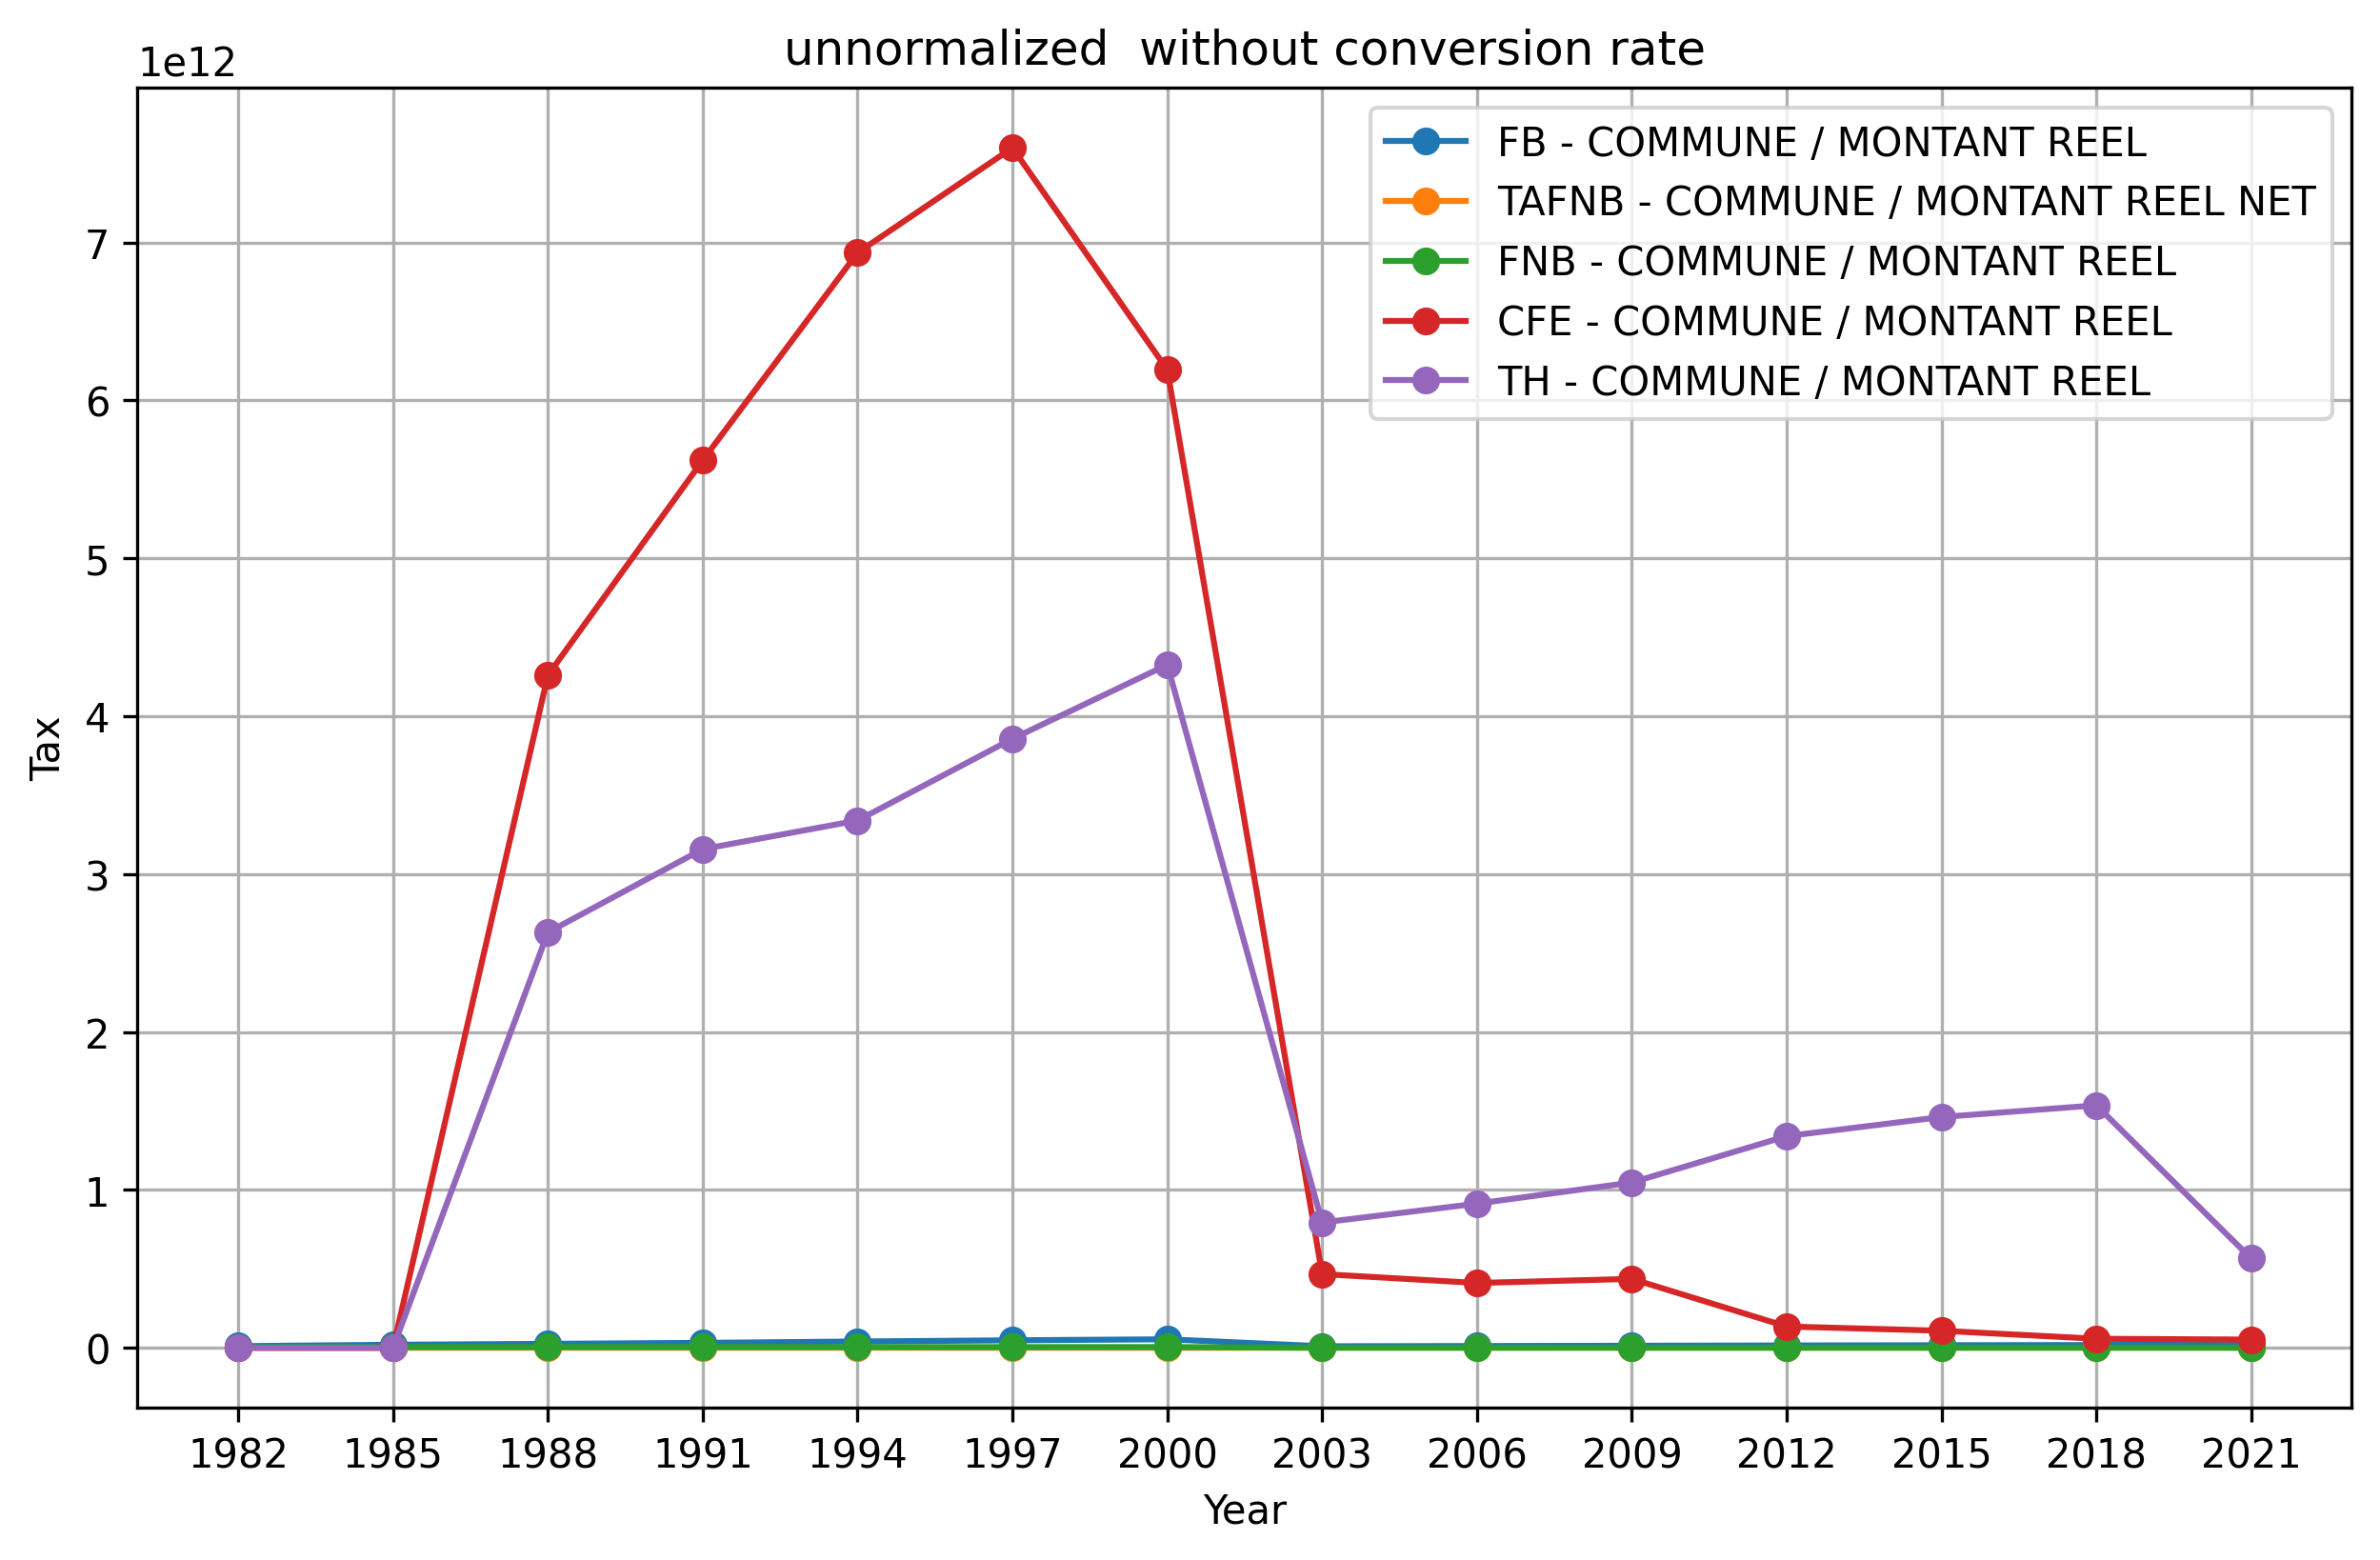

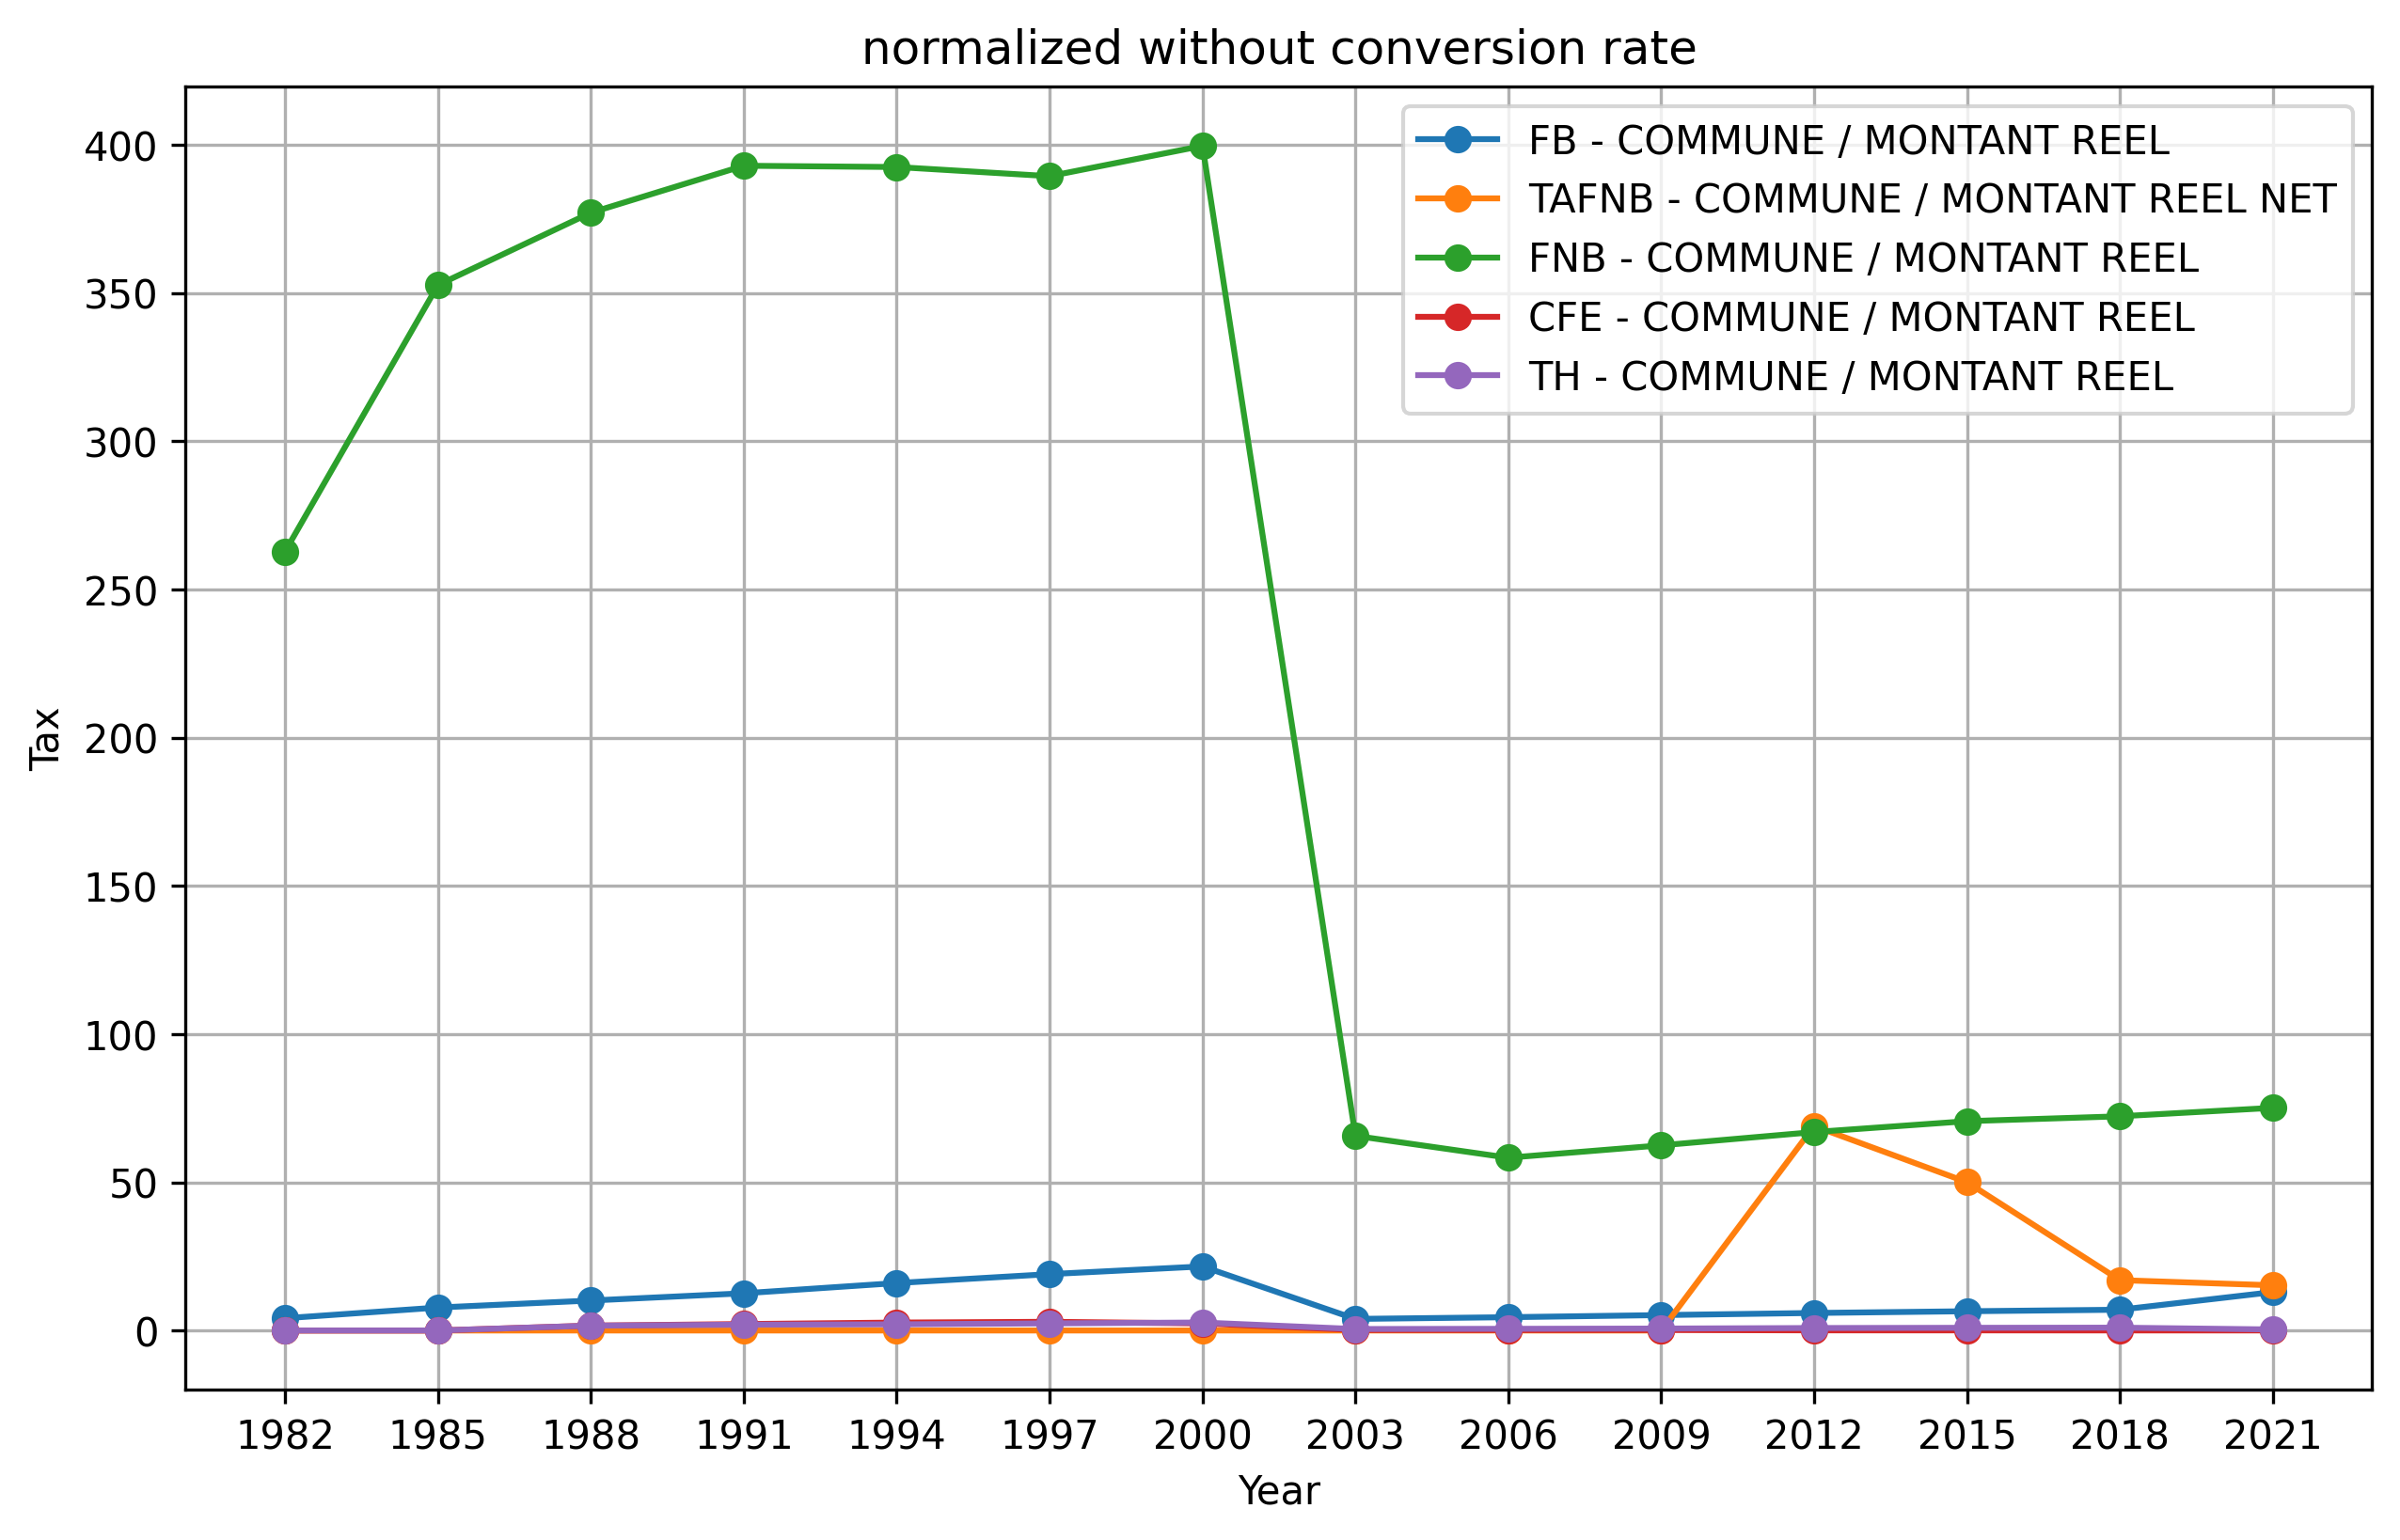

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
df=pd.DataFrame()
df[['TH - COMMUNE / BASE NETTE','TH - COMMUNE / TAUX NET','CFE - COMMUNE / BASE','CFE - COMMUNE /TAUX NET', 'FB - COMMUNE / MONTANT REEL',  'TAFNB - COMMUNE / MONTANT REEL NET',  'FNB - COMMUNE / MONTANT REEL','ANNEE']] =pqdf[['TH - COMMUNE / BASE NETTE','TH - COMMUNE / TAUX NET','CFE - COMMUNE / BASE','CFE - COMMUNE /TAUX NET', 'FB - COMMUNE / MONTANT REEL',  'TAFNB - COMMUNE / MONTANT REEL NET',  'FNB - COMMUNE / MONTANT REEL','ANNEE']].compute()
df = df.fillna('0')
df = df.replace('.', '0')
df =df.replace(',', '0')
values_with_comma  = list(set([str(x) for row in df.to_numpy() for x in row if ',' in str(x)]))
if len(values_with_comma):
   values_with_period = [value.replace(',', '.') for value in values_with_comma]
   print(len(values_with_comma), len(values_with_period))
   df = df.replace(values_with_comma, values_with_period)
df = df.astype(float)
df_scaled = pd.DataFrame(scaler.fit_transform(df[['TH - COMMUNE / BASE NETTE', 'TH - COMMUNE / TAUX NET',
       'CFE - COMMUNE / BASE', 'CFE - COMMUNE /TAUX NET',
       'FB - COMMUNE / MONTANT REEL', 'TAFNB - COMMUNE / MONTANT REEL NET',
       'FNB - COMMUNE / MONTANT REEL']]),
                         columns=['TH - COMMUNE / BASE NETTE', 'TH - COMMUNE / TAUX NET',
       'CFE - COMMUNE / BASE', 'CFE - COMMUNE /TAUX NET',
       'FB - COMMUNE / MONTANT REEL', 'TAFNB - COMMUNE / MONTANT REEL NET',
       'FNB - COMMUNE / MONTANT REEL'])
df_scaled['ANNEE'] = df['ANNEE'].reset_index(drop=True)
df['TH - COMMUNE / MONTANT REEL'] = df['TH - COMMUNE / BASE NETTE']*df['TH - COMMUNE / TAUX NET']
df['CFE - COMMUNE / MONTANT REEL'] = df['CFE - COMMUNE / BASE']*df['CFE - COMMUNE /TAUX NET']
df_scaled['TH - COMMUNE / MONTANT REEL'] = df_scaled['TH - COMMUNE / BASE NETTE']*df_scaled['TH - COMMUNE / TAUX NET']
df_scaled['CFE - COMMUNE / MONTANT REEL'] = df_scaled['CFE - COMMUNE / BASE']*df_scaled['CFE - COMMUNE /TAUX NET']

plt.figure(figsize=(10, 6), dpi=300)
for col in [ 'FB - COMMUNE / MONTANT REEL',  'TAFNB - COMMUNE / MONTANT REEL NET',  'FNB - COMMUNE / MONTANT REEL','CFE - COMMUNE / MONTANT REEL','TH - COMMUNE / MONTANT REEL' ] :
    if(col != 'ANNEE'):
      yearly_data = df.groupby('ANNEE')[col].sum().reset_index()
      yearly_data = yearly_data.iloc[::3]
      plt.plot(yearly_data['ANNEE'], yearly_data[col], marker='o', label=col)
# plt.title('unnormalized Commune Tax Revenue over Years')
plt.title('unnormalized  without conversion rate')
plt.xlabel('Year')
plt.ylabel('Tax')
plt.grid(True)
plt.legend()
plt.xticks(yearly_data['ANNEE'].unique())
plt.show()


plt.figure(figsize=(10,6), dpi=300)
for col in [ 'FB - COMMUNE / MONTANT REEL',  'TAFNB - COMMUNE / MONTANT REEL NET',  'FNB - COMMUNE / MONTANT REEL','CFE - COMMUNE / MONTANT REEL','TH - COMMUNE / MONTANT REEL' ] :
    if(col != 'ANNEE'):
      yearly_data = df_scaled.groupby('ANNEE')[col].sum().reset_index()
      yearly_data = yearly_data.iloc[::3]
      plt.plot(yearly_data['ANNEE'], yearly_data[col], marker='o', label=col)
# plt.title('normalized Commune Tax Revenue over Years')
plt.title('normalized without conversion rate')
plt.xlabel('Year')
plt.ylabel('Tax')
plt.grid(True)
plt.legend()
plt.xticks(yearly_data['ANNEE'].unique())
plt.show()
# df.to_csv('/content/drive/MyDrive/datasharing-dir/commune_tax_revenue.csv')
# df.info()


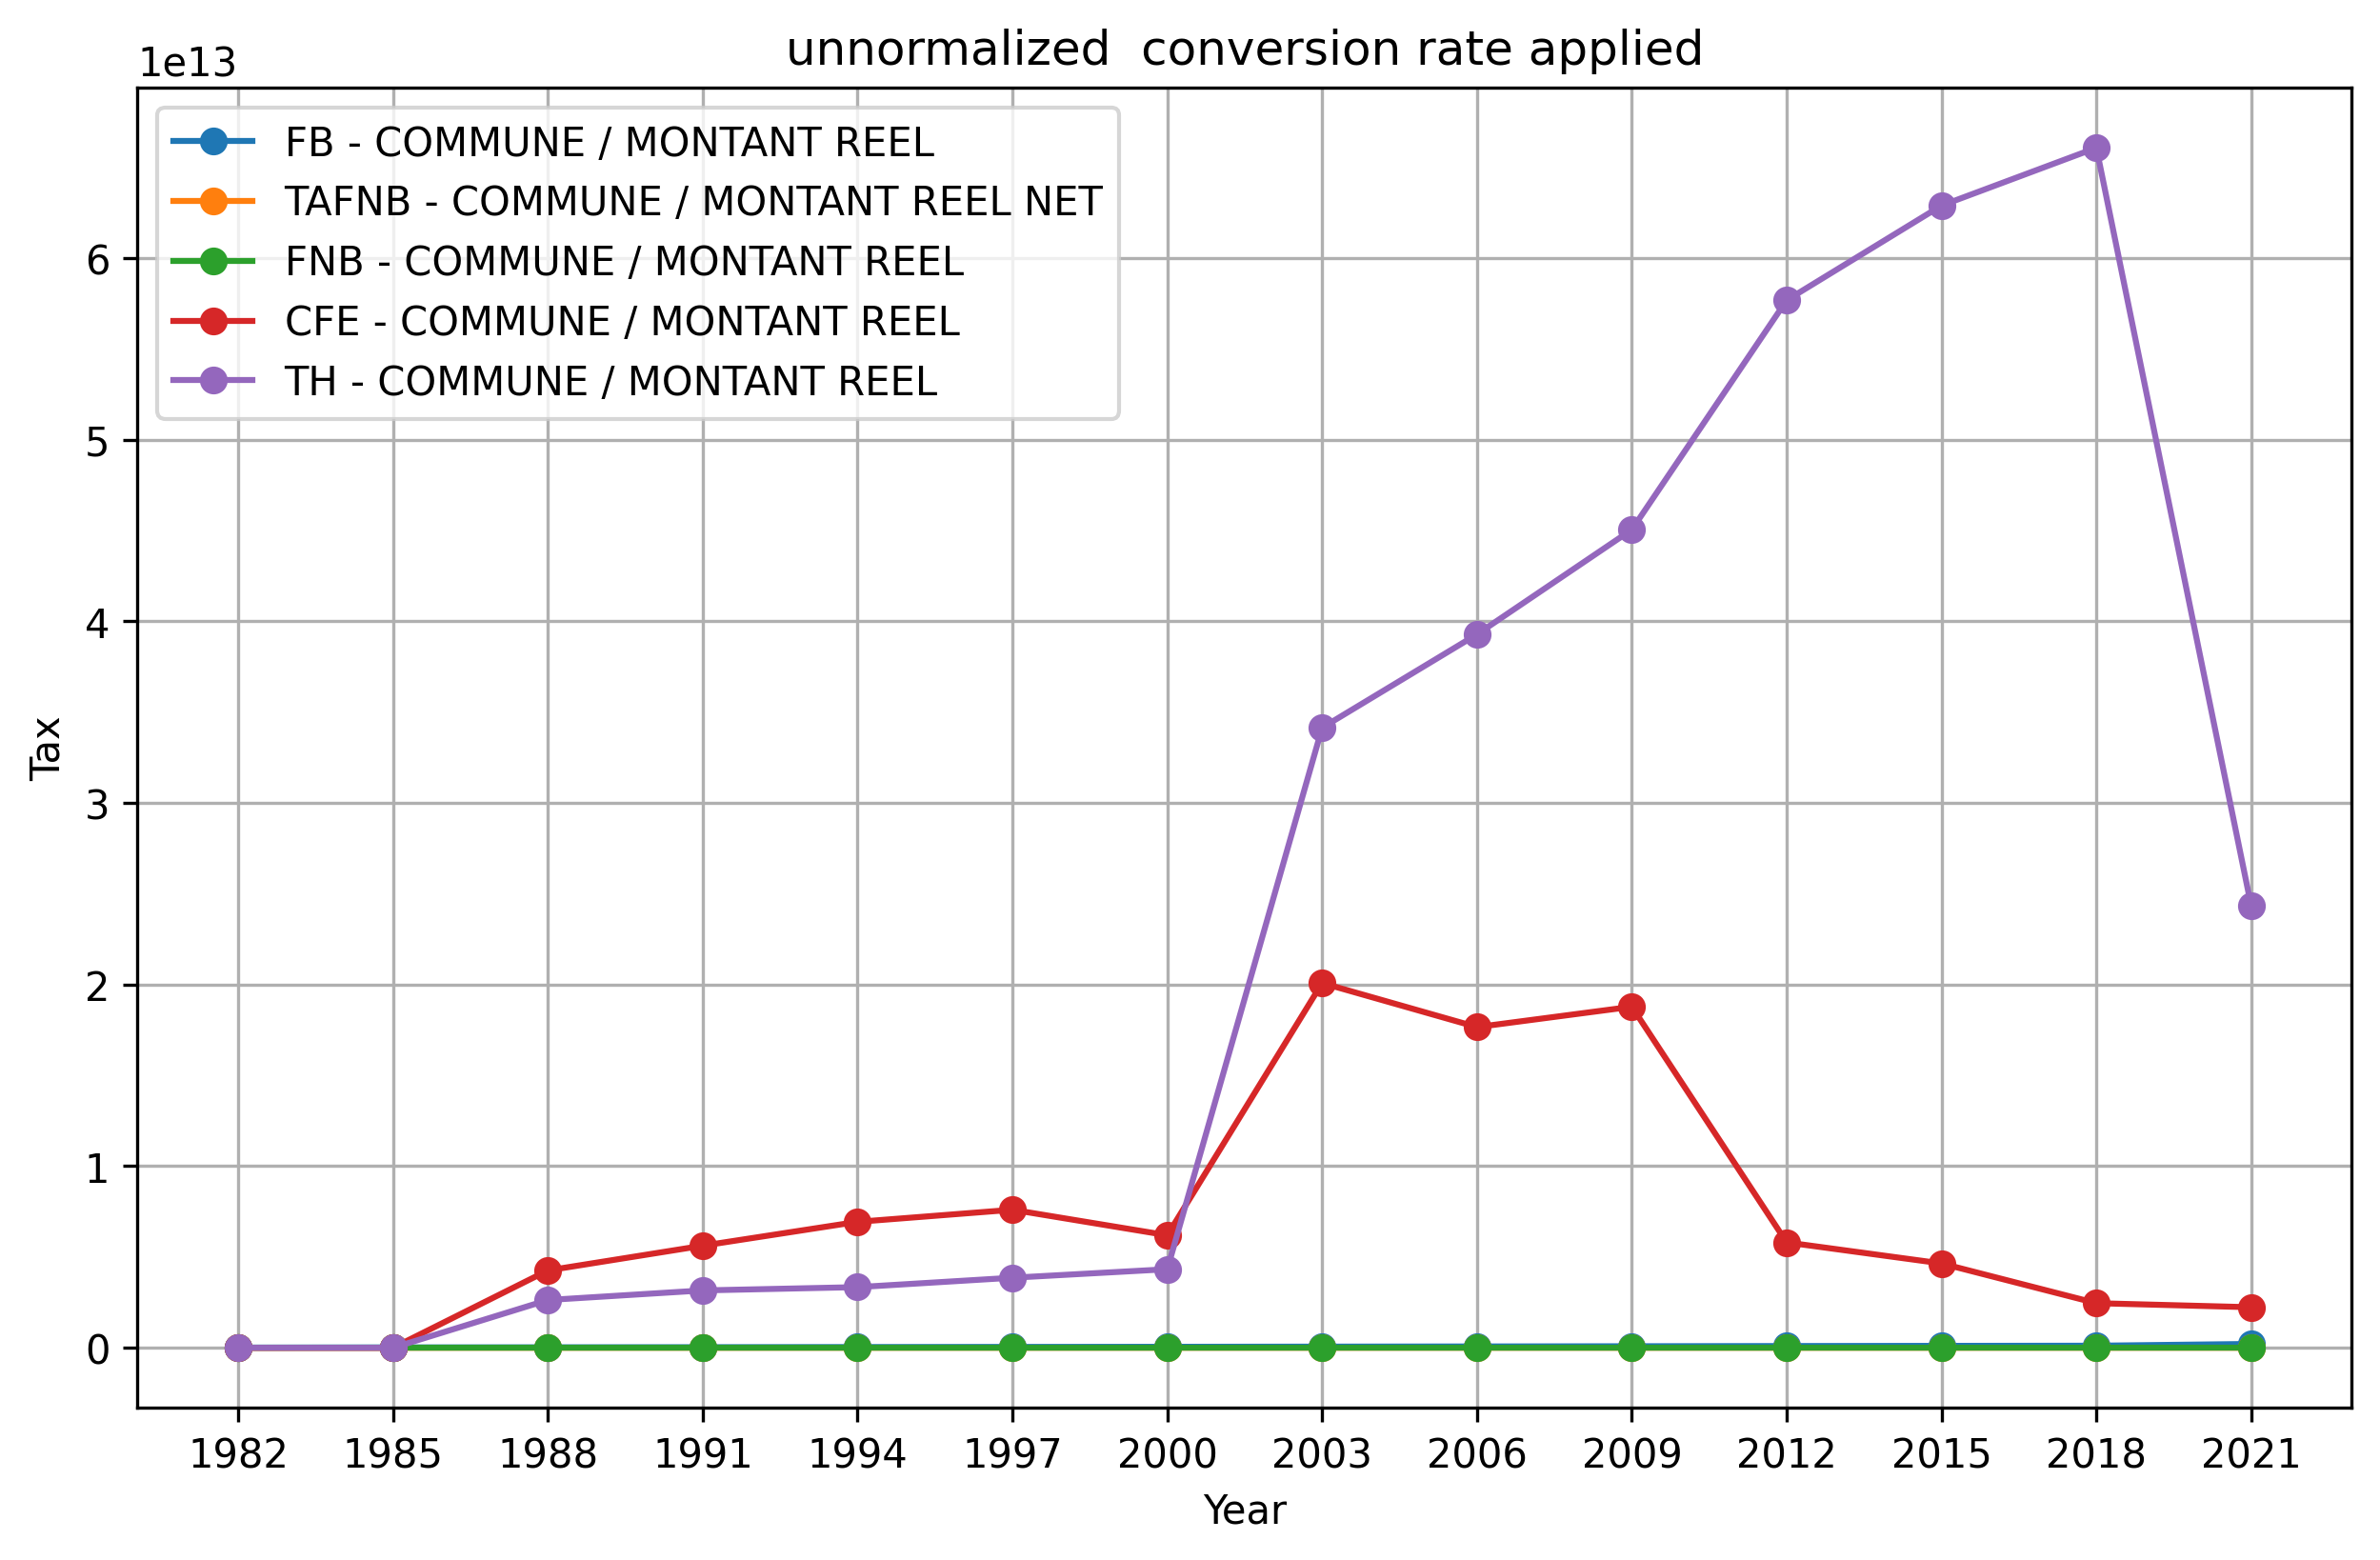

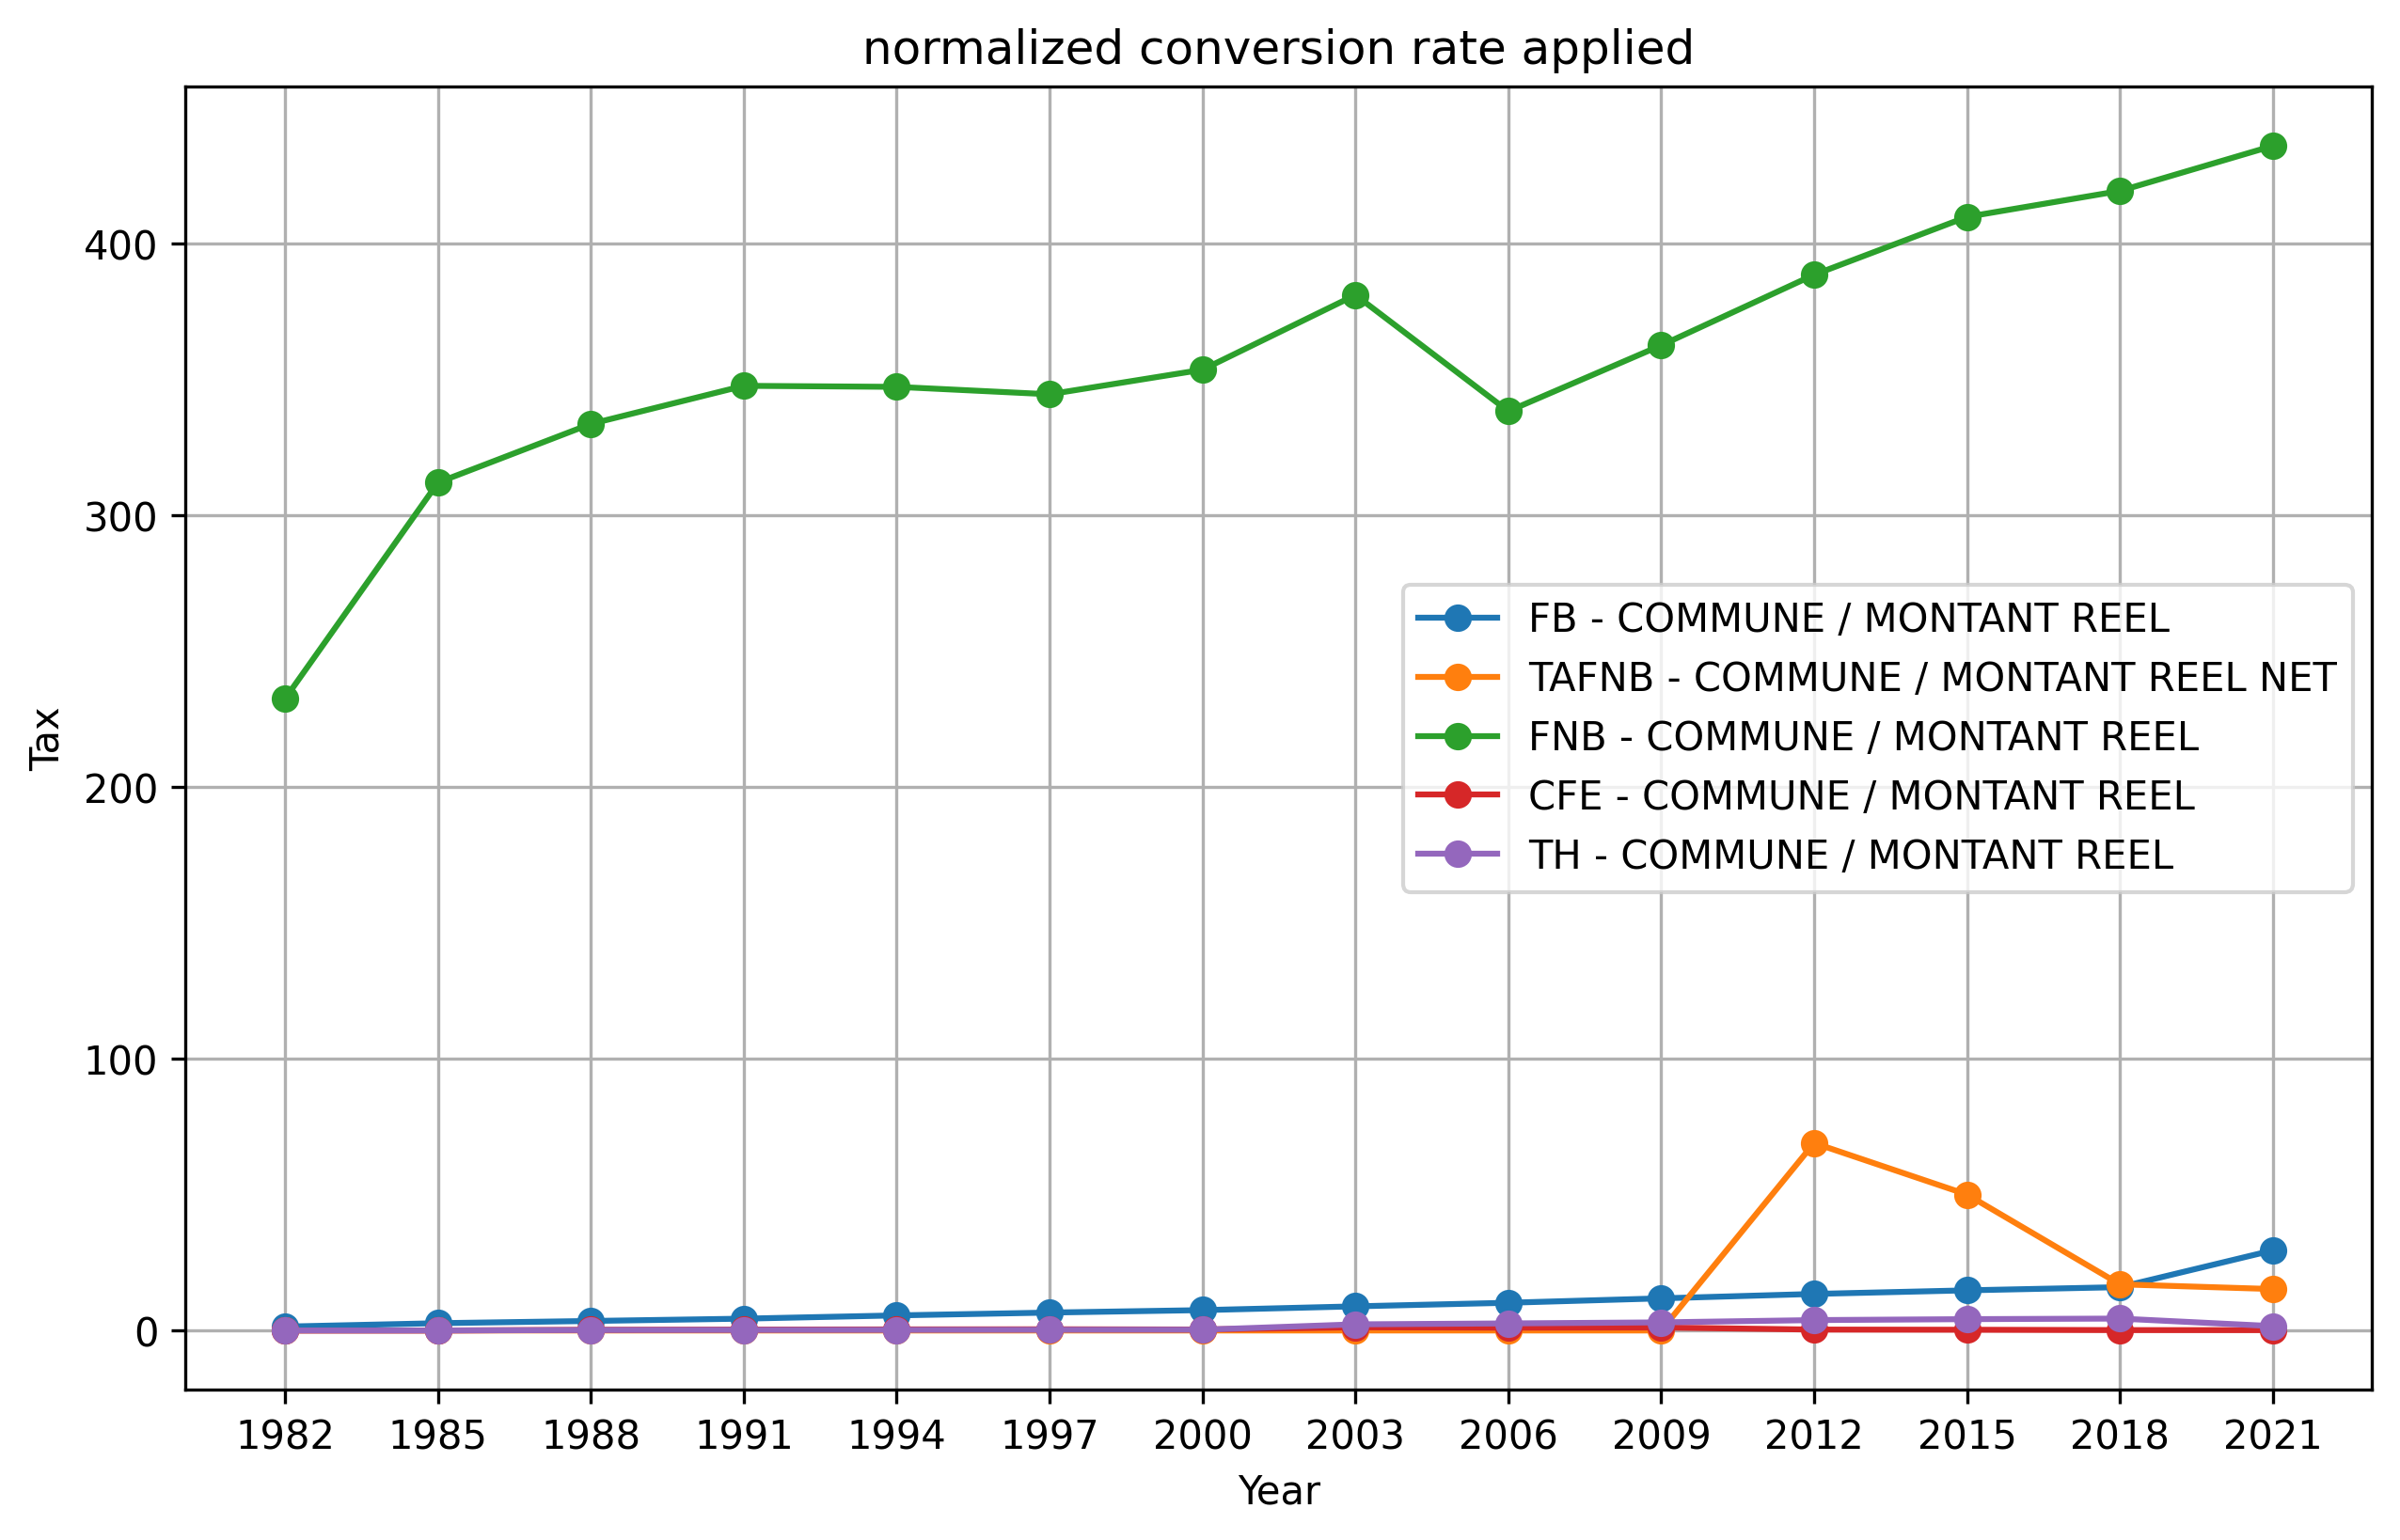

In [ ]:
new = pd.DataFrame()
temp = pd.DataFrame()
conversion_rate = 6.55957

# Apply the conversion for data before 2002
new = df.loc[df['ANNEE'] >= 2002, ['TH - COMMUNE / BASE NETTE', 'TH - COMMUNE / TAUX NET',
       'CFE - COMMUNE / BASE', 'CFE - COMMUNE /TAUX NET',
       'FB - COMMUNE / MONTANT REEL', 'TAFNB - COMMUNE / MONTANT REEL NET',
       'FNB - COMMUNE / MONTANT REEL']].apply(lambda x: x * conversion_rate)

temp = df.loc[df['ANNEE'] < 2002, ['TH - COMMUNE / BASE NETTE', 'TH - COMMUNE / TAUX NET',
       'CFE - COMMUNE / BASE', 'CFE - COMMUNE /TAUX NET',
       'FB - COMMUNE / MONTANT REEL', 'TAFNB - COMMUNE / MONTANT REEL NET',
       'FNB - COMMUNE / MONTANT REEL']].copy()
new = pd.concat([new, temp])

new_scaled = pd.DataFrame(scaler.fit_transform(new[[
           'TH - COMMUNE / BASE NETTE',
           'TH - COMMUNE / TAUX NET',
           'CFE - COMMUNE / BASE',
           'CFE - COMMUNE /TAUX NET',
           'FB - COMMUNE / MONTANT REEL',
           'TAFNB - COMMUNE / MONTANT REEL NET',
           'FNB - COMMUNE / MONTANT REEL']])
,columns=[
           'TH - COMMUNE / BASE NETTE',
           'TH - COMMUNE / TAUX NET',
           'CFE - COMMUNE / BASE',
           'CFE - COMMUNE /TAUX NET',
           'FB - COMMUNE / MONTANT REEL',
           'TAFNB - COMMUNE / MONTANT REEL NET',
           'FNB - COMMUNE / MONTANT REEL'])


new['TH - COMMUNE / MONTANT REEL'] = new['TH - COMMUNE / BASE NETTE']*new['TH - COMMUNE / TAUX NET']
new['CFE - COMMUNE / MONTANT REEL'] = new['CFE - COMMUNE / BASE']*new['CFE - COMMUNE /TAUX NET']
new_scaled['TH - COMMUNE / MONTANT REEL'] = new_scaled['TH - COMMUNE / BASE NETTE']*new_scaled['TH - COMMUNE / TAUX NET']
new_scaled['CFE - COMMUNE / MONTANT REEL'] = new_scaled['CFE - COMMUNE / BASE']*new_scaled['CFE - COMMUNE /TAUX NET']

new_scaled['ANNEE'] = pqdf['ANNEE'].reset_index(drop=True)
new['ANNEE'] = pqdf['ANNEE'].reset_index(drop=True)

plt.figure(figsize=(10, 6))
for col in [ 'FB - COMMUNE / MONTANT REEL',  'TAFNB - COMMUNE / MONTANT REEL NET',  'FNB - COMMUNE / MONTANT REEL','CFE - COMMUNE / MONTANT REEL','TH - COMMUNE / MONTANT REEL' ] :
    if(col != 'ANNEE'):
      yearly_data = new.groupby('ANNEE')[col].sum().reset_index()
      yearly_data = yearly_data.iloc[::3]
      plt.plot(yearly_data['ANNEE'], yearly_data[col], marker='o', label=col)
# plt.title('unnormalized Commune Tax Revenue over Years')
plt.title('unnormalized  conversion rate applied')
plt.xlabel('Year')
plt.ylabel('Tax')
plt.grid(True)
plt.legend()
plt.xticks(yearly_data['ANNEE'].unique())
plt.show()


plt.figure(figsize=(10,6))
for col in [ 'FB - COMMUNE / MONTANT REEL',  'TAFNB - COMMUNE / MONTANT REEL NET',  'FNB - COMMUNE / MONTANT REEL','CFE - COMMUNE / MONTANT REEL','TH - COMMUNE / MONTANT REEL' ] :
    if(col != 'ANNEE'):
      yearly_data = new_scaled.groupby('ANNEE')[col].sum().reset_index()
      yearly_data = yearly_data.iloc[::3]
      plt.plot(yearly_data['ANNEE'], yearly_data[col], marker='o', label=col)
# plt.title('normalized Commune Tax Revenue over Years')
plt.title('normalized conversion rate applied')
plt.xlabel('Year')
plt.ylabel('Tax')
plt.grid(True)
plt.legend()
plt.xticks(yearly_data['ANNEE'].unique())
plt.show()

In [ ]:
df.to_csv('/content/drive/MyDrive/datasharing-dir/commune_tax_disnormalize_withoutfractionrate.csv', index=False)
df_scaled.to_csv('/content/drive/MyDrive/datasharing-dir/commune_tax_Normalize_withoutfractionrate.csv', index=False)
new.to_csv('/content/drive/MyDrive/datasharing-dir/commune_tax_DisNormalize_Fractionrate.csv', index=False)
new_scaled.to_csv('/content/drive/MyDrive/datasharing-dir/commune_tax_Normalize_Fractionrate.csv', index=False)

In [ ]:
dff.to_csv('/content/drive/MyDrive/datasharing-dir/normalized_commune_tax_revenue.csv', index=False)

In [ ]:
new

TH - COMMUNE / BASE NETTE  TH - COMMUNE / TAUX NET  \
0                   1.124815e+06                72.548844   
1                   9.526004e+05                63.955807   
2                   2.073247e+07                80.354732   
3                   2.075140e+06               112.234242   
4                   2.984604e+05                97.147232   
...                          ...                      ...   
44185               4.898050e+06                 0.000000   
44186               1.770720e+06                 0.000000   
44187               2.727017e+07                 0.000000   
44188               1.123250e+06                 0.000000   
44189               2.050350e+06                 0.000000   

       CFE - COMMUNE / BASE  CFE - COMMUNE /TAUX NET  \
0                       0.0                      0.0   
1                       0.0                      0.0   
2                       0.0                      0.0   
3                       0.0                      0.0   
4                       0.0                      0.0   
...                     ...                      ...   
44185             9539110.0                      0.0   
44186             1084090.0                      0.0   
44187            20303000.0                      0.0   
44188              904660.0                      0.0   
44189             1452530.0                      0.0   

       FB - COMMUNE / MONTANT REEL  TAFNB - COMMUNE / MONTANT REEL NET  \
0                     9.479431e+05                                 0.0   
1                     4.034201e+05                                 0.0   
2                     4.909079e+07                                 0.0   
3                     3.274997e+06                                 0.0   
4                     1.668558e+05                                 0.0   
...                            ...                                 ...   
44185                 5.291540e+05                                 0.0   
44186                 1.956780e+05                                 0.0   
44187                 2.755552e+06                                 0.0   
44188                 8.639100e+04                                 0.0   
44189                 2.399960e+05                                 0.0   

       FNB - COMMUNE / MONTANT REEL  TH - COMMUNE / MONTANT REEL  \
0                      1.865738e+05                 8.160406e+07   
1                      5.168941e+03                 6.092433e+07   
2                      1.574100e+05                 1.665952e+09   
3                      2.011230e+05                 2.329017e+08   
4                      1.968527e+04                 2.899460e+07   
...                             ...                          ...   
44185                  1.052268e+06                 0.000000e+00   
44186                  2.014240e+05                 0.000000e+00   
44187                  9.391440e+05                 0.000000e+00   
44188                  2.127300e+05                 0.000000e+00   
44189                  6.953600e+04                 0.000000e+00   

       CFE - COMMUNE / MONTANT REEL   ANNEE  
0                               0.0  2022.0  
1                               0.0  2022.0  
2                               0.0  2022.0  
3                               0.0  2022.0  
4                               0.0  2022.0  
...                             ...     ...  
44185                           0.0  2021.0  
44186                           0.0  2021.0  
44187                           0.0  2021.0  
44188                           0.0  2021.0  
44189                           0.0  2021.0  

[1528922 rows x 10 columns]

### heatmap

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
def heat_map(df, title ):
  plt.figure(figsize=(15, 10))
  corr = df.corr()
  matrix = np.triu(corr)
  sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, mask=matrix)
  # Get the current Axes object
  ax = plt.gca()
  # Set the title for the heatmap plot
  ax.set_title(title)
  plt.show()

### grouping tax categories and collector

In [ ]:
TAX_CATEGORY_CODES = [
    'TFPNB',  # Taxe Foncière sur les Propriétés Non Bâties - Property Tax on Unbuilt Land
    'TFPB',   # Taxe Foncière sur les Propriétés Bâties - Property Tax on Built Land
    'TAFNB',  # Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties - Additional Tax on Property Tax for Unbuilt Land
    'TAFB',   # Taxe Additionnelle à la Taxe Foncière sur les Propriétés Bâties - Additional Tax on Property Tax for Built Land
    'FNB',    # Foncier Non Bâti - Property Tax on Undeveloped Land
    'FB',     # Foncier Bâti - Property Tax on Built Land
    'TP',     # Taxe Professionnelle - Professional Tax
    'TF',     # Taxe Foncière - Property Tax
    'TH',     # Taxe d'Habitation - Residence Tax
    'CFE',    # Cotisation Foncière des Entreprises - Business Property Tax
    'CVAE',   # Cotisation sur la Valeur Ajoutée des Entreprises - Corporate Value Added Contribution
    'TSE',    # Taxe sur les Salaires - Payroll Tax
    'TEOM',   # Taxe d'Enlèvement des Ordures Ménagères - Household Waste Collection Tax
    'IFER',   # Imposition Forfaitaire sur les Entreprises de Réseaux - Flat-Rate Tax on Network Companies
    'Tascom', # Taxe sur les Surfaces Commerciales - Tax on Commercial Surfaces
    'Gemapi', # Gestion des Milieux Aquatiques et Prévention des Inondations - Management of Aquatic Environments and Flood Prevention
    'Tasarif', # Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties - Additional Tax on Property Tax for Unbuilt Land
    'BASE NETTE IMPOSEE', # Taxable or relieved net base for secondary residences
    'FONDS DE COMPENSATION IFER CENTRALES NUCLEAIRES OU THERMIQUES A FLAMME', # IFER compensation fund for nuclear or flame thermal power plants
]
tax_category_cols = {}
# pqdf = pqdf.drop(columns=['EPCI ayant instauré le dispositif de la CFE éolienne - date'])

for tax_type in TAX_CATEGORY_CODES:

  tp_columns = [column for column in pqdf.columns if ((( column.startswith(f"{tax_type} ") ) or  (f" {tax_type} " in column) )and ('CODE' not in column) and ('MONTANT' in column)) ]
  tax_category_cols.update({tax_type:tp_columns})

In [ ]:
TAX_COLLECTOR = [
    'COMMUNE',         # Municipality
    'INTERCOMMUNALITE',# Intercommunality
    'CCI',             # Chamber of Commerce and Industry
    'CMA',             # Chamber of Trades and Crafts
    'SYNDICAT',        # Syndicate
    'GFP',             # Public Finance Directorate General
    'EPT',             # Public Territorial Establishment
    'DGFiP'            # Direction Générale des Finances Publiques - Public Finance Directorate General
]
tax_collector_cols = {}
# pqdf = pqdf.drop(columns=['EPCI ayant instauré le dispositif de la CFE éolienne - date'])

for tax_type in TAX_COLLECTOR:

  tp_columns = [column for column in pqdf.columns if ((( column.startswith(f"{tax_type} ") ) or  (f" {tax_type} " in column) )and ('CODE' not in column)) ]
  tax_collector_cols.update({tax_type:tp_columns})

In [ ]:
tax_collector_cols

In [ ]:
tax_category_cols

### TAX CATEGORY

In [ ]:
df = pd.read_csv('all_tax_categories.csv')
df.drop(columns=['TFPNB','TFPB', 'TAFB','TP', 'CVAE','TEOM','Tascom','Gemapi','Tasarif', 'BASE NETTE IMPOSEE'], inplace=True)
df.sum(axis=0)
df.to_csv('all_tax_categories.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
df = pd.DataFrame()
df['ANNEE'] = pqdf['ANNEE']
for key, value in tax_category_cols.items():
    columns =pd.DataFrame()
    cols = [col for col, dtype in pqdf[tax_category_cols[key]].dtypes.items() if (dtype == 'float64' or dtype == 'int64' )]
    columns[cols] = pqdf[cols].compute()
    columns[cols] = columns[cols].fillna(int(0))
    columns[cols] = columns[cols].replace('.', int(0))
    string_cols = [col for col, dtype in pqdf[tax_category_cols[key]].dtypes.items() if ((dtype == 'object' and pqdf[col].apply(lambda x: str(x).isdigit()).any()))]
    columns[string_cols] = pqdf[string_cols].compute()
    columns[string_cols] = columns[string_cols].fillna('0')
    columns[string_cols] = columns[string_cols].replace('.', '0')
    columns[string_cols] = columns[string_cols].replace(',', '0')
    columns[string_cols] = columns[string_cols].astype(float)
    columns = columns.reset_index(drop=True)
    if columns.size !=0:
        columns[string_cols+cols] = scaler.fit_transform(columns[string_cols+cols])
    else:
        print(key)
    df[key] = columns.loc[:, cols].sum(axis=1)

df.to_csv('all_tax_categories.csv')

TFPNB
TFPB
TAFB
TP
CVAE
TEOM
Tascom
Gemapi
Tasarif
BASE NETTE IMPOSEE


In [ ]:
import pandas as pd
df = pd.read_csv('all_tax_categories.csv')
dff = pd.read_csv('commune_tax_DisNormalize_Fractionrate.csv')

print(df.shape)
year = dff['ANNEE']
df['ANNEE'] = dff['ANNEE']

conversion_rate = 6.55957
new = df.loc[df['ANNEE'] >= 2002, ['TFPNB', 'TFPB', 'TAFNB', 'TAFB', 'FNB', 'FB', 'TP', 'TF',
       'TH', 'CFE', 'CVAE', 'TSE', 'TEOM', 'IFER', 'Tascom', 'Gemapi',
       'Tasarif', 'BASE NETTE IMPOSEE',
       'FONDS DE COMPENSATION IFER CENTRALES NUCLEAIRES OU THERMIQUES A FLAMME']].apply(lambda x: x * conversion_rate)

temp = df.loc[df['ANNEE'] < 2002, ['TFPNB', 'TFPB', 'TAFNB', 'TAFB', 'FNB', 'FB', 'TP', 'TF',
       'TH', 'CFE', 'CVAE', 'TSE', 'TEOM', 'IFER', 'Tascom', 'Gemapi',
       'Tasarif', 'BASE NETTE IMPOSEE',
       'FONDS DE COMPENSATION IFER CENTRALES NUCLEAIRES OU THERMIQUES A FLAMME']].copy()
df = pd.concat([new, temp])
df['ANNEE']=year
print(df.columns)
df.to_csv('all_tax_categories.csv', index=False)


(1528922, 19)
Index(['TFPNB', 'TFPB', 'TAFNB', 'TAFB', 'FNB', 'FB', 'TP', 'TF', 'TH', 'CFE',
       'CVAE', 'TSE', 'TEOM', 'IFER', 'Tascom', 'Gemapi', 'Tasarif',
       'BASE NETTE IMPOSEE',
       'FONDS DE COMPENSATION IFER CENTRALES NUCLEAIRES OU THERMIQUES A FLAMME',
       'ANNEE'],
      dtype='object')


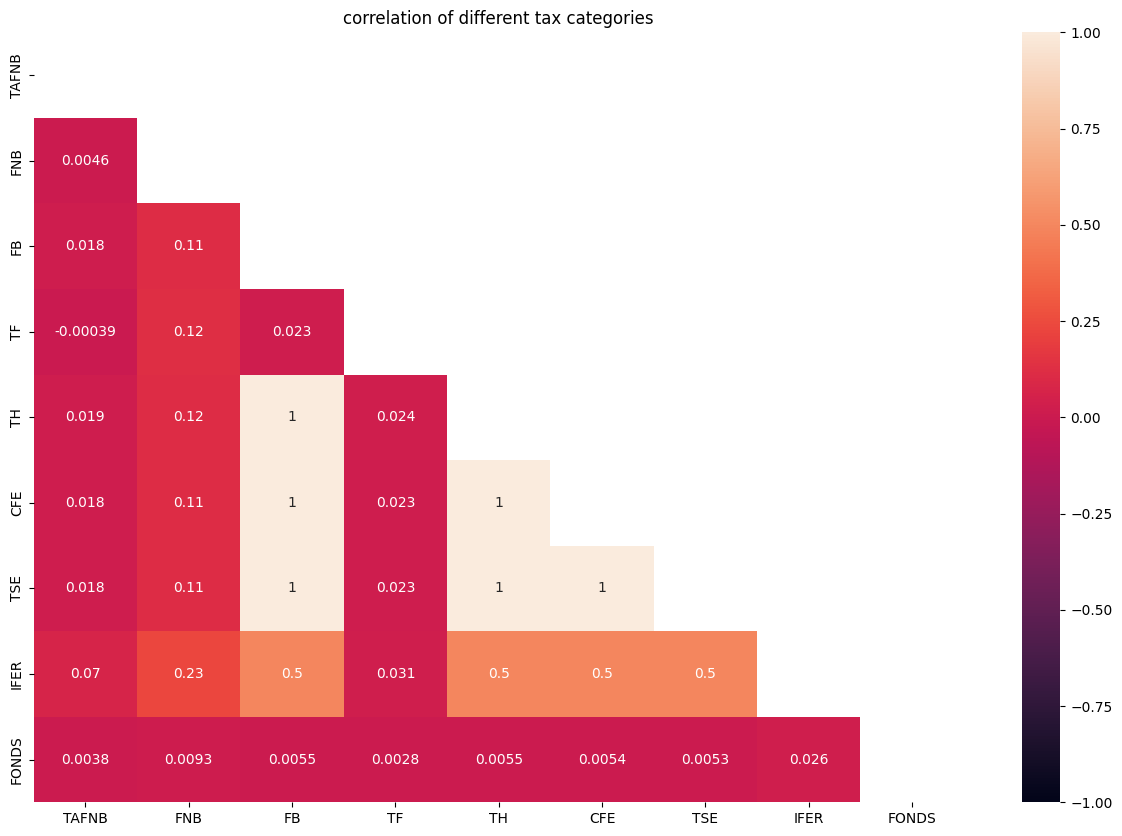

In [ ]:
df = pd.read_csv('all_tax_categories.csv')
df= df.drop(columns=[ 'ANNEE'])
df = df.dropna(axis='columns', how='all')
df = df.rename(columns={ 'FONDS DE COMPENSATION IFER CENTRALES NUCLEAIRES OU THERMIQUES A FLAMME': 'FONDS'})

heat_map(df, f'correlation of different tax categories')

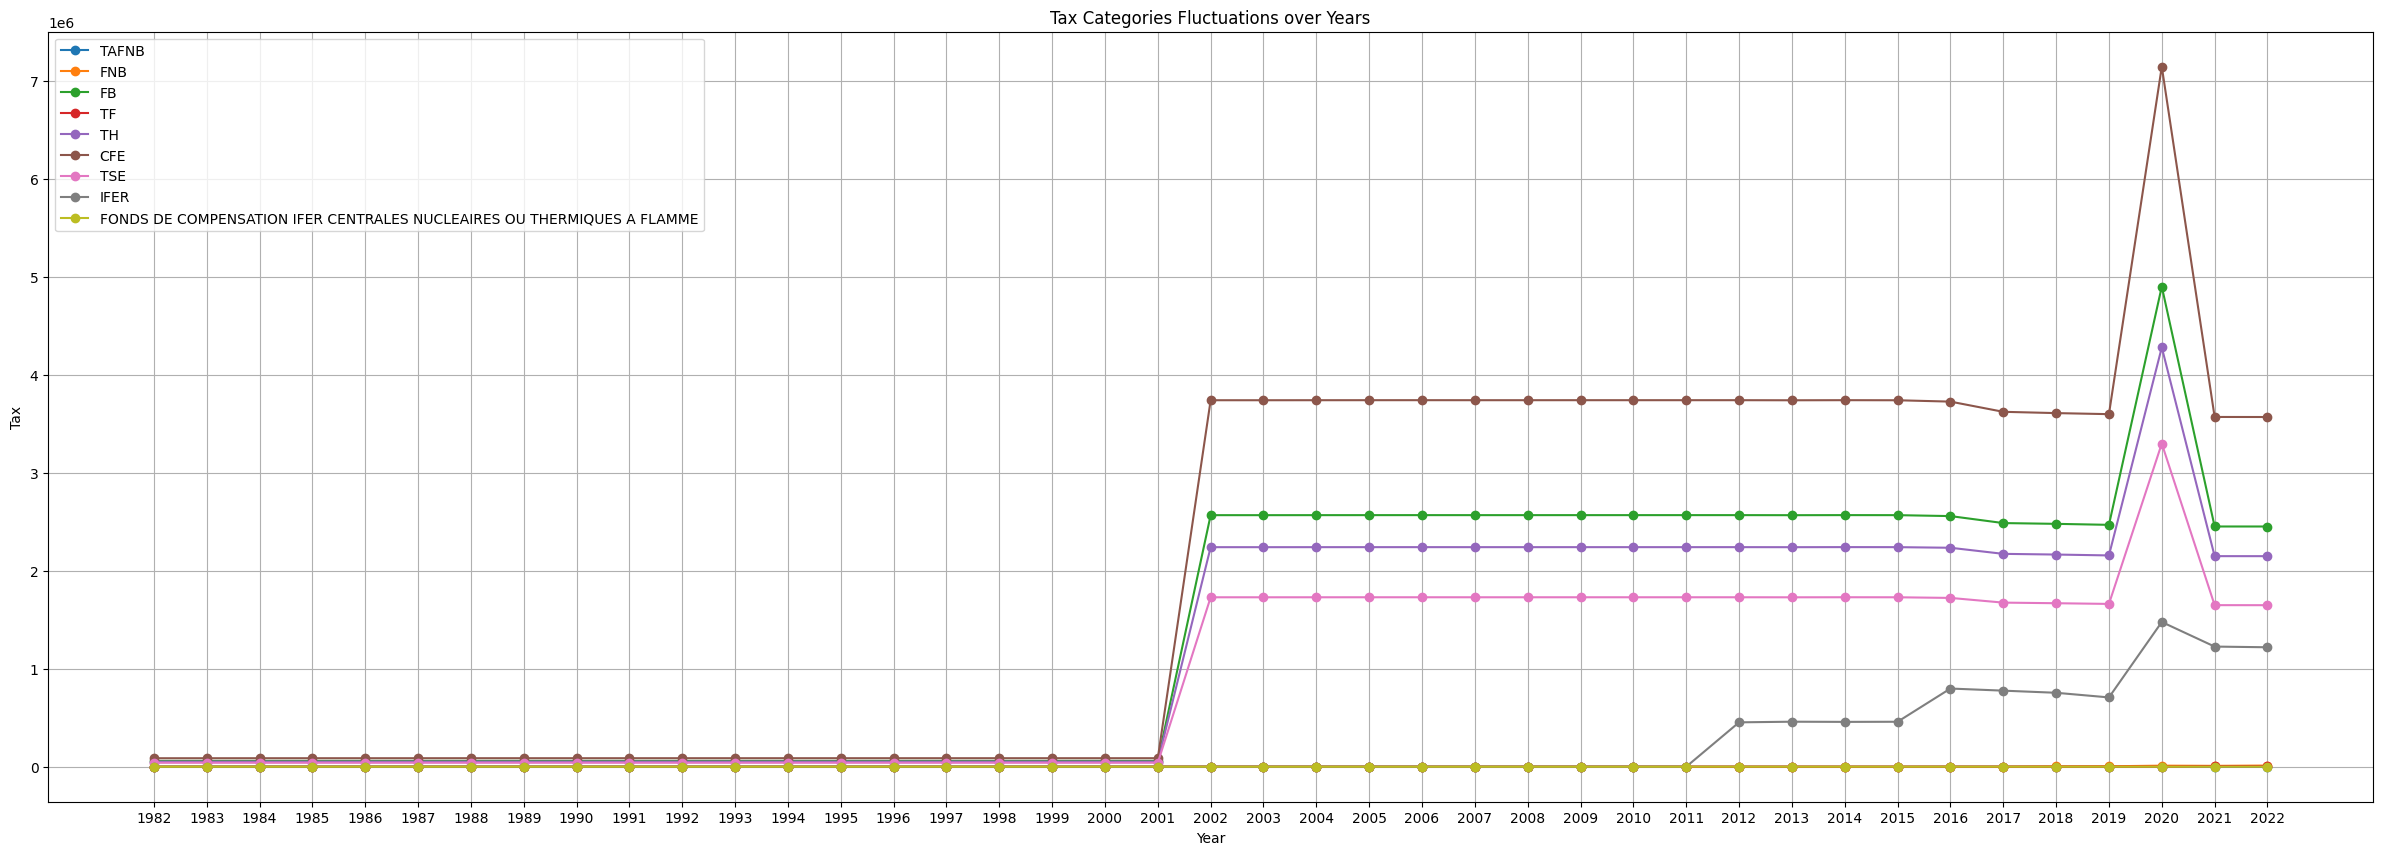

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('all_tax_categories.csv')
plt.figure(figsize=(30, 10))
for col in df.columns:
    if(col != 'ANNEE'):
      yearly_data = df.groupby('ANNEE')[col].sum().reset_index()
      plt.plot(yearly_data['ANNEE'], yearly_data[col], marker='o', label=col)
plt.title('Tax Categories Fluctuations over Years')
plt.xlabel('Year')
plt.ylabel('Tax')
plt.grid(True)
plt.legend()
plt.xticks(yearly_data['ANNEE'].unique())
plt.show()


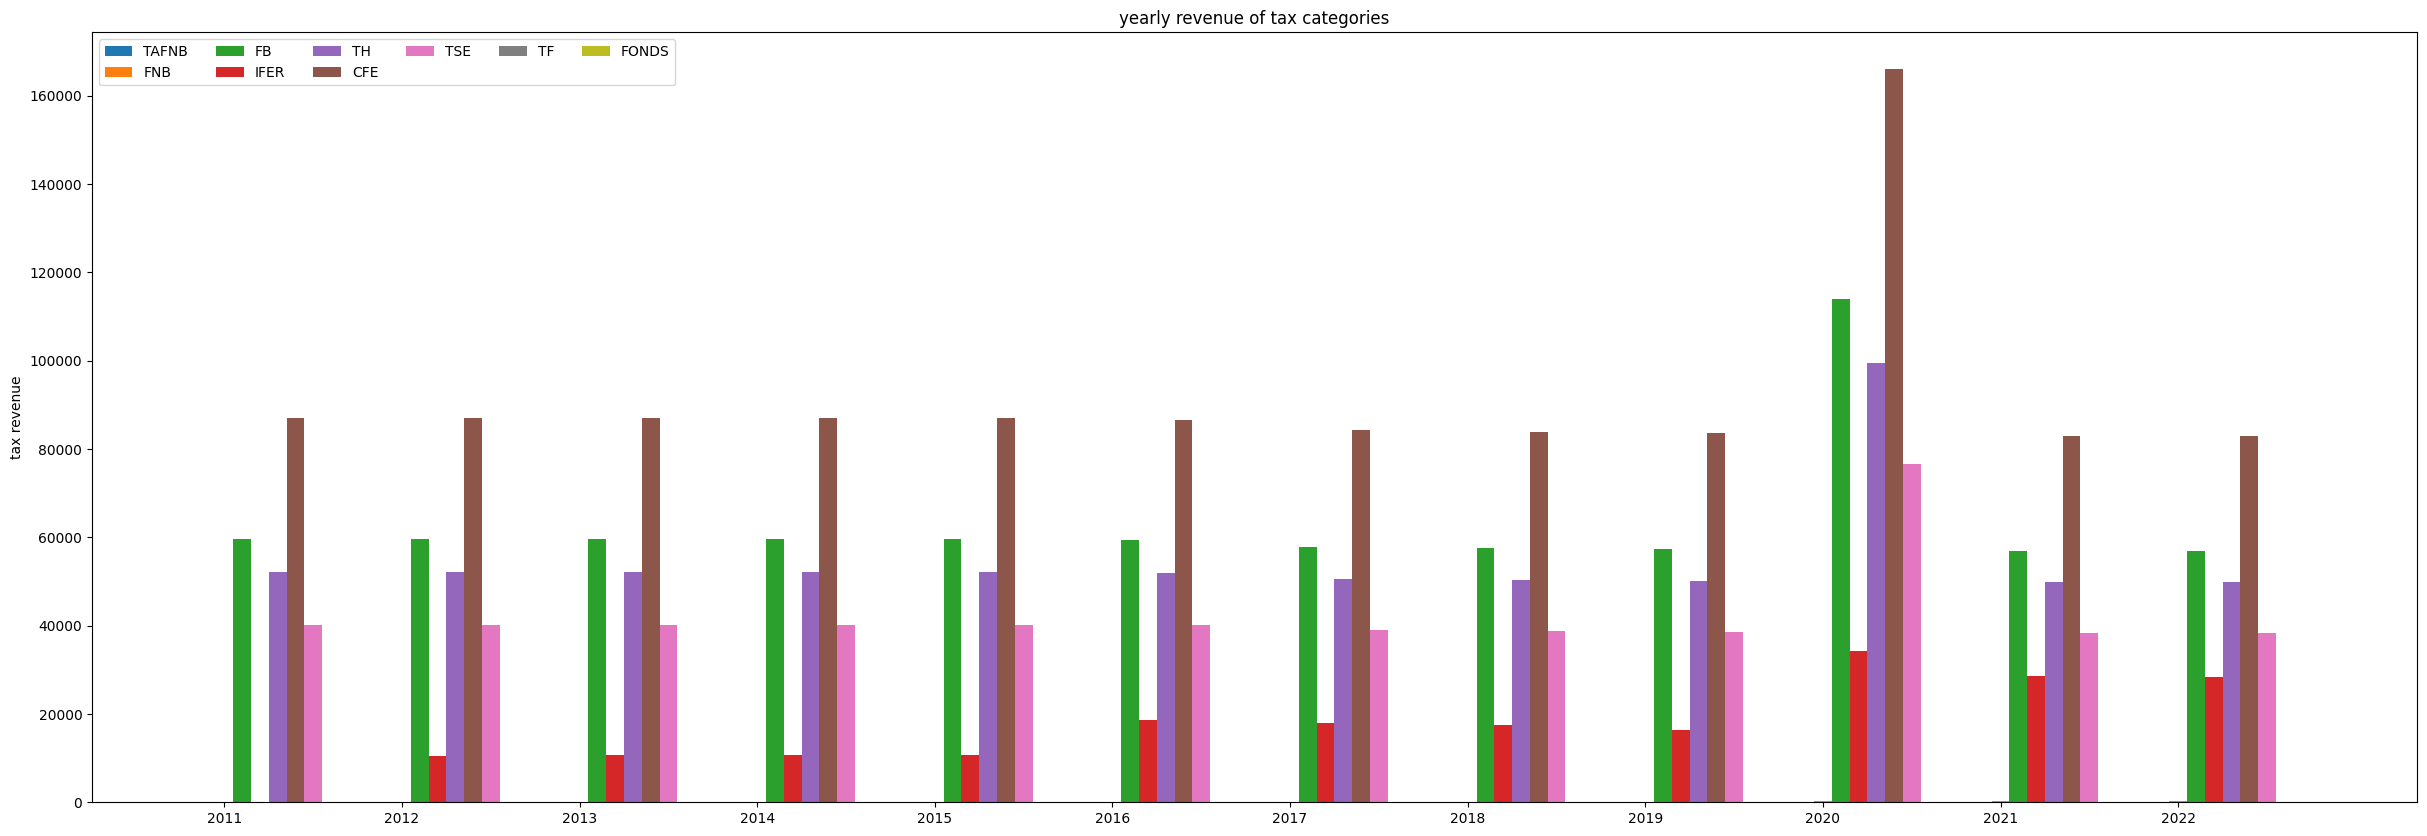

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('all_tax_categories.csv')
df = df.drop(columns=['Unnamed: 0'])

# Filter the dataframe to include only the years from 2013 to the end
df = df[df['ANNEE'] >= 2011]

# Group the data by year and sum the values for each column
# TFPNB = df.groupby('ANNEE')['TFPNB'].sum()
# TFPB = df.groupby('ANNEE')['TFPB'].sum()
TAFNB = df.groupby('ANNEE')['TAFNB'].sum()
# TAFB = df.groupby('ANNEE')['TAFB'].sum()
FNB = df.groupby('ANNEE')['FNB'].sum()
FB = df.groupby('ANNEE')['FB'].sum()
# TP = df.groupby('ANNEE')['TP'].sum()
TF = df.groupby('ANNEE')['TF'].sum()
TH = df.groupby('ANNEE')['TH'].sum()
CFE = df.groupby('ANNEE')['CFE'].sum()
# CVAE = df.groupby('ANNEE')['CVAE'].sum()
TSE = df.groupby('ANNEE')['TSE'].sum()
# TEOM = df.groupby('ANNEE')['TEOM'].sum()
IFER = df.groupby('ANNEE')['IFER'].sum()
# Tascom = df.groupby('ANNEE')['Tascom'].sum()
# Gemapi = df.groupby('ANNEE')['Gemapi'].sum()
# Tasarif = df.groupby('ANNEE')['Tasarif'].sum()
FONDS = df.groupby('ANNEE')['FONDS DE COMPENSATION IFER CENTRALES NUCLEAIRES OU THERMIQUES A FLAMME'].sum()
# IMPOSEE = df.groupby('ANNEE')['BASE NETTE IMPOSEE'].sum()

# Create a list of unique years from 2013 to the end
uniqueness = pd.Series(range(2011, df['ANNEE'].max() + 1))

fig, ax = plt.subplots(figsize=(30, 10))
# TFPNB
# TFPB
# TAFB
# TP
# CVAE
# TEOM
# Tascom
# Gemapi
# Tasarif
# BASE NETTE IMPOSEE
projects = {
    # 'TFPNB': TFPNB,
    # 'TFPB': TFPB,
    'TAFNB': TAFNB,
    # 'TAFB': TAFB,
    'FNB': FNB,
    'FB': FB,
    # 'TP': TP,
    'IFER': IFER,

    'TH': TH,
    'CFE': CFE,
    # 'CVAE': CVAE,
    'TSE': TSE,
    # 'TEOM': TEOM,
    'IFER': IFER,
    # 'Tascom': Tascom,
    'TF': TF,

    # 'Gemapi': Gemapi,
    # 'Tasarif': Tasarif,
    'FONDS': FONDS,
    # 'IMPOSEE': IMPOSEE,
}

x = np.arange(len(uniqueness))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

for key, value in projects.items():
    value = value.reindex(uniqueness, fill_value=0)
    offset = width * multiplier
    rects = ax.bar(x + offset, value.values, width, label=key)
    multiplier += 1

ax.set_ylabel('tax revenue')
ax.set_title('yearly revenue of tax categories')
ax.set_xticks(x + width, uniqueness)
ax.legend(loc='upper left', ncols=6)

plt.show()

### region , commune , department

In [ ]:
top_10_code_insee = df.groupby('code_insee')['CCI'].sum().nlargest(10)

top_10_code_insee

code_insee
57017-AMANVILLERS                  27.878172
50074-BRECEY                        4.919677
01001-ABERGEMENT CLEMENCIAT         0.000000
01001-ABERGEMENT-CLEMENCIA (L )     0.000000
01001-L' ABERGEMENT-CLEMENCIAT      0.000000
01001-L'ABERGEMENT-CLEMENCIA        0.000000
01001-L'ABERGEMENT-CLEMENCIAT       0.000000
01002-ABERGEMENT DE VAREY           0.000000
01002-ABERGEMENT-DE-VAREY (L )      0.000000
01002-L' ABERGEMENT-DE-VAREY        0.000000
Name: CCI, dtype: float64

COMMUNE Index(['97302-CAYENNE', '72181-LE MANS', '13055-MARSEILLE', '69123-LYON',
       '31555-TOULOUSE', '33063-BORDEAUX', '67482-STRASBOURG',
       '34172-MONTPELLIER', '49007-ANGERS', '44109-NANTES'],
      dtype='object', name='code_insee')


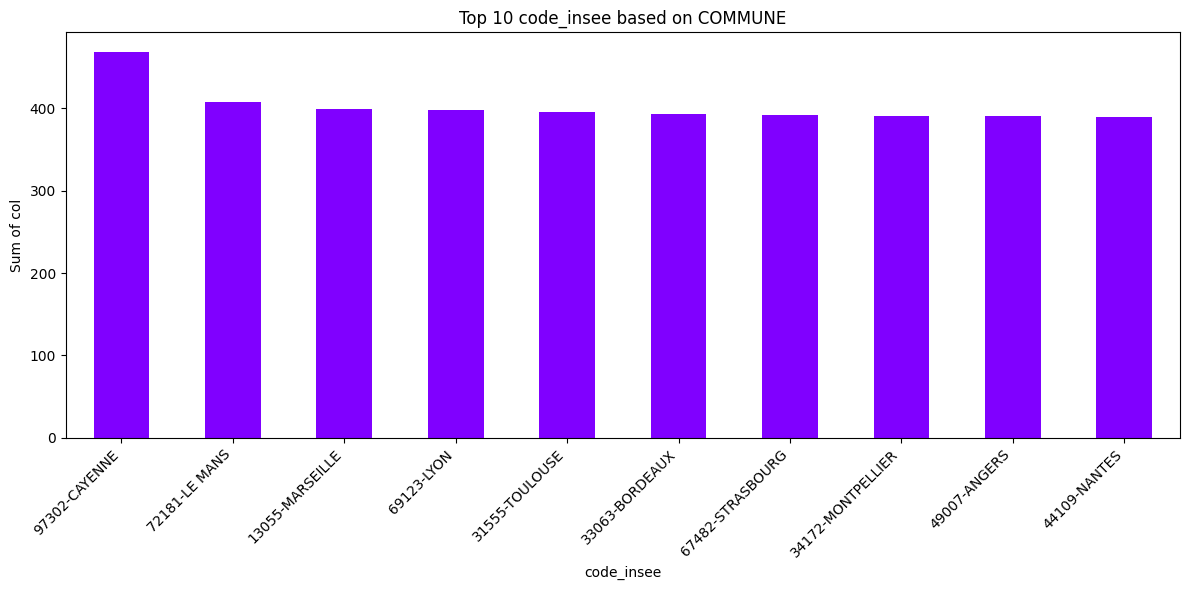

INTERCOMMUNALITE Index(['69123-LYON', '13055-MARSEILLE', '29232-QUIMPER', '31555-TOULOUSE',
       '59350-LILLE', '06088-NICE', '52448-SAINT-DIZIER', '33063-BORDEAUX',
       '44109-NANTES', '67482-STRASBOURG'],
      dtype='object', name='code_insee')


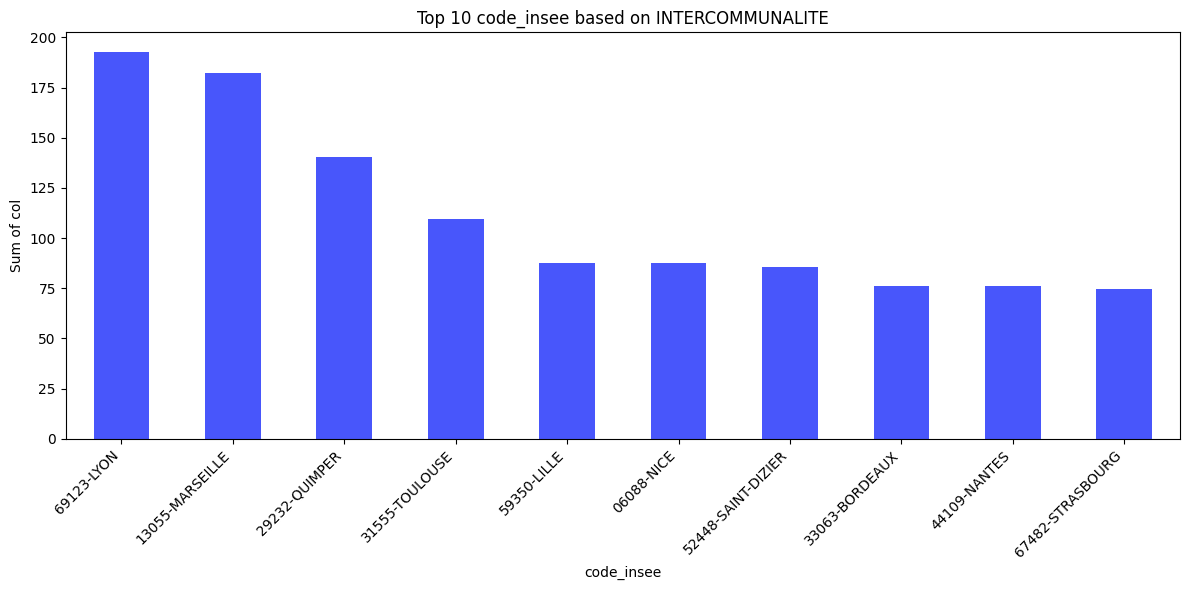

CCI Index(['57017-AMANVILLERS', '50074-BRECEY', '01001-ABERGEMENT CLEMENCIAT',
       '01001-ABERGEMENT-CLEMENCIA (L )', '01001-L' ABERGEMENT-CLEMENCIAT',
       '01001-L'ABERGEMENT-CLEMENCIA', '01001-L'ABERGEMENT-CLEMENCIAT',
       '01002-ABERGEMENT DE VAREY', '01002-ABERGEMENT-DE-VAREY (L )',
       '01002-L' ABERGEMENT-DE-VAREY'],
      dtype='object', name='code_insee')


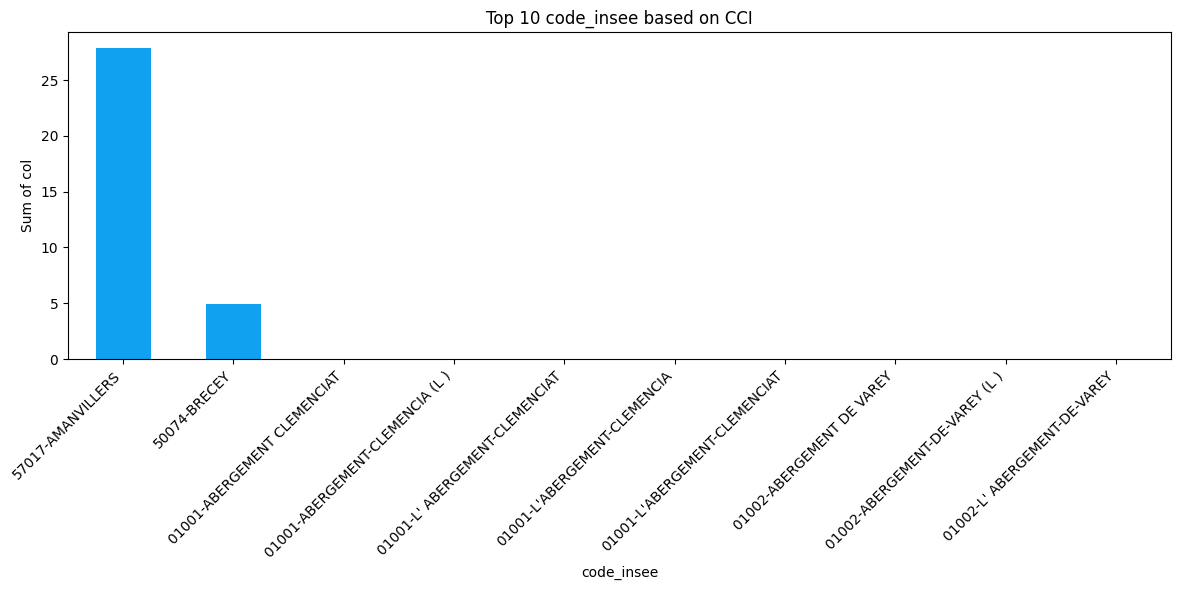

CMA Index(['57017-AMANVILLERS', '01001-ABERGEMENT CLEMENCIAT',
       '01002-ABERGEMENT DE VAREY', '01004-AMBERIEU EN BUGEY',
       '01005-AMBERIEUX EN DOMBES', '01006-AMBLEON', '01007-AMBRONAY',
       '01008-AMBUTRIX', '01009-ANDERT CONDON', '01010-ANGLEFORT'],
      dtype='object', name='code_insee')


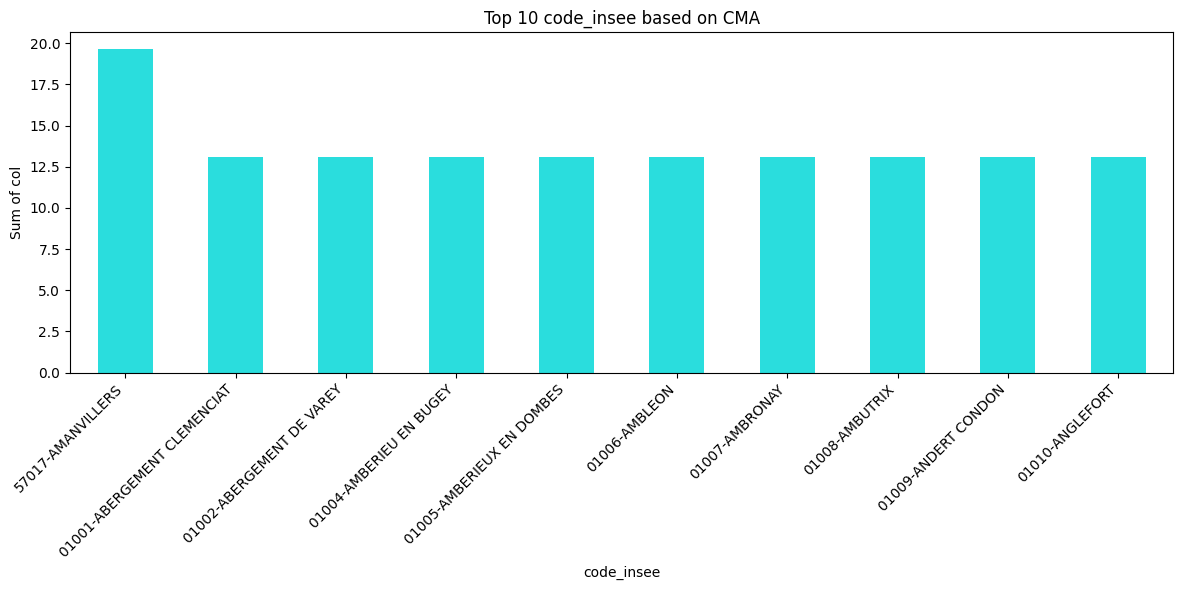

SYNDICAT Index(['11369-SALLELES-D'AUDE', '78036-AUTOUILLET',
       '69205-ST GENIS LES OLLIERES', '78372-MARLY-LE-ROI', '95203-EAUBONNE',
       '95219-ERMONT', '95197-DEUIL LA BARRE', '95288-GROSLAY',
       '94047-MANDRES LES ROSES', '94056-PERIGNY SUR YERRES'],
      dtype='object', name='code_insee')


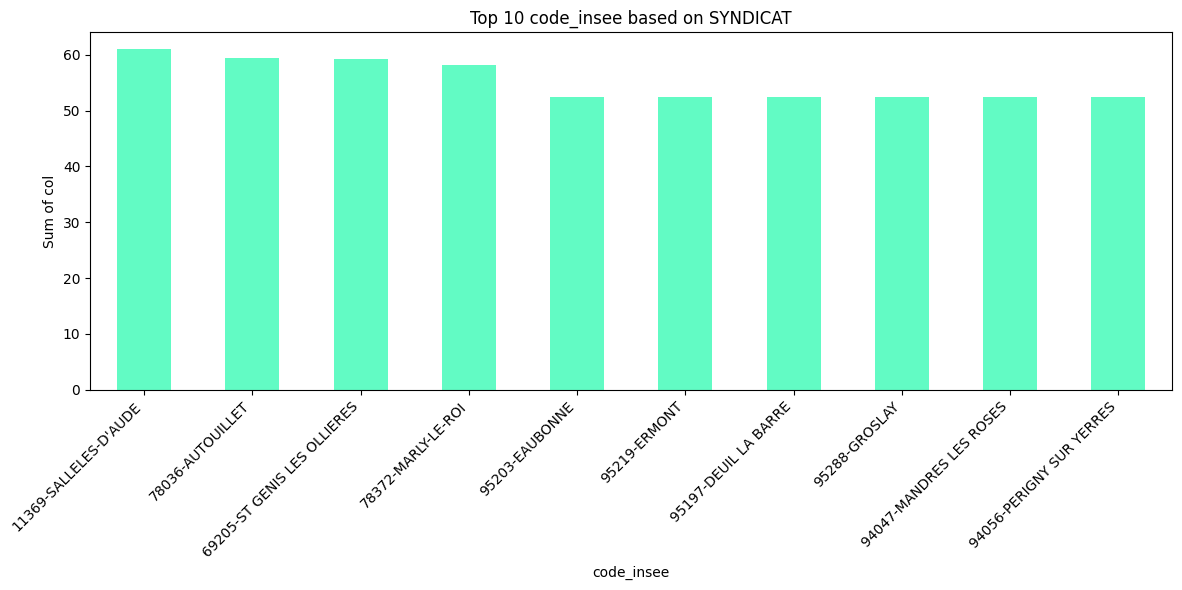

GFP Index(['69123-LYON', '13055-MARSEILLE', '31555-TOULOUSE', '69266-VILLEURBANNE',
       '44109-NANTES', '67482-STRASBOURG', '72181-LE MANS', '49007-ANGERS',
       '35238-RENNES', '83137-TOULON'],
      dtype='object', name='code_insee')


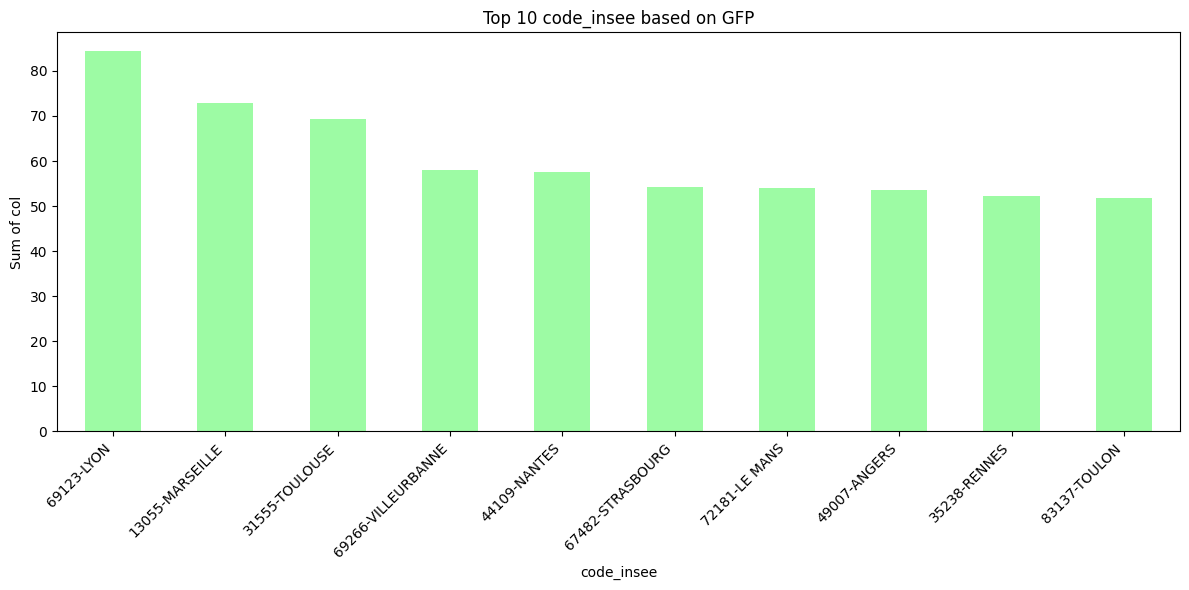

code_insee: 97302-CAYENNE, Percentage of occurrence: 11.11%
code_insee: 72181-LE MANS, Percentage of occurrence: 22.22%
code_insee: 13055-MARSEILLE, Percentage of occurrence: 33.33%
code_insee: 69123-LYON, Percentage of occurrence: 33.33%
code_insee: 31555-TOULOUSE, Percentage of occurrence: 33.33%
code_insee: 33063-BORDEAUX, Percentage of occurrence: 22.22%
code_insee: 67482-STRASBOURG, Percentage of occurrence: 33.33%
code_insee: 34172-MONTPELLIER, Percentage of occurrence: 11.11%
code_insee: 49007-ANGERS, Percentage of occurrence: 22.22%
code_insee: 44109-NANTES, Percentage of occurrence: 33.33%
code_insee: 29232-QUIMPER, Percentage of occurrence: 11.11%
code_insee: 59350-LILLE, Percentage of occurrence: 11.11%
code_insee: 06088-NICE, Percentage of occurrence: 11.11%
code_insee: 52448-SAINT-DIZIER, Percentage of occurrence: 11.11%
code_insee: 57017-AMANVILLERS, Percentage of occurrence: 22.22%
code_insee: 50074-BRECEY, Percentage of occurrence: 11.11%
code_insee: 01001-ABERGEMENT CL

In [ ]:
import pandas as pd
from collections import Counter

# Load the datasets
df = pd.read_csv('all_tax_categories.csv')
# df = df.drop(columns=['Unnamed: 0'])
df_insee = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')

# Merge the datasets
df[['code_insee']] = df_insee[[ 'code_insee' ]]

top_10_code_insee_list = []
colors = plt.cm.rainbow(np.linspace(0, 1, 10))

for i, col in enumerate(df.columns):
    if col not in ['ANNEE', 'DEPARTEMENT', 'CODE REGION', 'code_insee', 'Libellé commune', 'TFPNB','TFPB', 'TAFB','TP','CVAE','TEOM','Tascom','Gemapi','Tasarif','BASE NETTE IMPOSEE']:
        top_10_code_insee = df.groupby('code_insee')[col].sum().nlargest(10)
        print(col, top_10_code_insee.index)
        plt.figure(figsize=(12, 6))
        top_10_code_insee.plot(kind='bar' , color = colors[i])
        plt.title('Top 10 code_insee based on '+ col)
        plt.xlabel('code_insee')
        plt.ylabel('Sum of col')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        top_10_code_insee_list.extend(top_10_code_insee.index)

code_insee_counts = Counter(top_10_code_insee_list)
occurance = {}
total_occurrences = sum(code_insee_counts.values())
for code_insee, count in code_insee_counts.items():
    percentage = (count / 9) * 100
    print(f"code_insee: {code_insee}, Percentage of occurrence: {percentage:.2f}%")
    occurance.update({code_insee : percentage})

In [ ]:
occurance

{'97302-CAYENNE': 11.11111111111111,
 '72181-LE MANS': 22.22222222222222,
 '13055-MARSEILLE': 33.33333333333333,
 '69123-LYON': 33.33333333333333,
 '31555-TOULOUSE': 33.33333333333333,
 '33063-BORDEAUX': 22.22222222222222,
 '67482-STRASBOURG': 33.33333333333333,
 '34172-MONTPELLIER': 11.11111111111111,
 '49007-ANGERS': 22.22222222222222,
 '44109-NANTES': 33.33333333333333,
 '29232-QUIMPER': 11.11111111111111,
 '59350-LILLE': 11.11111111111111,
 '06088-NICE': 11.11111111111111,
 '52448-SAINT-DIZIER': 11.11111111111111,
 '57017-AMANVILLERS': 22.22222222222222,
 '50074-BRECEY': 11.11111111111111,
 '01001-ABERGEMENT CLEMENCIAT': 22.22222222222222,
 '01001-ABERGEMENT-CLEMENCIA (L )': 11.11111111111111,
 "01001-L' ABERGEMENT-CLEMENCIAT": 11.11111111111111,
 "01001-L'ABERGEMENT-CLEMENCIA": 11.11111111111111,
 "01001-L'ABERGEMENT-CLEMENCIAT": 11.11111111111111,
 '01002-ABERGEMENT DE VAREY': 22.22222222222222,
 '01002-ABERGEMENT-DE-VAREY (L )': 11.11111111111111,
 "01002-L' ABERGEMENT-DE-VAREY"

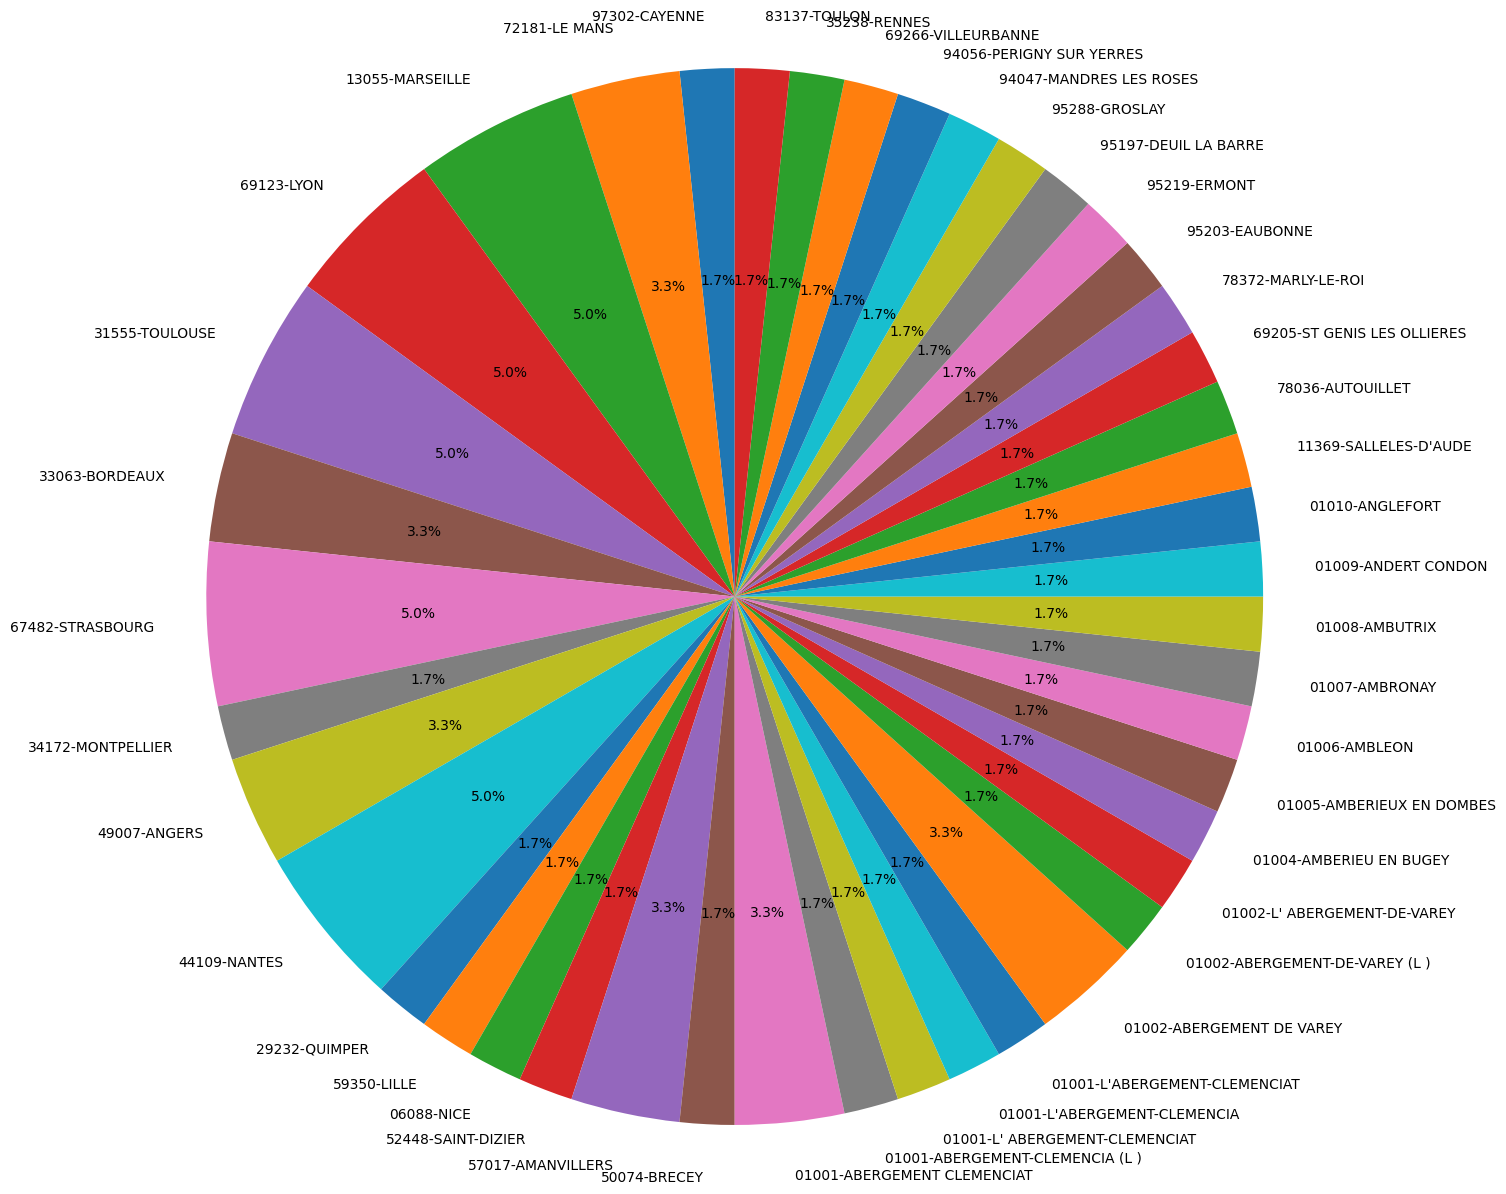

In [ ]:
code_insee_counts = Counter(top_10_code_insee_list)
occurance = {}
total_occurrences = sum(code_insee_counts.values())
for code_insee, count in code_insee_counts.items():
    percentage = (count / 9) * 100
    # print(f"code_insee: {code_insee}, Percentage of occurrence: {percentage:.2f}%")
    occurance.update({code_insee : percentage})

# import matplotlib.pyplot as plt

# # Sort the dictionary by value in descending order
# sorted_occurrences = dict(sorted(occurance.items(), key=lambda x: x[1], reverse=True))

# plt.figure(figsize=(12, 6))
# plt.bar(sorted_occurrences.keys(), sorted_occurrences.values())
# plt.title('Percentage of Occurrence for each code_insee')
# plt.xlabel('code_insee')
# plt.ylabel('Percentage of Occurrence')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

# import matplotlib.pyplot as plt

# sorted_occurrences = dict(sorted(occurance.items(), key=lambda x: x[1], reverse=True))

# plt.figure(figsize=(10, 8))
# plt.barh(list(sorted_occurrences.keys()), list(sorted_occurrences.values()))
# plt.title('Percentage of Occurrence for each code_insee')
# plt.xlabel('Percentage of Occurrence')
# plt.ylabel('code_insee')
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plt.pie(occurance.values(), labels=occurance.keys(), autopct='%1.1f%%', startangle=90)
# plt.title('Percentage of Occurrence for each code_insee')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# import seaborn as sns
# import matplotlib.pyplot as plt

# sorted_occurrences = dict(sorted(occurance.items(), key=lambda x: x[1], reverse=True))

# plt.figure(figsize=(12, 6))
# sns.barplot(x=list(sorted_occurrences.keys()), y=list(sorted_occurrences.values()))
# plt.title('Percentage of Occurrence for each code_insee')
# plt.xlabel('code_insee')
# plt.ylabel('Percentage of Occurrence')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

### TAX COLLECTOR

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
df = pd.DataFrame()
df['ANNEE'] = pqdf['ANNEE']
for key, value in tax_collector_cols.items():
    columns =pd.DataFrame()
    cols = [col for col, dtype in pqdf[tax_collector_cols[key]].dtypes.items() if (dtype == 'float64' or dtype == 'int64' )]
    columns[cols] = pqdf[cols].compute()
    columns[cols] = columns[cols].fillna(int(0))
    columns[cols] = columns[cols].replace('.', int(0))
    string_cols = [col for col, dtype in pqdf[tax_collector_cols[key]].dtypes.items() if ((dtype == 'object' and pqdf[col].apply(lambda x: str(x).isdigit()).any()))]
    columns[string_cols] = pqdf[string_cols].compute()
    columns[string_cols] = columns[string_cols].fillna('0')
    columns[string_cols] = columns[string_cols].replace('.', '0')
    columns[string_cols] = columns[string_cols].astype(float)
    columns = columns.reset_index(drop=True)

    if columns.size !=0:
        columns[string_cols+cols] = scaler.fit_transform(columns[string_cols+cols])
        print(key )
    # columns.drop(columns=['index'], inplace=True)

    df[key] = columns.sum(axis=1)

df.to_csv('all_tax_collector.csv')

COMMUNE
INTERCOMMUNALITE
CCI
CMA
SYNDICAT
GFP


In [ ]:
df

COMMUNE  INTERCOMMUNALITE  CCI  CMA  SYNDICAT       GFP
0        0.876672          0.152148  0.0  1.0       0.0  0.289237
1        0.876681          0.151919  0.0  1.0       0.0  0.289237
2        0.879589          0.330525  0.0  1.0       0.0  0.289237
3        0.876394          0.155543  0.0  1.0       0.0  0.289237
4        0.876627          0.150744  0.0  1.0       0.0  0.289237
...           ...               ...  ...  ...       ...       ...
1528917  0.876585          0.150491  0.0  0.0       0.0  0.289237
1528918  0.876585          0.150491  0.0  0.0       0.0  0.289237
1528919  0.876585          0.150491  0.0  0.0       0.0  0.289237
1528920  0.876585          0.150491  0.0  0.0       0.0  0.289237
1528921  0.876585          0.150491  0.0  0.0       0.0  0.289237

[1528922 rows x 6 columns]

In [ ]:
df = pd.read_csv('all_tax_collector.csv')
df.drop(columns=['DGFiP', 'EPT', 'Unnamed: 0'], inplace=True)
df.to_csv('all_tax_collector.csv', index=False)


In [ ]:
df.columns

Index(['ANNEE', 'COMMUNE', 'INTERCOMMUNALITE', 'CCI', 'CMA', 'SYNDICAT',
       'GFP'],
      dtype='object')

In [ ]:
import pandas as pd
df = pd.read_csv('all_tax_collector.csv')
year = df['ANNEE']

conversion_rate = 6.55957
new = df.loc[df['ANNEE'] >= 2002, ['COMMUNE', 'INTERCOMMUNALITE', 'CCI', 'CMA', 'SYNDICAT',
       'GFP']].apply(lambda x: x * conversion_rate)

temp = df.loc[df['ANNEE'] < 2002, ['COMMUNE', 'INTERCOMMUNALITE', 'CCI', 'CMA', 'SYNDICAT',
       'GFP']].copy()
df = pd.concat([new, temp])
df['ANNEE']=year
print(df.columns)
df.to_csv('all_tax_categories.csv', index=False)


Index(['COMMUNE', 'INTERCOMMUNALITE', 'CCI', 'CMA', 'SYNDICAT', 'GFP',
       'ANNEE'],
      dtype='object')


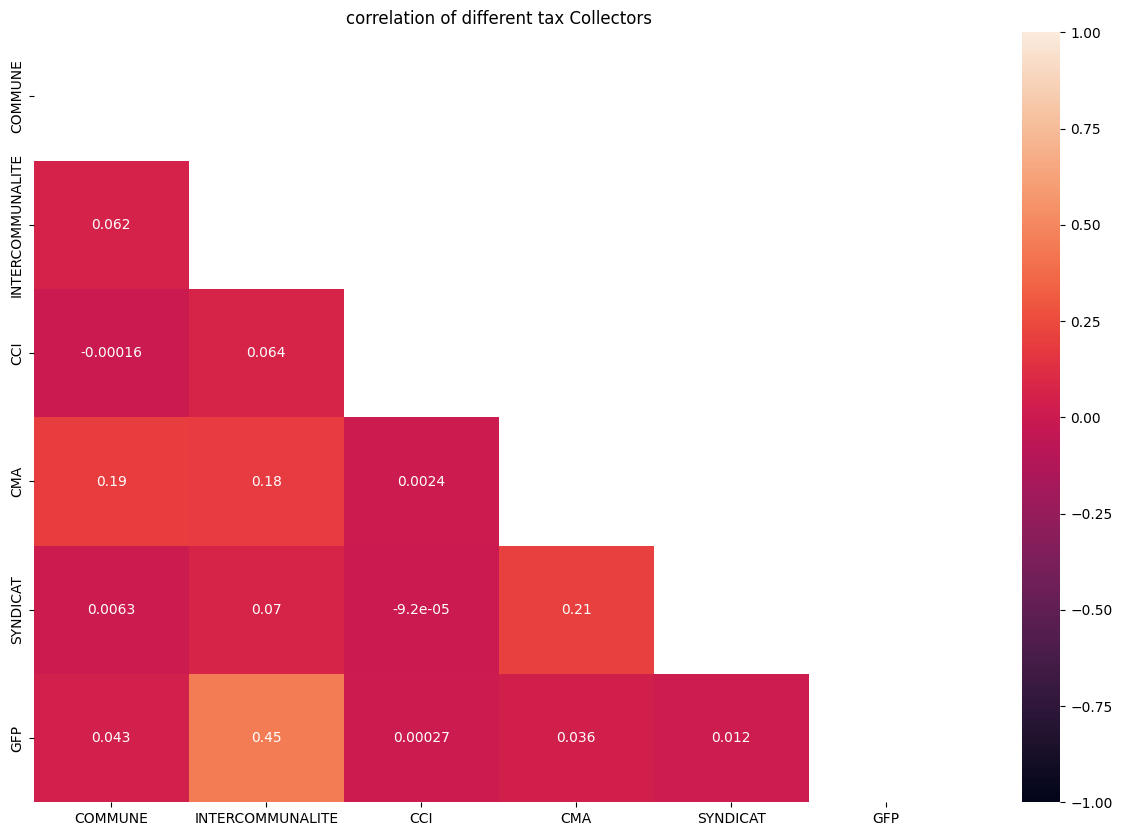

In [ ]:
df = pd.read_csv('all_tax_collector.csv')
df= df.drop(columns=[ 'ANNEE'])
df = df.dropna(axis='columns', how='all')

heat_map(df, f'correlation of different tax Collectors')

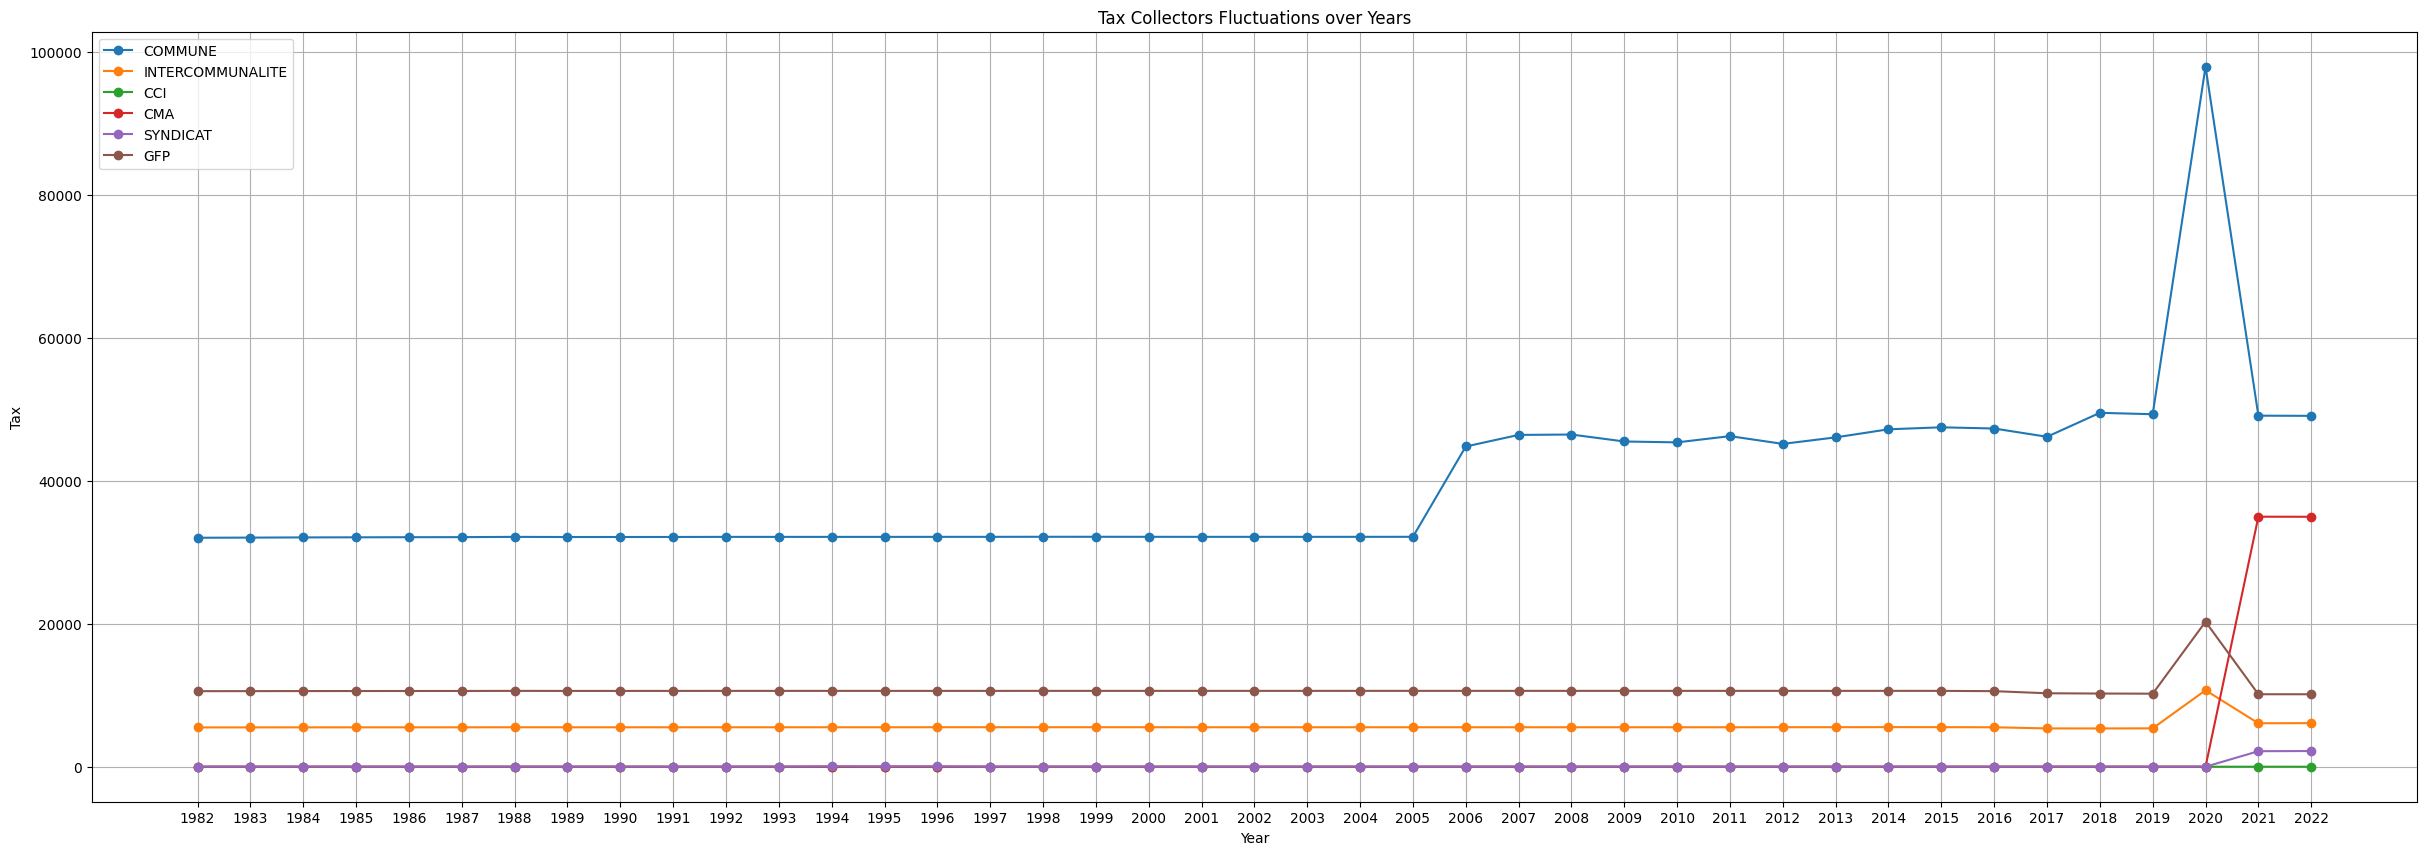

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('all_tax_collector.csv')
plt.figure(figsize=(30, 10))
for col in df.columns:
    if(col != 'ANNEE'):
      yearly_data = df.groupby('ANNEE')[col].sum().reset_index()
      plt.plot(yearly_data['ANNEE'], yearly_data[col], marker='o', label=col)
plt.title('Tax Collectors Fluctuations over Years')
plt.xlabel('Year')
plt.ylabel('Tax')
plt.grid(True)
plt.legend()
plt.xticks(yearly_data['ANNEE'].unique())
plt.show()


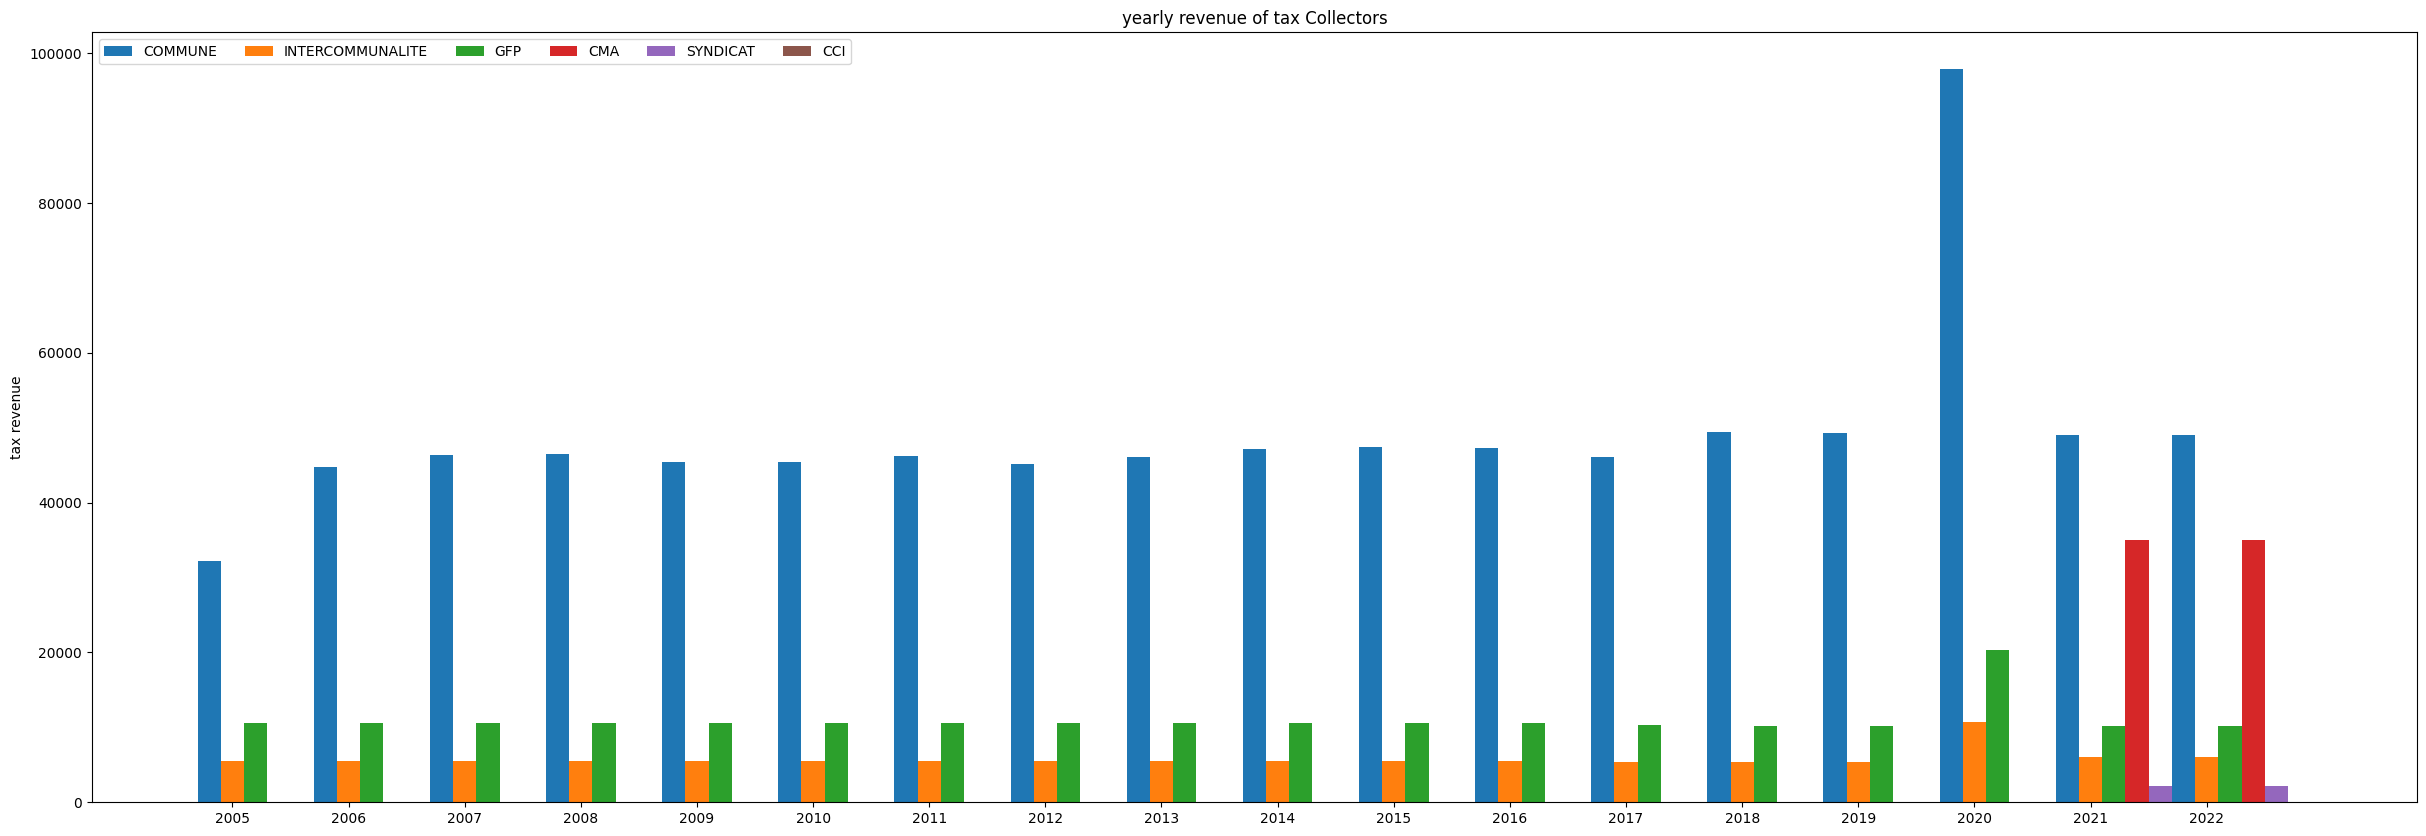

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('all_tax_collector.csv')

# Filter the dataframe to include only the years from 2013 to the end
# df = df[df['ANNEE'] >= 2005]

# Group the data by year and sum the values for each column
COMMUNE = df.groupby('ANNEE')['COMMUNE'].sum()
INTERCOMMUNALITE = df.groupby('ANNEE')['INTERCOMMUNALITE'].sum()
CCI = df.groupby('ANNEE')['CCI'].sum()
CMA = df.groupby('ANNEE')['CMA'].sum()
SYNDICAT = df.groupby('ANNEE')['SYNDICAT'].sum()
GFP = df.groupby('ANNEE')['GFP'].sum()


# Create a list of unique years from 2013 to the end
uniqueness = pd.Series(range(2005, df['ANNEE'].max() + 1))

fig, ax = plt.subplots(figsize=(30, 10))

projects = {
    'COMMUNE':COMMUNE,
    'INTERCOMMUNALITE':INTERCOMMUNALITE,
    'GFP':GFP,
    'CMA':CMA,
    'SYNDICAT':SYNDICAT,
    'CCI':CCI,

}

x = np.arange(len(uniqueness))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

for key, value in projects.items():
    value = value.reindex(uniqueness, fill_value=0)
    offset = width * multiplier
    rects = ax.bar(x + offset, value.values, width, label=key)
    multiplier += 1

ax.set_ylabel('tax revenue')
ax.set_title('yearly revenue of tax Collectors')
ax.set_xticks(x + width, uniqueness)
ax.legend(loc='upper left', ncols=6)

plt.show()

### commune tax tevenue


In [ ]:
import pandas as pd
# pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
temp = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')
revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    'CFE - COMMUNE / PRODUIT REEL NET',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / MONTANT REEL',
    'TH - COMMUNE / MONTANT REEL'
]

for col in revenue_columns:
    temp[col] = temp[col].astype(float)

temp['Total_Tax_Revenue1'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             temp["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             temp['CFE - COMMUNE / PRODUIT REEL NET'])

temp['Total_Tax_Revenue2'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp[ 'CFE - COMMUNE / MONTANT REEL'] +
                             temp['TH - COMMUNE / MONTANT REEL' ])

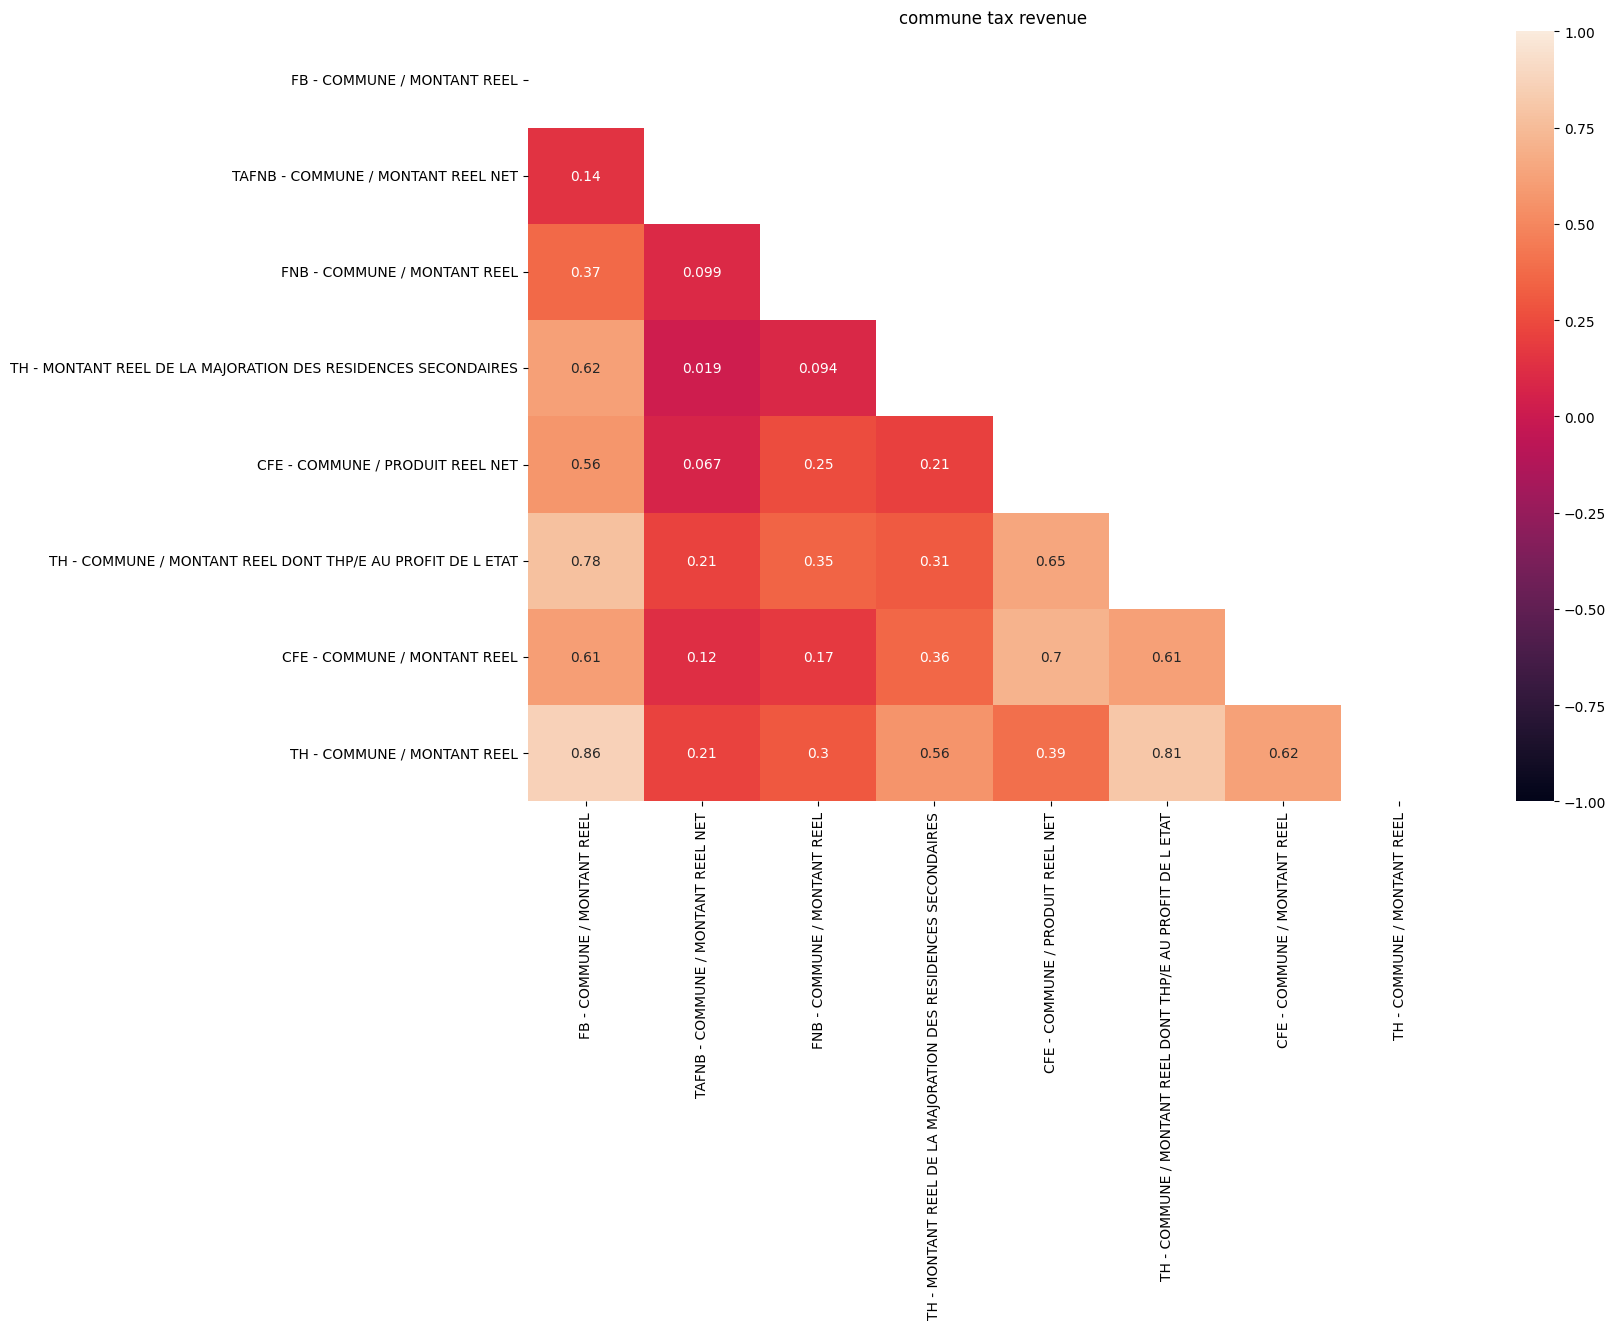

In [ ]:
heat_map(temp[revenue_columns],'commune tax revenue')

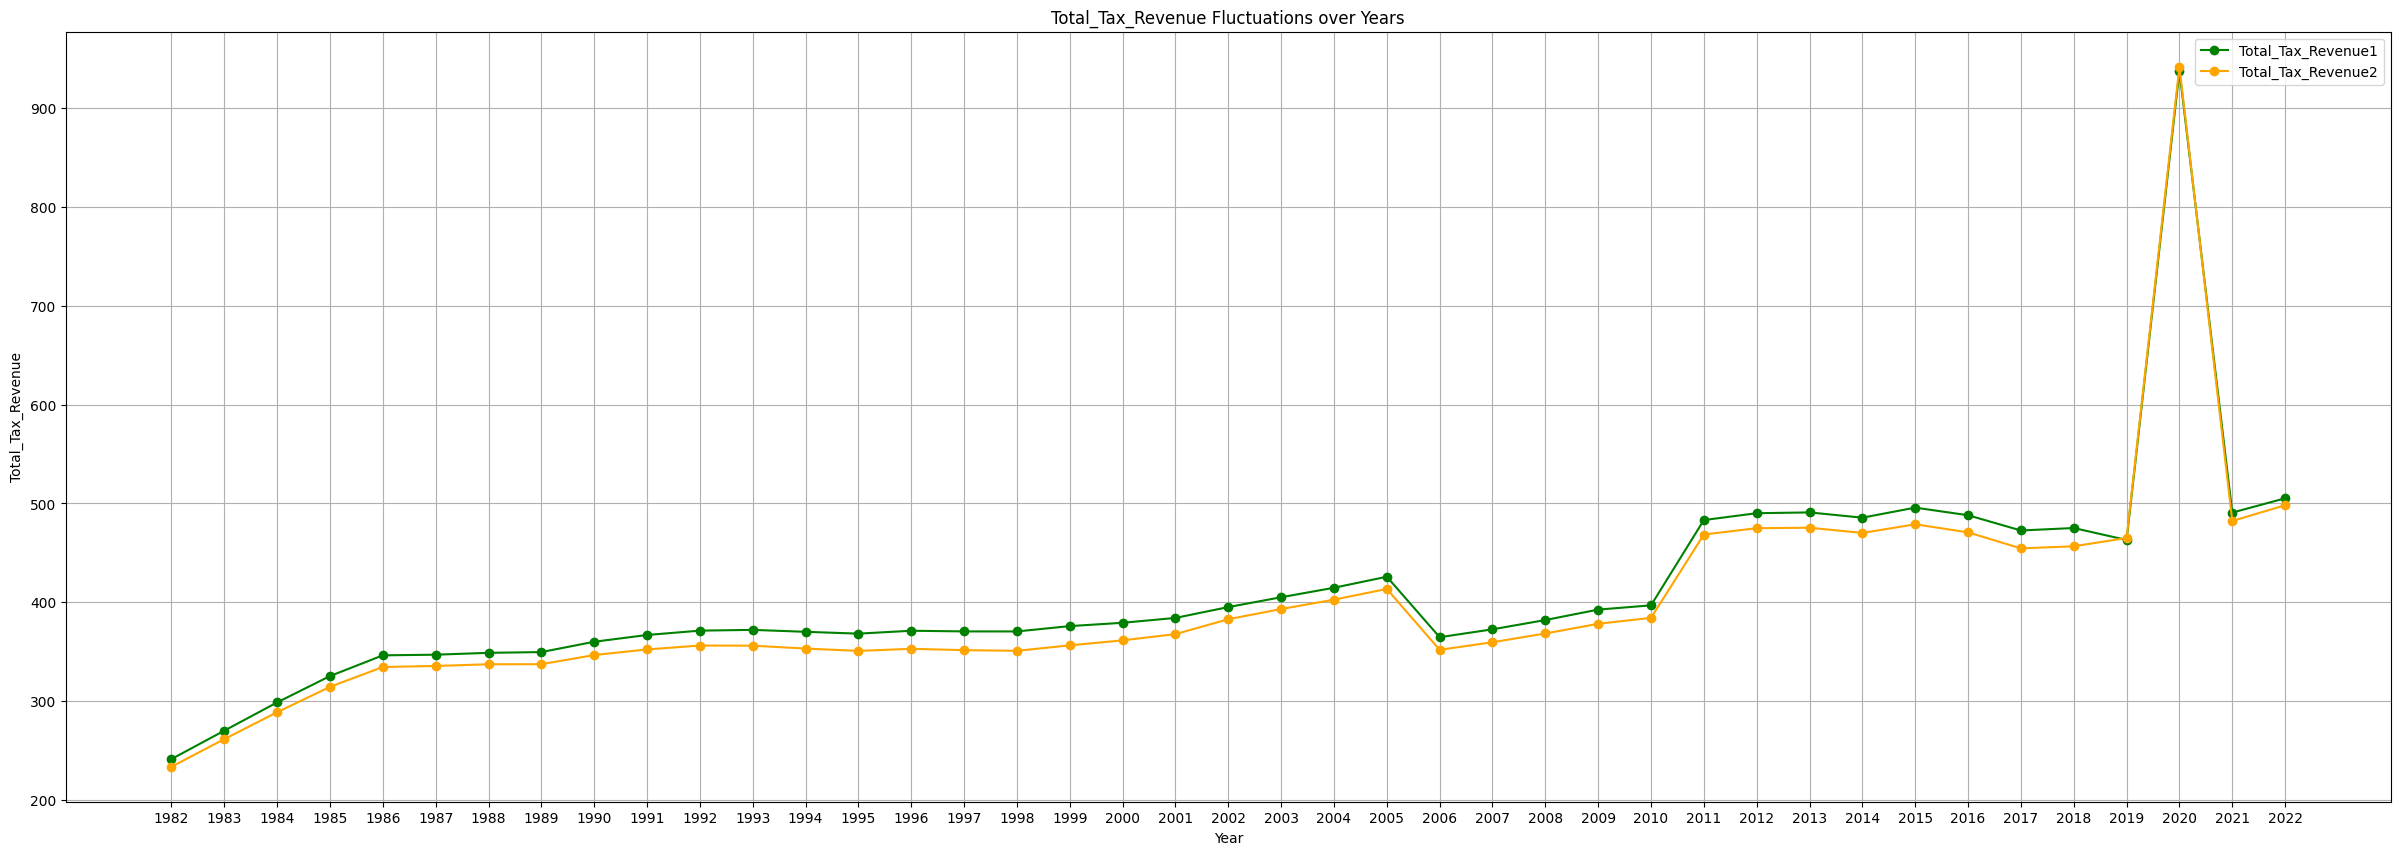

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
yearly_data = temp.groupby('ANNEE')['Total_Tax_Revenue1'].sum().reset_index()
plt.plot(yearly_data['ANNEE'], yearly_data['Total_Tax_Revenue1'], marker='o', label='Total_Tax_Revenue1', color='green')
yearly_data = temp.groupby('ANNEE')['Total_Tax_Revenue2'].sum().reset_index()
plt.plot(yearly_data['ANNEE'], yearly_data['Total_Tax_Revenue2'], marker='o', label='Total_Tax_Revenue2', color='orange')

plt.title('Total_Tax_Revenue Fluctuations over Years')
plt.xlabel('Year')
plt.ylabel('Total_Tax_Revenue')
plt.grid(True)
plt.legend()
plt.xticks(yearly_data['ANNEE'].unique())
plt.show()


### Municipality Revenue

In [ ]:
commune_columns = [col for col in pqdf.columns if 'commune' in col.lower() ]
print(len(commune_columns))
commune_rate_columns = [col for col in pqdf.columns if 'commune' in col.lower() and 'taux' in col.lower()]
print(len(commune_rate_columns))
commune_amount_columns = [col for col in pqdf.columns if 'commune' in col.lower() and 'montant' in col.lower()]
print(len(commune_amount_columns))
rate_columns = [col for col in pqdf.columns if 'taux' in col.lower()]
print(len(rate_columns))


289
12
20
80


In [ ]:
commune_columns

In [ ]:
commune_rate_columns

In [ ]:
commune_amount_columns

In [ ]:
rate_columns

In [ ]:
col = [col for col in pqdf.columns if 'cfe' in col.lower() and 'base' in col.lower() and 'commune' in col.lower()   ]
col

In [ ]:
col = [col for col in pqdf.columns if 'cfe' in col.lower() and 'taux' in col.lower() and 'commune' in col.lower()   ]
col

['CFE - COMMUNE /TAUX NET', 'CFE - COMMUNE / TAUX VOTE']

In [ ]:
col = [col for col in pqdf.columns if 'tse' in col.lower()     ]
col

In [ ]:
col = [col for col in pqdf.columns if 'cfe' in col.lower()  and 'commune' in col.lower()   ]
col

In [ ]:
# TEOM
col = [col for col in pqdf.columns if 'teom' in col.lower()     ]
col

In [ ]:
# IFER
col = [col for col in pqdf.columns if 'ifer' in col.lower()   and 'commune' in col.lower()    ]
col

In [ ]:
'Tasarif'
# IFER
col = [col for col in pqdf.columns if 'tasarif' in col.lower()  ]
col

['FB - Dotation abattement 50% VL EI (de droit) - TASARIF / REGION',
 'CFE - Dotation abattement 50% VL EI (de droit) - TASARIF / REGION']

In [ ]:
th_taux = [col for col in pqdf.columns if 'fnb' in col.lower() and 'commune' in col.lower()  and 'montant' in col.lower()]
((th_taux))

['FNB - COMMUNE / MONTANT REEL', 'TAFNB - COMMUNE / MONTANT REEL NET']

# Questions

## preparing dataset

In [ ]:
# pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
dff = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')
# ddf = pd.read_csv('/content/drive/MyDrive/datasharing-dir/commune_tax_Normalize_Fractionrate.csv')
df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')

<ipython-input-29-2c2cff33c193>:2: DtypeWarning: Columns (0,1,2,5,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dff = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')
<ipython-input-29-2c2cff33c193>:4: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')


In [ ]:

df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')
df.columns

Index(['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
       'TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT',
       'CFE - COMMUNE / PRODUIT REEL NET',
       'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL',
       'IFER TOTALE / COMMUNE', 'Part de CVAE au profit de la commune',
       'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT',
       'CFE - SYNDICATS ET ORG. ASSIMILES /  PRODUIT REEL NET',
       'TH - SYNDICATS ET ORG. ASSIMILES / NOMBRE LISSAGE',
       'FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL',
       'FB - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
       'TH - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL', 'code_insee',
       'FB - COMMUNE / MONTANT REEL', 'TAFNB - COMMUNE / MONTANT REEL NET',
       'FNB - COMMUNE / MONTANT REEL', 'TH - COMMUNE / MONTANT REEL',
       'CFE - COMMUNE / MONTANT REEL', 'ANNEE'],
      dtype='object')

In [ ]:
ddd = pqdf[['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
       'TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT',
       'CFE - COMMUNE / PRODUIT REEL NET',
       'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL',

       'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT',
       'CFE - SYNDICATS ET ORG. ASSIMILES /  PRODUIT REEL NET',
       'TH - SYNDICATS ET ORG. ASSIMILES / NOMBRE LISSAGE',
       'FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL',
       'FB - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
       'TH - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
       'FB - COMMUNE / MONTANT REEL', 'TAFNB - COMMUNE / MONTANT REEL NET',
       'FNB - COMMUNE / MONTANT REEL',  'ANNEE']].compute()
ddd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1528922 entries, 0 to 44189
Data columns (total 14 columns):
 #   Column                                                                              Non-Null Count    Dtype  
---  ------                                                                              --------------    -----  
 0   TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES                       313789 non-null   float64
 1   TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT                          1415884 non-null  string 
 2   CFE - COMMUNE / PRODUIT REEL NET                                                    1450810 non-null  string 
 3   POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL  1126098 non-null  float64
 4   FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT     392457 non-null   float64
 5   CFE - SYNDICATS ET ORG. ASSIMILES /  PRODUIT REEL NET                               

In [ ]:
dff.columns
dff ['code_insee'] = dff ['code_insee'].astype(str) + '-'+ dff ['Libellé commune']
dff ['code_insee']

0          01001-ABERGEMENT CLEMENCIAT
1            01002-ABERGEMENT DE VAREY
2              01004-AMBERIEU EN BUGEY
3            01005-AMBERIEUX EN DOMBES
4                        01006-AMBLEON
                      ...             
1528917           97420-SAINTE-SUZANNE
1528918                  97421-SALAZIE
1528919                   97422-TAMPON
1528920            97423-TROIS-BASSINS
1528921                   97424-CILAOS
Name: code_insee, Length: 1528922, dtype: object

In [ ]:
df['code_insee'] = dff ['code_insee']
df.to_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv',index=False)
df['code_insee']

0          01001-ABERGEMENT CLEMENCIAT
1            01002-ABERGEMENT DE VAREY
2              01004-AMBERIEU EN BUGEY
3            01005-AMBERIEUX EN DOMBES
4                        01006-AMBLEON
                      ...             
1528917           97420-SAINTE-SUZANNE
1528918                  97421-SALAZIE
1528919                   97422-TAMPON
1528920            97423-TROIS-BASSINS
1528921                   97424-CILAOS
Name: code_insee, Length: 1528922, dtype: object

In [ ]:
column =[
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
    'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL',
    'IFER TOTALE / COMMUNE',
    'Part de CVAE au profit de la commune',
    'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT',
    'CFE - SYNDICATS ET ORG. ASSIMILES /  PRODUIT REEL NET',
    'TH - SYNDICATS ET ORG. ASSIMILES / NOMBRE LISSAGE',
    'FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL',
    'FB - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
    'TH - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
]
df = pqdf[[
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
    'IFER TOTALE / COMMUNE',
    'Part de CVAE au profit de la commune',
    'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT',
    'CFE - SYNDICATS ET ORG. ASSIMILES /  PRODUIT REEL NET',
    'TH - SYNDICATS ET ORG. ASSIMILES / NOMBRE LISSAGE',
    'FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL',
    'FB - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
    'TH - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
    'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL',

    'ANNEE']].compute()

df[column] = df[column].fillna('0')
df[column]  = df[column].replace('.', '0')
df[column]  = df[column].replace(',', '0')
for col in column:
    df[col] = df[col].astype(float)
# =========================================CONVERSION RATE==============================================
conversion_rate = 6.55957

new = df.loc[df['ANNEE'] >= 2002, ['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
    'IFER TOTALE / COMMUNE',
    'Part de CVAE au profit de la commune',
    'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT',
    'CFE - SYNDICATS ET ORG. ASSIMILES /  PRODUIT REEL NET',
    'TH - SYNDICATS ET ORG. ASSIMILES / NOMBRE LISSAGE',
    'FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL',
    'FB - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
    'TH - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',]].apply(lambda x: x * conversion_rate)

temp = df.loc[df['ANNEE'] < 2002, ['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
    'IFER TOTALE / COMMUNE',
    'Part de CVAE au profit de la commune',
    'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT',
    'CFE - SYNDICATS ET ORG. ASSIMILES /  PRODUIT REEL NET',
    'TH - SYNDICATS ET ORG. ASSIMILES / NOMBRE LISSAGE',
    'FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL',
    'FB - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
    'TH - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',]].copy()

# ========================================NORMALIZATION ===============================================

df = pd.DataFrame()
df = pd.concat([new, temp])
df[ 'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'] = pqdf[ 'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL']
df = pd.DataFrame(scaler.fit_transform(df[column]), columns=column)

df['code_insee'] = dff[ 'code_insee']

df[['FB - COMMUNE / MONTANT REEL', 'TAFNB - COMMUNE / MONTANT REEL NET',
       'FNB - COMMUNE / MONTANT REEL', 'TH - COMMUNE / MONTANT REEL',
       'CFE - COMMUNE / MONTANT REEL', 'ANNEE']] = ddf[[
       'FB - COMMUNE / MONTANT REEL', 'TAFNB - COMMUNE / MONTANT REEL NET',
       'FNB - COMMUNE / MONTANT REEL', 'TH - COMMUNE / MONTANT REEL',
       'CFE - COMMUNE / MONTANT REEL', 'ANNEE']]
df.to_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv',index=False)
df

TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES  \
0                                                      0.0               
1                                                      0.0               
2                                                      0.0               
3                                                      0.0               
4                                                      0.0               
...                                                    ...               
1528917                                                0.0               
1528918                                                0.0               
1528919                                                0.0               
1528920                                                0.0               
1528921                                                0.0               

         TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT  \
0                                                 0.000025            
1                                                 0.000019            
2                                                 0.000519            
3                                                 0.000073            
4                                                 0.000009            
...                                                    ...            
1528917                                           0.000138            
1528918                                           0.000029            
1528919                                           0.000597            
1528920                                           0.000014            
1528921                                           0.000021            

         CFE - COMMUNE / PRODUIT REEL NET  \
0                                0.000000   
1                                0.000000   
2                                0.000000   
3                                0.000000   
4                                0.000000   
...                                   ...   
1528917                          0.000406   
1528918                          0.000015   
1528919                          0.000314   
1528920                          0.000010   
1528921                          0.000020   

         POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL  \
0                                                 0.000351                                    
1                                                 0.000113                                    
2                                                 0.006380                                    
3                                                 0.000781                                    
4                                                 0.000052                                    
...                                                    ...                                    
1528917                                                NaN                                    
1528918                                                NaN                                    
1528919                                                NaN                                    
1528920                                                NaN                                    
1528921                                                NaN                                    

         IFER TOTALE / COMMUNE  Part de CVAE au profit de la commune  \
0                          0.0                              0.000842   
1                          0.0                              0.000842   
2                          0.0                              0.000842   
3                          0.0                              0.000842   
4                          0.0                              0.000842   
...                        ...                                   ...   
1528917                    0.0                              0.000842   
1528918  

In [ ]:
df = df.drop(columns=['ANNEE', 'code_insee'])
df.sum(axis=0)

TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES                            16.117039
TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT                              400.484713
CFE - COMMUNE / PRODUIT REEL NET                                                        220.037111
POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL      792.165454
IFER TOTALE / COMMUNE                                                                    11.015721
Part de CVAE au profit de la commune                                                   1303.902741
FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT          14.554236
CFE - SYNDICATS ET ORG. ASSIMILES /  PRODUIT REEL NET                                   318.039472
TH - SYNDICATS ET ORG. ASSIMILES / NOMBRE LISSAGE                                         1.531915
FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL                                       1930.493640
FB - SYNDI

In [ ]:
df.fillna(0, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528922 entries, 0 to 1528921
Data columns (total 17 columns):
 #   Column                                                                              Non-Null Count    Dtype  
---  ------                                                                              --------------    -----  
 0   TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES                       1528922 non-null  float64
 1   TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT                          1528922 non-null  float64
 2   CFE - COMMUNE / PRODUIT REEL NET                                                    1528922 non-null  float64
 3   POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL  1126098 non-null  float64
 4   IFER TOTALE / COMMUNE                                                               1528922 non-null  float64
 5   Part de CVAE au profit de la commune                                         

## municipality ranking
Rank municipalities based on their tax revenue. Display the top 5 and bottom 5 using a visual aid of your choice. What conclusions can you draw from this?

#### relevant columns

In [ ]:
montant = [       'FNB - GFP / MONTANT REEL',
                  'FB - COMMUNE / MONTANT REEL',  # Property tax (Foncier Bâti) revenue
                  'TAFNB - COMMUNE / MONTANT REEL NET',  # Non-built property tax (Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties) revenue
                  'FNB - COMMUNE / MONTANT REEL',  # Non-built property tax (Foncier Non Bâti) revenue
                  'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',  # Additional tax on secondary residences revenue
                  #-------------  Malihe  ---------
                  'FB - COMMUNE / MONTANT LISSAGE',
                  'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / COMMUNE'
                  'CFE - LISSAGE / COMMUNE / MONTANT',
                  'CFE - COMMUNE / PRODUIT REEL NET',
                  'FNB - TSE / MONTANT REEL',
                  'FB - TSE / MONTANT REEL',
                  'TH - TSE / MONTANT REEL',
                  'IFER EOLIENNES ART 1519 D DU CGI / COMMUNE / MONTANT',
                  'TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT',
                  'TH - COMMUNE / MONTANT REEL COMMUNAL DE THP/E AU PROFIT DE L ETAT',
                  'TH - COMMUNE / MONTANT REEL COMMUNAL AU PROFIT DE LA COMMUNE',
                  'TH - COMMUNE / MONTANT LISSAGE',
                  'IFER CENTRALES NUCLEAIRES OU THERMIQUES A FLAMME ART 1519 E DU CGI / COMMUNE / MONTANT',
                  'IFER GEOTHERMIE (Art 1519 HB) DU CGI / COMMUNE / MONTANT',
                  'FB - Dotation abattement 50% VL EI (de droit) - TASARIF / REGION',
                  'CFE - Dotation abattement 50% VL EI (de droit) - TASARIF / REGION'
]

# Extract relevant columns for tax revenue analysis
revenue_columns2 = [
                  'FNB - GFP / MONTANT REEL',
                  'FB - COMMUNE / MONTANT REEL',  # Property tax (Foncier Bâti) revenue
                  'TAFNB - COMMUNE / MONTANT REEL NET',  # Non-built property tax (Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties) revenue
                  'FNB - MONTANT REEL',  # Non-built property tax (Foncier Non Bâti) revenue
                  'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'  # Additional tax on secondary residences revenue
                  'CFE - LISSAGE / COMMUNE / MONTANT',
                  'CFE - COMMUNE / PRODUIT REEL NET'
                  'FNB - TSE / MONTANT REEL',
                  'FB - TSE / MONTANT REEL',
                  'TH - TSE / MONTANT REEL',
                  'IFER EOLIENNES ART 1519 D DU CGI / COMMUNE / MONTANT',
                  'TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT',

                  'FB - COMMUNE / BASE NETTE', #The net tax base for the property tax (Foncier Bâti) at the municipal level.
                  'TAFNB - COMMUNE / BASE TAXABLE COMMUNALE', #The taxable base for the non-built property tax (Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties) at the municipal level.
                  'FNB - BASE NETTE',#The net tax base for the non-built property tax (Foncier Non Bâti) at the beneficiary community level (municipality, union, intercommunal structure).
                  'TH - V.L. BRUTE DE THP/THE',
                  'CFE - COMMUNE / BASE',
                  'FNB - TSE / BASE NETTE',
                  'FB - TSE / BASE NETTE',
                  'TH - TSE / BASE NETTE',
                  'CFE - TSE / BASES',
                  'TH - TAUX DE MAJORATION DES RESIDENCES SECONDAIRES',
                  'TH - COMMUNE / TAUX NET'
                  'FNB - TAUX NET',
                  'TAFNB - COMMUNE / TAUX NET',
                  'FB - COMMUNE / TAUX NET',
                  'TH - COMMUNE / TAUX VOTE',
                  'CFE - COMMUNE /TAUX NET',
                  'CFE - COMMUNE / TAUX VOTE'
                  'FNB - TSE / TAUX NET',
                  'FB - TSE / TAUX NET',
                  'TH - TSE / TAUX NET',
                  'CFE - TSE / TAUX NET',

                  ]

revenue_columns = [
                'FB - COMMUNE / MONTANT REEL', # Property tax (Foncier Bâti) revenue
                'TAFNB - COMMUNE / MONTANT REEL NET', # Non-built property tax (Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties) revenue
                'FNB - COMMUNE / MONTANT REEL', # Non-built property tax (Foncier Non Bâti) revenue
                'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES', # Additional tax on secondary residences revenue
                'CFE - COMMUNE / PRODUIT REEL NET' # Business Property Tax (Cotisation Foncière des Entreprises) revenue
                ]
tax_base_columns = [
                'FB - COMMUNE / BASE NETTE', # Property tax (Foncier Bâti) tax base
                'TAFNB - COMMUNE / BASE TAXABLE COMMUNALE', # Non-built property tax (Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties) tax base
                'FNB - BASE NETTE', # Non-built property tax (Foncier Non Bâti) tax base
                'TH - V.L. BRUTE DE THP/THE', # Housing tax (Taxe d'Habitation) tax base
                'CFE - COMMUNE / BASE' # Business Property Tax (Cotisation Foncière des Entreprises) tax base
                ]
tax_rate_columns = [
                'TH - TAUX DE MAJORATION DES RESIDENCES SECONDAIRES', # Additional tax on secondary residences rate
                'TH - COMMUNE / TAUX NET', # Housing tax (Taxe d'Habitation) net rate
                'FNB - TAUX NET', # Non-built property tax (Foncier Non Bâti) net rate
                'TAFNB - COMMUNE / TAUX NET', # Non-built property tax (Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties) net rate
                'FB - COMMUNE / TAUX NET', # Property tax (Foncier Bâti) net rate
                'CFE - COMMUNE /TAUX NET' # Business Property Tax (Cotisation Foncière des Entreprises) net rate
                ]


#### code

<ipython-input-78-cc5f75d28609>:5: DtypeWarning: Columns (2,3,4,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')
<ipython-input-78-cc5f75d28609>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_df['COMMUNE'] = top_10_df['COMMUNE'].astype('category')


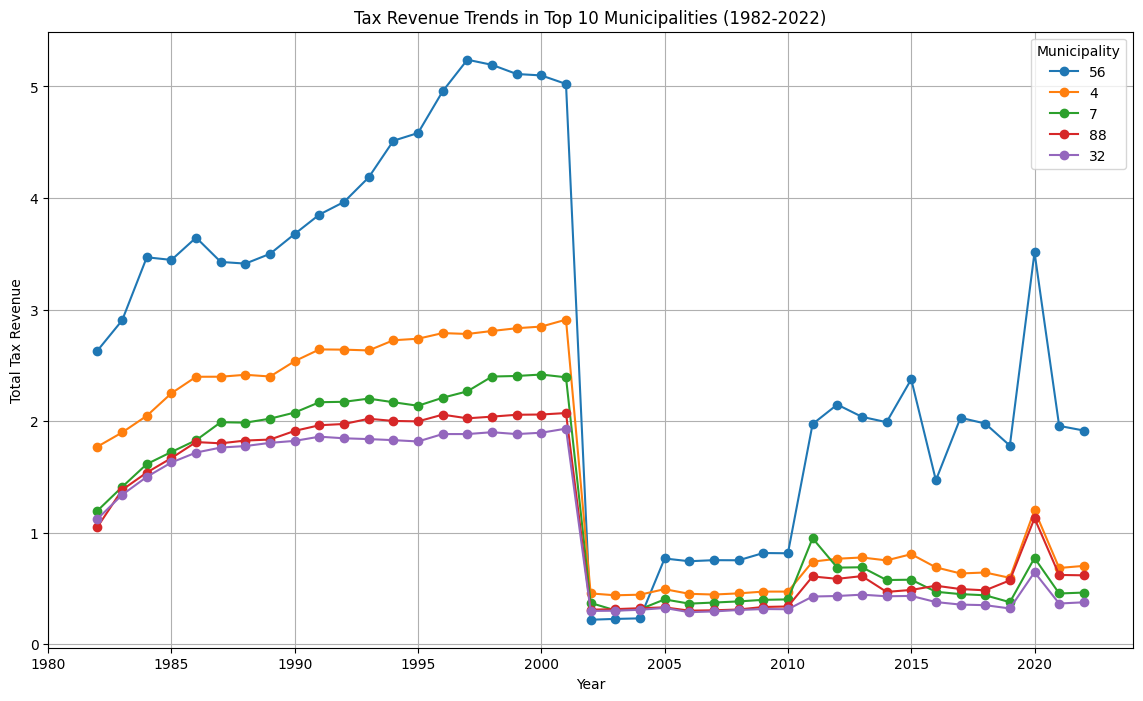

<ipython-input-78-cc5f75d28609>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_df['COMMUNE'] = top_10_df['COMMUNE'].astype('category')


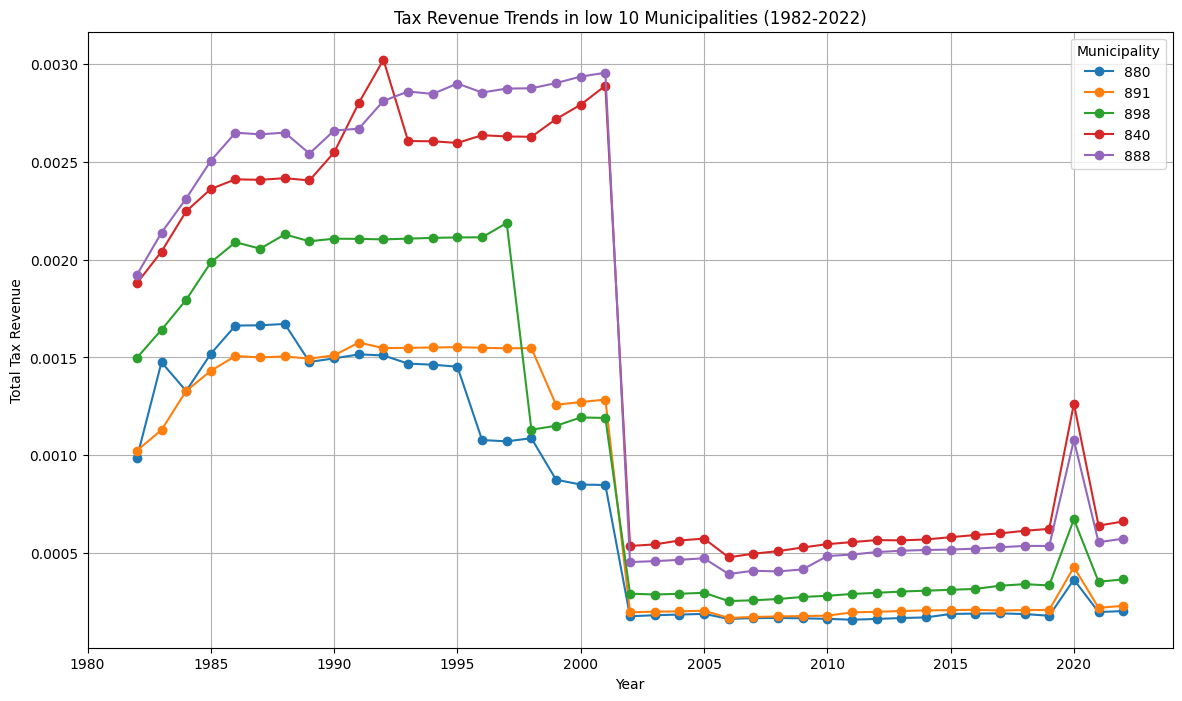

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)
temp =pd.DataFrame()
# Load your Dask DataFrame

revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',

]
pdf = pqdf[revenue_columns].compute()
pdf = pdf.reset_index(drop=True)
pdf[revenue_columns] = pdf[revenue_columns].fillna('0')
pdf[revenue_columns]  = pdf[revenue_columns].replace('.', '0')
pdf[revenue_columns]  = pdf[revenue_columns].replace(',', '0')
temp =df
temp = temp.reset_index(drop=True)
temp[revenue_columns] = pdf[revenue_columns]
for col in revenue_columns:
    temp[col] = temp[col].astype(float)
temp[revenue_columns] = scaler.fit_transform(temp[revenue_columns])


temp['Total_Tax_Revenue'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             temp["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             temp['CFE - COMMUNE / PRODUIT REEL NET'])


# Compute the Dask DataFrame to get the top 10 municipalities
top_10_largest_municipalities = temp.groupby('COMMUNE')['Total_Tax_Revenue'].sum().nlargest(5).index
top_10_df = temp[temp['COMMUNE'].isin(top_10_largest_municipalities)]

# Convert 'COMMUNE' to categorical type with known categories
top_10_df['COMMUNE'] = top_10_df['COMMUNE'].astype('category')

# Pivot the table to get a multi-index DataFrame with Municipality and Year
pivot_df = top_10_df.pivot_table(index='ANNEE', columns='COMMUNE', values='Total_Tax_Revenue', aggfunc='sum')

pivot_df = pivot_df[top_10_largest_municipalities]
# Plot the data
pivot_df.plot(figsize=(14, 8), marker='o')
plt.title('Tax Revenue Trends in Top 10 Municipalities (1982-2022)')
plt.xlabel('Year')
plt.ylabel('Total Tax Revenue')
plt.legend(title='Municipality')
plt.grid(True)
plt.show()

# ----------------------------------SMALLEST -----------------------------------
top_10_smallest_municipalities = temp.groupby('COMMUNE')['Total_Tax_Revenue'].sum().nsmallest(5).index
top_10_df = temp[temp['COMMUNE'].isin(top_10_smallest_municipalities)]

# Convert 'COMMUNE' to categorical type with known categories
top_10_df['COMMUNE'] = top_10_df['COMMUNE'].astype('category')

# Pivot the table to get a multi-index DataFrame with Municipality and Year
pivot_df = top_10_df.pivot_table(index='ANNEE', columns='COMMUNE', values='Total_Tax_Revenue', aggfunc='sum')

pivot_df = pivot_df[top_10_smallest_municipalities]
# Plot the data
pivot_df.plot(figsize=(14, 8), marker='o')
plt.title('Tax Revenue Trends in low 10 Municipalities (1982-2022)')
plt.xlabel('Year')
plt.ylabel('Total Tax Revenue')
plt.legend(title='Municipality')
plt.grid(True)
plt.show()

### based on code insee

<ipython-input-79-72ee62d6ecc4>:5: DtypeWarning: Columns (2,3,4,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')


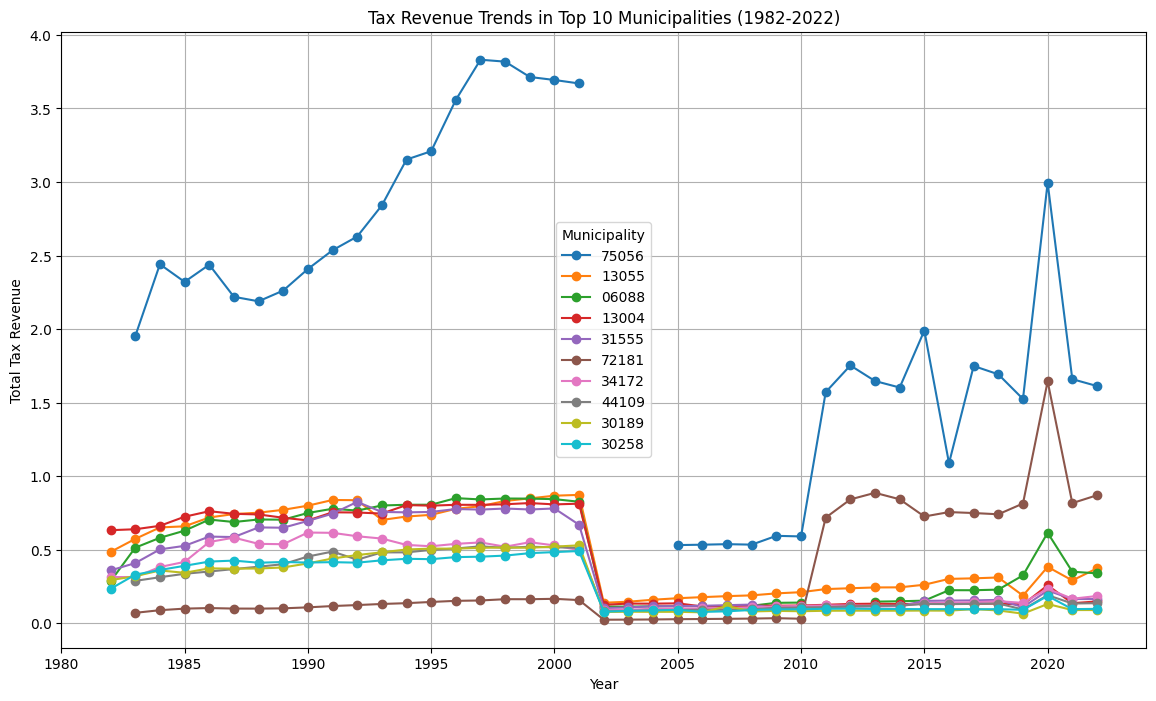

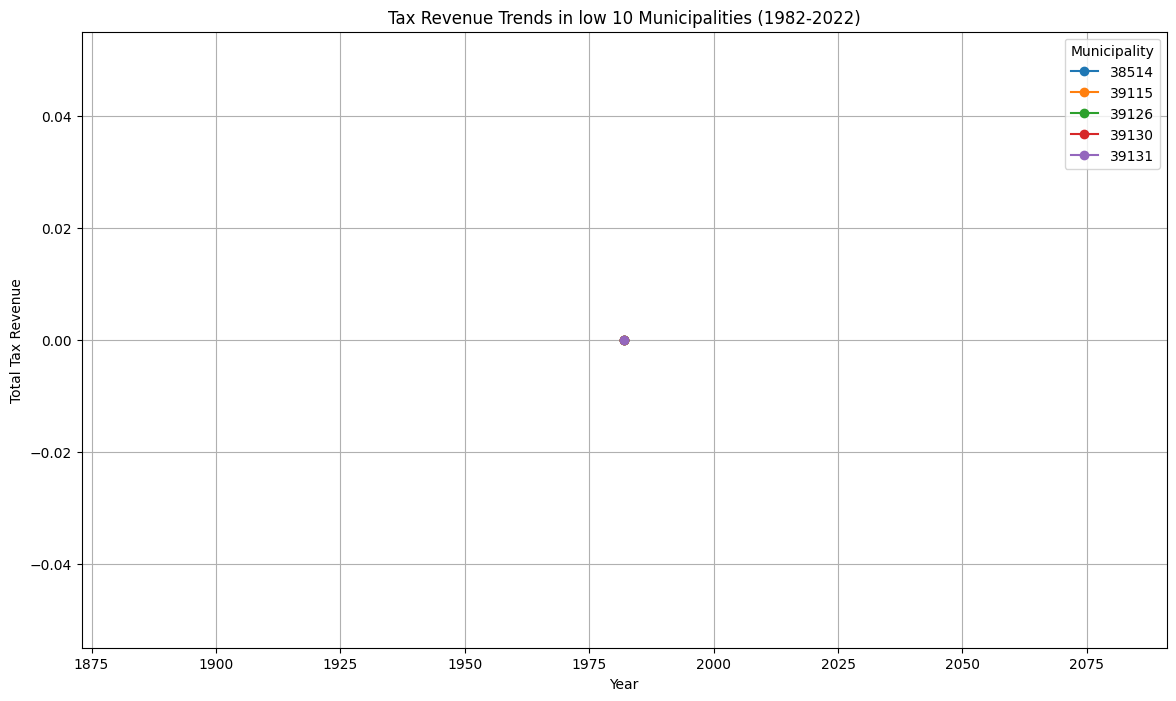

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)
temp =pd.DataFrame()
# Load your Dask DataFrame

revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
    # 'IFER TOTALE / COMMUNE',
    # 'Part de CVAE au profit de la commune'
]
pdf = pqdf[revenue_columns].compute()
pdf = pdf.reset_index(drop=True)
pdf[revenue_columns] = pdf[revenue_columns].fillna('0')
pdf[revenue_columns]  = pdf[revenue_columns].replace('.', '0')
pdf[revenue_columns]  = pdf[revenue_columns].replace(',', '0')
temp =df
temp = temp.reset_index(drop=True)
temp[revenue_columns] = pdf[revenue_columns]
for col in revenue_columns:
    temp[col] = temp[col].astype(float)
temp[revenue_columns] = scaler.fit_transform(temp[revenue_columns])


temp['Total_Tax_Revenue'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             temp["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             temp['CFE - COMMUNE / PRODUIT REEL NET'])

# Compute the Dask DataFrame to get the top 10 municipalities
top_10_largest_municipalities = temp.groupby('code_insee')['Total_Tax_Revenue'].sum().nlargest(10).index
top_10_df = temp[temp['code_insee'].isin(top_10_largest_municipalities)]


# Pivot the table to get a multi-index DataFrame with Municipality and Year
pivot_df = top_10_df.pivot_table(index='ANNEE', columns='code_insee', values='Total_Tax_Revenue', aggfunc='sum')

pivot_df = pivot_df[top_10_largest_municipalities]
# Plot the data
pivot_df.plot(figsize=(14, 8), marker='o')
plt.title('Tax Revenue Trends in Top 10 Municipalities (1982-2022)')
plt.xlabel('Year')
plt.ylabel('Total Tax Revenue')
plt.legend(title='Municipality')
plt.grid(True)
plt.show()

# ----------------------------------SMALLEST -----------------------------------
top_10_smallest_municipalities = temp.groupby('code_insee')['Total_Tax_Revenue'].sum().nsmallest(5).index
top_10_df = temp[temp['code_insee'].isin(top_10_smallest_municipalities)]

# Pivot the table to get a multi-index DataFrame with Municipality and Year
pivot_df = top_10_df.pivot_table(index='ANNEE', columns='code_insee', values='Total_Tax_Revenue', aggfunc='sum')

pivot_df = pivot_df[top_10_smallest_municipalities]
# Plot the data
pivot_df.plot(figsize=(14, 8), marker='o')
plt.title('Tax Revenue Trends in low 10 Municipalities (1982-2022)')
plt.xlabel('Year')
plt.ylabel('Total Tax Revenue')
plt.legend(title='Municipality')
plt.grid(True)
plt.show()

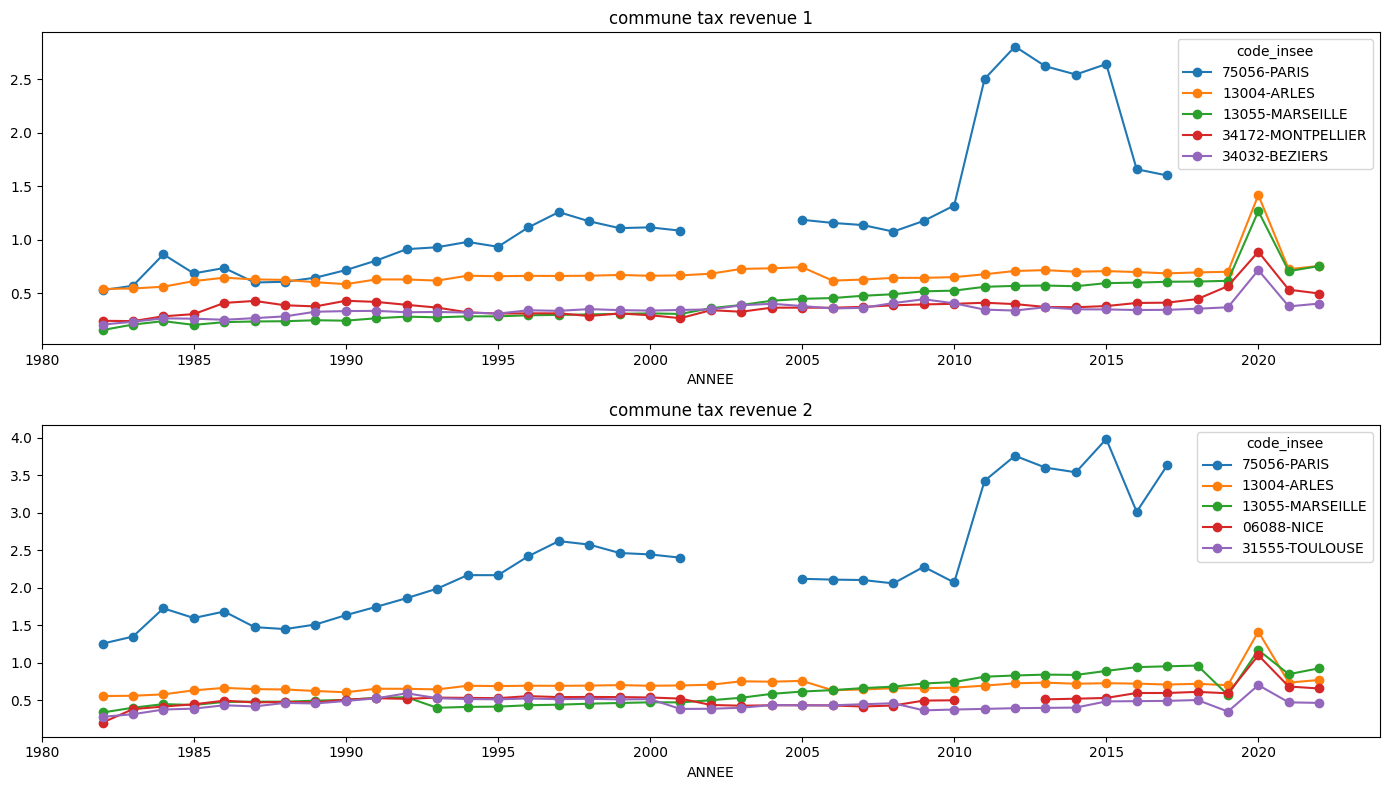

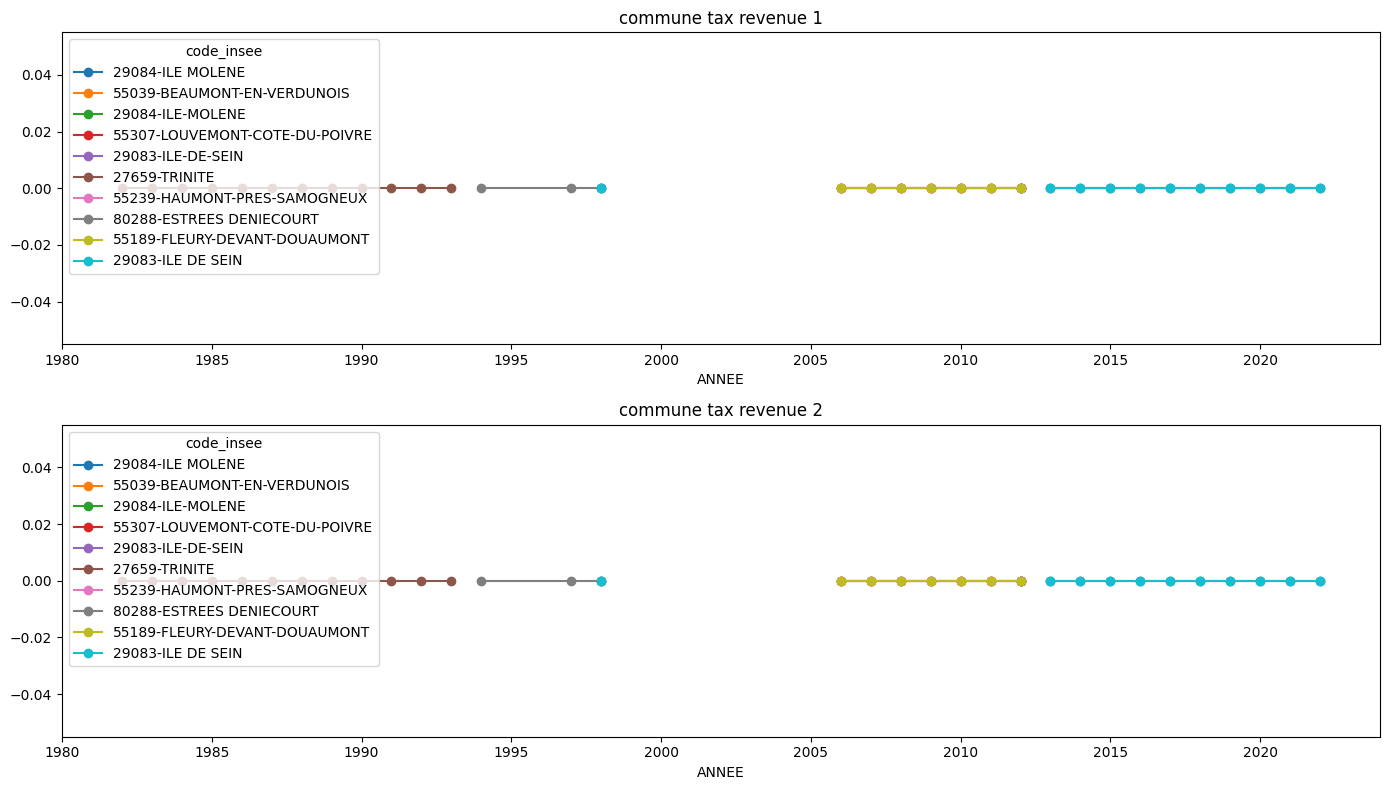

In [ ]:

temp = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')

# Load your Dask DataFrame

revenue_columns1 = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - COMMUNE / MONTANT REEL',
    'CFE - COMMUNE / MONTANT REEL',
]
revenue_columns2 = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
]


temp['Total_Tax_Revenue1'] = ( temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - COMMUNE / MONTANT REEL'] +
                             temp[ 'CFE - COMMUNE / MONTANT REEL'])


temp['Total_Tax_Revenue2'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             temp["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             temp['CFE - COMMUNE / PRODUIT REEL NET'])

# temp = temp.drop_duplicates(subset='code_insee')
# temp.reset_index(drop=True, inplace=True)
# print(temp.shape)

top_10_largest_municipalities = temp.groupby('code_insee')['Total_Tax_Revenue1'].sum().nlargest(5).index
top_10_df = temp[temp['code_insee'].isin(top_10_largest_municipalities)]
pivot_df = top_10_df.pivot_table(index='ANNEE', columns='code_insee', values='Total_Tax_Revenue1', aggfunc='sum')
pivot_df = pivot_df[top_10_largest_municipalities]


top_10_largest_municipalities2 = temp.groupby('code_insee')['Total_Tax_Revenue2'].sum().nlargest(5).index
top_10_df2 = temp[temp['code_insee'].isin(top_10_largest_municipalities2)]
pivot_df2 = top_10_df2.pivot_table(index='ANNEE', columns='code_insee', values='Total_Tax_Revenue2', aggfunc='sum')
pivot_df2 = pivot_df2[top_10_largest_municipalities2]


# Pie Chart for Revenue Distribution
fig, axes = plt.subplots(2,1, figsize=(14, 7))
pivot_df.plot(figsize=(14, 8), ax=axes[0], marker='o', title= 'commune tax revenue 1')
pivot_df2.plot(figsize=(14, 8), ax=axes[1], marker='o', title='commune tax revenue 2')
plt.tight_layout()
plt.show()
# ----------------------------------SMALLEST -----------------------------------



top_10_smallest_municipalities1 = temp.groupby('code_insee')['Total_Tax_Revenue1'].sum().nsmallest(10).index
top_10_df1 = temp[temp['code_insee'].isin(top_10_smallest_municipalities1)]
pivot_df1 = top_10_df1.pivot_table(index='ANNEE', columns='code_insee', values='Total_Tax_Revenue1', aggfunc='sum')
pivot_df1 = pivot_df1[top_10_smallest_municipalities1]

top_10_smallest_municipalities2 = temp.groupby('code_insee')['Total_Tax_Revenue2'].sum().nsmallest(10).index
top_10_df2 = temp[temp['code_insee'].isin(top_10_smallest_municipalities2)]
pivot_df2 = top_10_df2.pivot_table(index='ANNEE', columns='code_insee', values='Total_Tax_Revenue2', aggfunc='sum')
pivot_df2 = pivot_df2[top_10_smallest_municipalities2]

unique_smallest_municipalities = list(set(top_10_smallest_municipalities1))

fig, axes = plt.subplots(2, 1, figsize=(14, 7))

pivot_df1 = pivot_df1[unique_smallest_municipalities]
pivot_df1.plot(figsize=(14, 8), ax=axes[0], marker='o', title='commune tax revenue 1')
unique_smallest_municipalities = list(set(top_10_smallest_municipalities2))
pivot_df2 = pivot_df2[unique_smallest_municipalities]
pivot_df2.plot(figsize=(14, 8), ax=axes[1], marker='o', title='commune tax revenue 2')

plt.tight_layout()
plt.show()

In [ ]:
top_10_smallest_municipalities1

Index(['27659-TRINITE', '29083-ILE DE SEIN', '29083-ILE-DE-SEIN',
       '29084-ILE MOLENE', '29084-ILE-MOLENE', '55039-BEAUMONT-EN-VERDUNOIS',
       '55189-FLEURY-DEVANT-DOUAUMONT', '55239-HAUMONT-PRES-SAMOGNEUX',
       '55307-LOUVEMONT-COTE-DU-POIVRE', '80288-ESTREES DENIECOURT'],
      dtype='object', name='code_insee')

## revenue trend

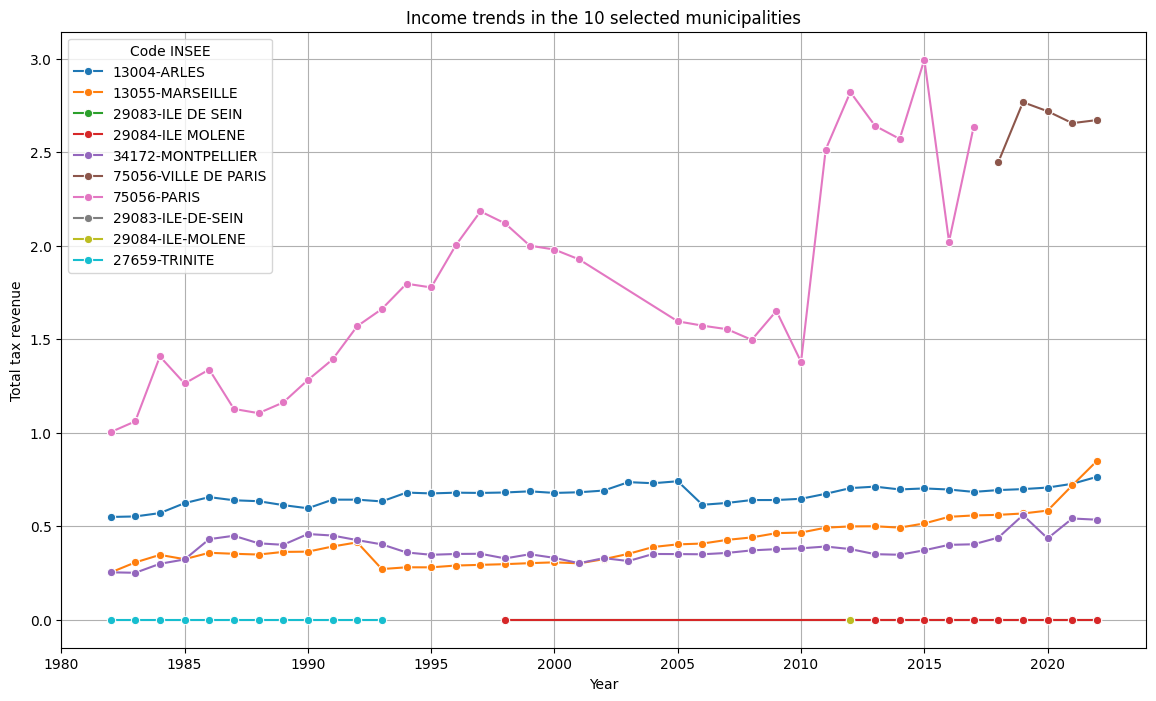

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')

# Load your Dask DataFrame

revenue_columns1 = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - COMMUNE / MONTANT REEL',
    'CFE - COMMUNE / MONTANT REEL',
]
revenue_columns2 = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
]


df['Total_Tax_Revenue1'] = ( df['FB - COMMUNE / MONTANT REEL'] +
                             df['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             df['FNB - COMMUNE / MONTANT REEL'] +
                             df['TH - COMMUNE / MONTANT REEL'] +
                             df[ 'CFE - COMMUNE / MONTANT REEL'])


# Calculate the total tax revenue
df['Total_Tax_Revenue'] = (df['FB - COMMUNE / MONTANT REEL'] +
                           df['TAFNB - COMMUNE / MONTANT REEL NET'] +
                           df['FNB - COMMUNE / MONTANT REEL'] +
                           df['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                           df['CFE - COMMUNE / PRODUIT REEL NET'])

# Identify the top 5 and bottom 5 municipalities
top_5_municipalities = df.groupby('code_insee')['Total_Tax_Revenue'].sum().nlargest(5).index
bottom_5_municipalities = df.groupby('code_insee')['Total_Tax_Revenue'].sum().nsmallest(5).index
selected_municipalities = top_5_municipalities.union(bottom_5_municipalities)

# Filter the data for the selected municipalities
filtered_df = df[df['code_insee'].isin(selected_municipalities)]

# Create the line chart
plt.figure(figsize=(14, 8))
sns.lineplot(data=filtered_df, x='ANNEE', y='Total_Tax_Revenue', hue='code_insee', marker='o')

# Add titles and labels
plt.title('Income trends in the 10 selected municipalities')
plt.xlabel('Year')
plt.ylabel('Total tax revenue')
plt.legend(title='Code INSEE')
plt.grid(True)
plt.show()

## Revenue Growth
Categorize municipalities based on their tax revenue growth over the past 5, 10, 15, and 20 years.

### based on COMMUNE

In [ ]:
# Function to calculate growth rate
def calculate_growth_rate(df_pivot, years):
    growth_rates = {}
    if df_pivot.index.dtype == 'category':
      df_pivot.index = df_pivot.index.as_ordered()
    current_year = df_pivot.index.max()
    print('cry',current_year)
    for municipality in df_pivot.columns:
        if current_year - years in df_pivot.index:
            start_value = df_pivot.loc[df_pivot.index == current_year - years, municipality].values[0]
            end_value = df_pivot.loc[df_pivot.index == current_year, municipality].values[0]
            growth_rate = ((end_value - start_value) / start_value) * 100
            print ('growth_rate',growth_rate)
            growth_rates[municipality] = growth_rate
    return growth_rates

# Categorize municipalities based on growth rates
def categorize_growth(growth_rate):
    if growth_rate > 50:
        return 'High Growth'
    elif 20 < growth_rate <= 50:
        return 'Moderate Growth'
    elif 0 < growth_rate <= 20:
        return 'Low Growth'
    else:
        return 'Negative Growth'



cry 2022
growth_rate nan
growth_rate 35.37087912087911
growth_rate -8.829138613575285
growth_rate 21.767805360124637
growth_rate 16.386442487323198
growth_rate -8.339228670231694
growth_rate 56.66839402647573
growth_rate 242.8389380530974
growth_rate 199.15378462268595
growth_rate 119.87422881779852
growth_rate 242.18773742592305
growth_rate 223.33464348797895
growth_rate inf
growth_rate 88.33314044630549
growth_rate 53.33736814802007
growth_rate 199.76325529971638
growth_rate -1.9980070384338886
growth_rate 124.53235277624228
growth_rate nan
growth_rate -1.2084938397376743
growth_rate -8.13148788927335
growth_rate -9.985160243337292
growth_rate -1.0731674725861986
growth_rate 348.94549356862865
growth_rate nan
growth_rate 2084.9039413745304
growth_rate 1.168949213647934
growth_rate inf
growth_rate nan
growth_rate 176.02580083881938
growth_rate nan
growth_rate 3.4850711137106147
growth_rate 165.69339619124779
growth_rate -1.3556605037224032
growth_rate 552.774762550882
growth_rate nan


<ipython-input-42-8277f63330a9>:12: RuntimeWarning: invalid value encountered in scalar divide
  growth_rate = ((end_value - start_value) / start_value) * 100
<ipython-input-42-8277f63330a9>:12: RuntimeWarning: divide by zero encountered in scalar divide
  growth_rate = ((end_value - start_value) / start_value) * 100



growth_rate 128.23850223447374
growth_rate nan
growth_rate inf
growth_rate 9.273794604577526
growth_rate 221.6897757178208
growth_rate 28.811533719055284
growth_rate inf
growth_rate 2.1830581547036423
growth_rate nan
growth_rate 4.84246306706758
growth_rate 154.66351829988193
growth_rate 275.6463882195293
growth_rate 223.21826109258782
growth_rate 188.0627949878429
growth_rate 39.129886241773036
growth_rate -1.2683851791113638
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate 203.87258282592717
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate 23.32207812025475
growth_rate 264.0959132365472
growth_rate nan
growth_rate nan
growth_rate nan
growth_rate 227.3104848153642
growth_rate nan
growth_rate 175.5984412692522
growth_rate nan
growth_rate nan
growth_rate nan
g

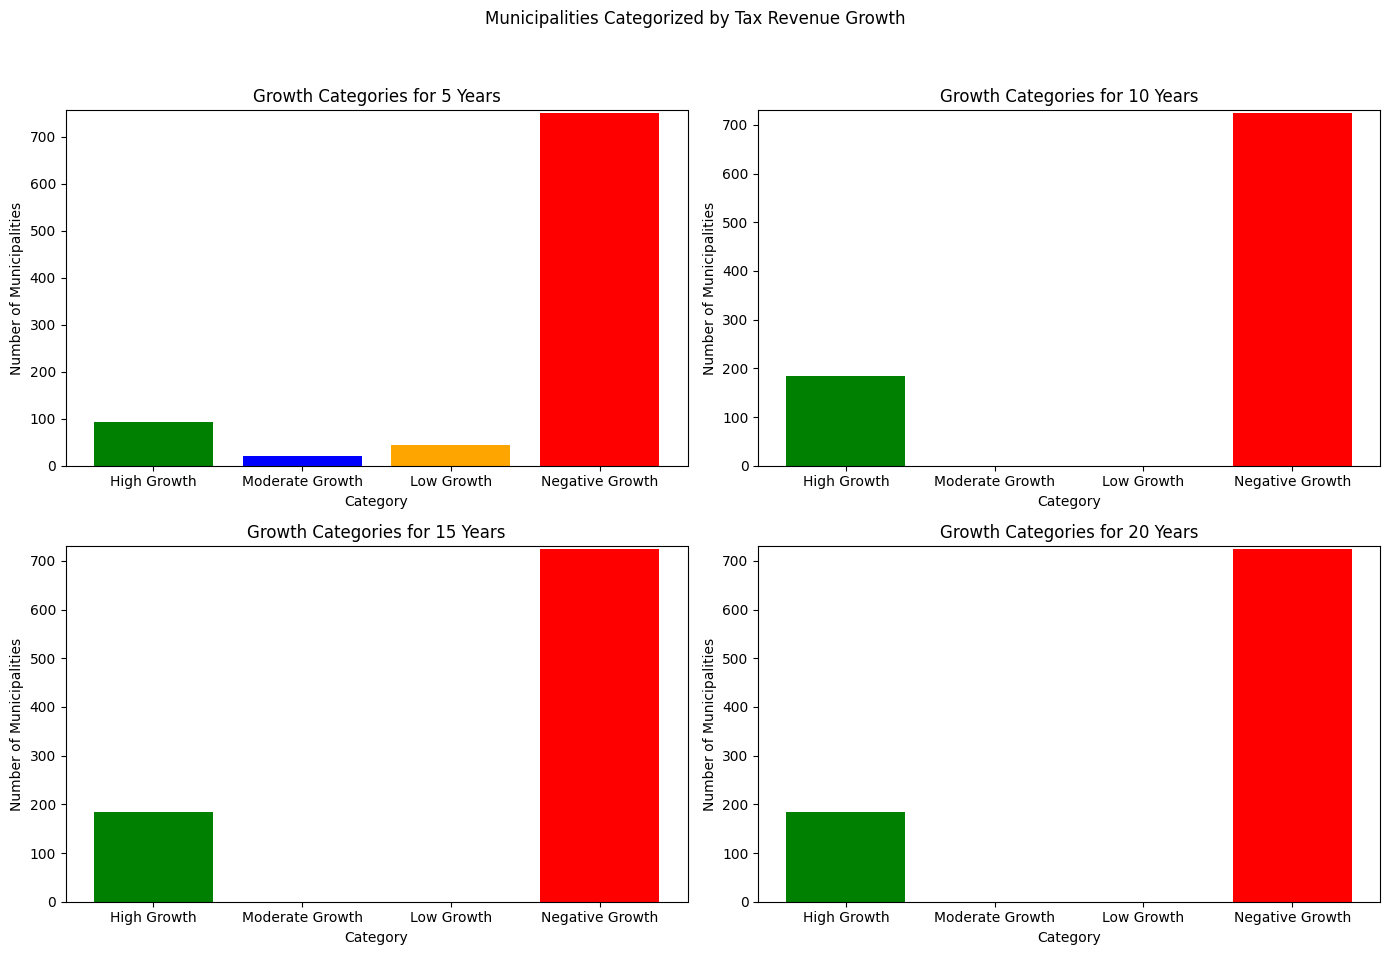

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import dask.dataframe as dd

# Function to calculate growth rate
def calculate_growth_rate(df_pivot, years):
    growth_rates = {}
    if df_pivot.index.dtype == 'category':
      df_pivot.index = df_pivot.index.as_ordered()
    current_year = df_pivot.index.max()
    print('cry',current_year)
    for municipality in df_pivot.columns:
        if current_year - years in df_pivot.index:
            start_value = df_pivot.loc[df_pivot.index == current_year - years, municipality].values[0]
            end_value = df_pivot.loc[df_pivot.index == current_year, municipality].values[0]
            growth_rate = ((end_value - start_value) / start_value) * 100
            print ('growth_rate',growth_rate)
            growth_rates[municipality] = growth_rate
    return growth_rates

# Categorize municipalities based on growth rates
def categorize_growth(growth_rate):
    if growth_rate > 50:
        return 'High Growth'
    elif 20 < growth_rate <= 50:
        return 'Moderate Growth'
    elif 0 < growth_rate <= 20:
        return 'Low Growth'
    else:
        return 'Negative Growth'

temp = pd.DataFrame()
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
# Fill NaN values with 0
revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    'CFE - COMMUNE / PRODUIT REEL NET',
]

pqdf[revenue_columns] = pqdf[revenue_columns].fillna('0')
temp[revenue_columns] = pqdf[revenue_columns].compute()
temp = temp.replace('.', '0', regex=True)


# Convert revenue columns to float
for col in revenue_columns:
    temp[col] = temp[col].astype(float)
# Convert columns to appropriate types
temp['COMMUNE'] = pqdf['COMMUNE']
temp['ANNEE'] = pqdf['ANNEE']


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
temp[revenue_columns] = scaler.fit_transform(temp[revenue_columns])
# Calculate total tax revenue for each municipality
temp['Total_Tax_Revenue'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             temp['CFE - COMMUNE / PRODUIT REEL NET'])

df_pivot = temp.pivot_table(index='ANNEE', columns='COMMUNE', values='Total_Tax_Revenue', aggfunc='sum')
# print(df_pivot.head())
# Calculate growth rates for 5, 10, 15, and 20 years

growth_5_years = calculate_growth_rate(df_pivot, 5)
growth_10_years = calculate_growth_rate(df_pivot, 10)
growth_15_years = calculate_growth_rate(df_pivot, 15)
growth_20_years = calculate_growth_rate(df_pivot, 20)

# Create a DataFrame to store growth rates
growth_df = pd.DataFrame({
    'Municipality': growth_5_years.keys(),
    'Growth_5_Years': growth_5_years.values(),
    'Growth_10_Years': growth_10_years.values(),
    'Growth_15_Years': growth_15_years.values(),
    'Growth_20_Years': growth_20_years.values()
})

growth_df['Category_5_Years'] = growth_df['Growth_5_Years'].apply(categorize_growth)
growth_df['Category_10_Years'] = growth_df['Growth_10_Years'].apply(categorize_growth)
growth_df['Category_15_Years'] = growth_df['Growth_15_Years'].apply(categorize_growth)
growth_df['Category_20_Years'] = growth_df['Growth_20_Years'].apply(categorize_growth)

# Plotting the categorized data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Municipalities Categorized by Tax Revenue Growth')

time_periods = ['5_Years', '10_Years', '15_Years', '20_Years']
categories = ['High Growth', 'Moderate Growth', 'Low Growth', 'Negative Growth']
colors = ['green', 'blue', 'orange', 'red']

for ax, period in zip(axes.flatten(), time_periods):
    category_counts = growth_df[f'Category_{period}'].value_counts().reindex(categories, fill_value=0)
    ax.bar(category_counts.index, category_counts.values, color=colors)
    ax.set_title(f'Growth Categories for {period.replace("_", " ")}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Municipalities')
    ax.set_ylim(0, max(category_counts.values) + 5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

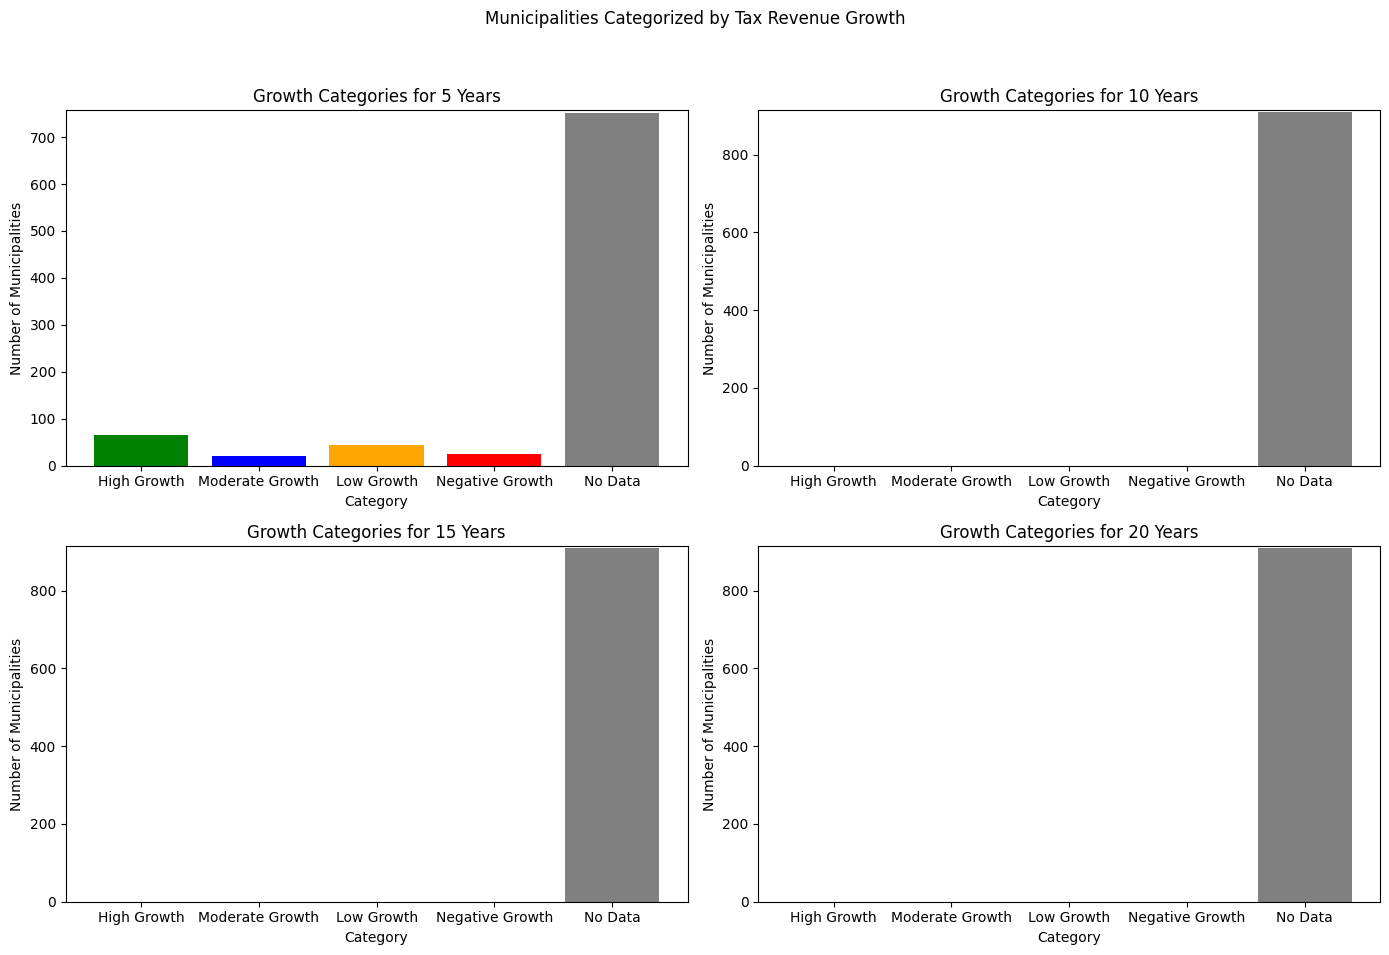

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import dask.dataframe as dd

# Function to calculate growth rate
def calculate_growth_rate(df_pivot, years):
    growth_rates = {}
    current_year = df_pivot.index.max()
    for municipality in df_pivot.columns:
        if current_year - years in df_pivot.index:
            start_value = df_pivot.loc[df_pivot.index == current_year - years, municipality].values[0]
            end_value = df_pivot.loc[df_pivot.index == current_year, municipality].values[0]
            if start_value != 0:
                growth_rate = ((end_value - start_value) / start_value) * 100
            else:
                growth_rate = np.nan

            growth_rates[municipality] = growth_rate
    return growth_rates

# Categorize municipalities based on growth rates
def categorize_growth(growth_rate):
    if pd.isna(growth_rate):
        return 'No Data'
    elif growth_rate > 50:
        return 'High Growth'
    elif 20 < growth_rate <= 50:
        return 'Moderate Growth'
    elif 0 < growth_rate <= 20:
        return 'Low Growth'
    else:
        return 'Negative Growth'

# Load and preprocess data
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')

# Fill NaN values with 0
revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    'CFE - COMMUNE / PRODUIT REEL NET',
]
pqdf[revenue_columns] = pqdf[revenue_columns].fillna('0')
pqdf[revenue_columns]  = pqdf[revenue_columns].replace('.', '0', regex=True)

# Convert revenue columns to float
for col in revenue_columns:
    pqdf[col] = pqdf[col].astype(float)

# Calculate total tax revenue for each municipality
pqdf['Total_Tax_Revenue'] = (pqdf['FB - COMMUNE / MONTANT REEL'] +
                             pqdf['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             pqdf['FNB - COMMUNE / MONTANT REEL'] +
                             pqdf['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             pqdf['CFE - COMMUNE / PRODUIT REEL NET'])

# Convert to DataFrame
temp = pqdf[['ANNEE', 'Total_Tax_Revenue', 'COMMUNE']].compute()

# Pivot the table to get a multi-index DataFrame with Municipality and Year
df_pivot = temp.pivot_table(index='ANNEE', columns='COMMUNE', values='Total_Tax_Revenue', aggfunc='sum')

# Calculate growth rates for 5, 10, 15, and 20 years
growth_5_years = calculate_growth_rate(df_pivot, 5)
growth_10_years = calculate_growth_rate(df_pivot, 10)
growth_15_years = calculate_growth_rate(df_pivot, 15)
growth_20_years = calculate_growth_rate(df_pivot, 20)

# Create a DataFrame to store growth rates
growth_df = pd.DataFrame({
    'Municipality': growth_5_years.keys(),
    'Growth_5_Years': growth_5_years.values(),
    'Growth_10_Years': growth_10_years.values(),
    'Growth_15_Years': growth_15_years.values(),
    'Growth_20_Years': growth_20_years.values()
})

growth_df['Category_5_Years'] = growth_df['Growth_5_Years'].apply(categorize_growth)
growth_df['Category_10_Years'] = growth_df['Growth_10_Years'].apply(categorize_growth)
growth_df['Category_15_Years'] = growth_df['Growth_15_Years'].apply(categorize_growth)
growth_df['Category_20_Years'] = growth_df['Growth_20_Years'].apply(categorize_growth)

# Plotting the categorized data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Municipalities Categorized by Tax Revenue Growth')

time_periods = ['5_Years', '10_Years', '15_Years', '20_Years']
categories = ['High Growth', 'Moderate Growth', 'Low Growth', 'Negative Growth', 'No Data']
colors = ['green', 'blue', 'orange', 'red', 'gray']

for ax, period in zip(axes.flatten(), time_periods):
    category_counts = growth_df[f'Category_{period}'].value_counts().reindex(categories, fill_value=0)
    ax.bar(category_counts.index, category_counts.values, color=[colors[categories.index(cat)] for cat in category_counts.index])
    ax.set_title(f'Growth Categories for {period.replace("_", " ")}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Municipalities')
    ax.set_ylim(0, max(category_counts.values) + 5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### based on code insee

<ipython-input-48-40c9bf90cdf5>:35: DtypeWarning: Columns (2,3,4,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')


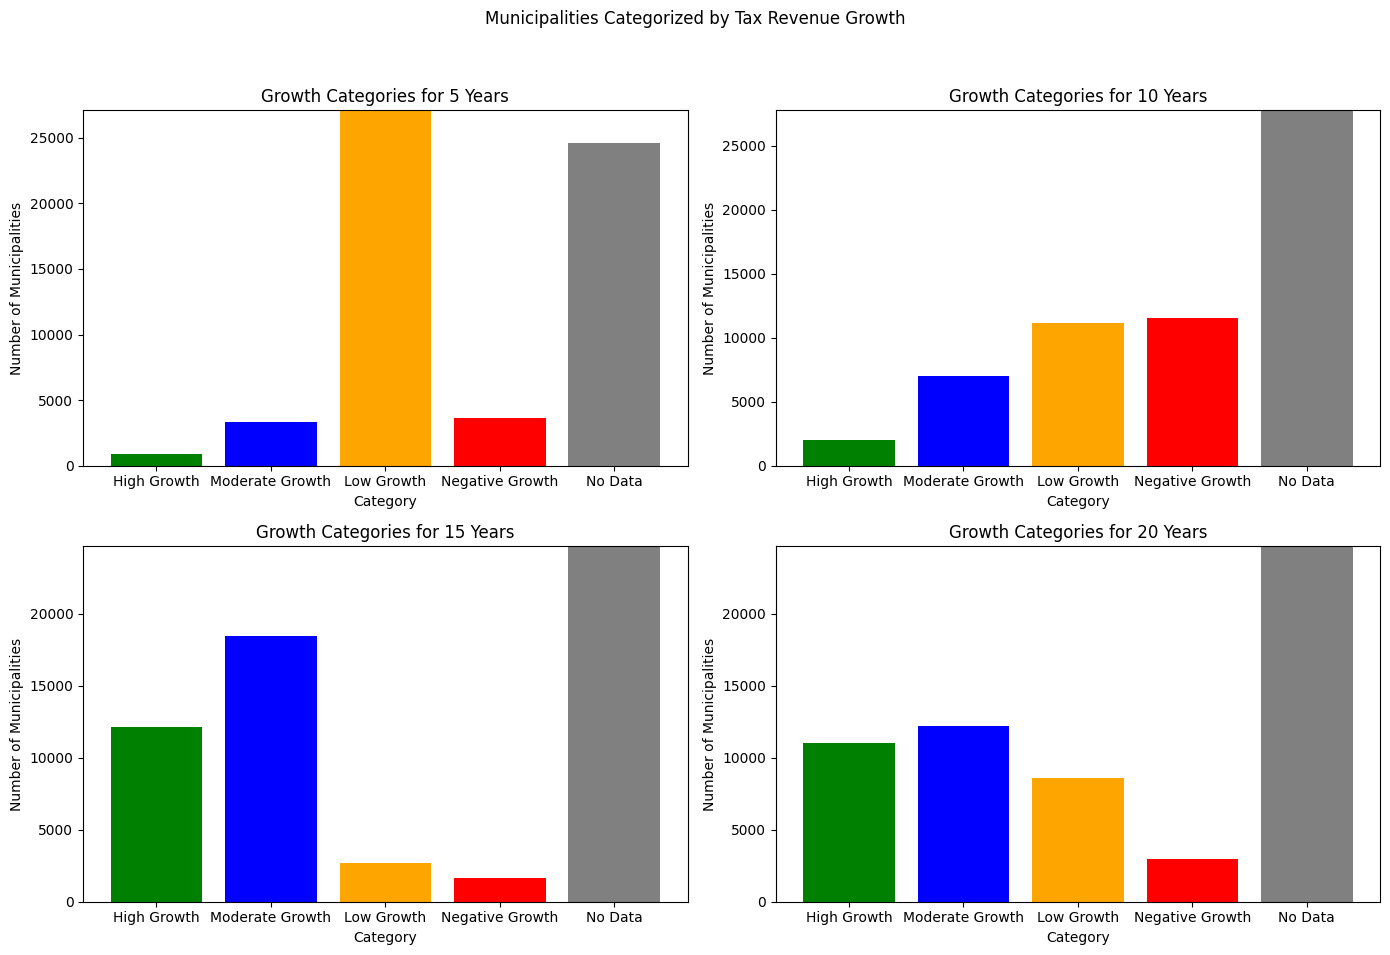

In [ ]:
def calculate_growth_rate(df_pivot, years):
    growth_rates = {}
    current_year = df_pivot.index.max()
    for municipality in df_pivot.columns:
        if current_year - years in df_pivot.index:
            start_value = df_pivot.loc[df_pivot.index == current_year - years, municipality].values[0]
            end_value = df_pivot.loc[df_pivot.index == current_year, municipality].values[0]
            if start_value != 0:
                growth_rate = ((end_value - start_value) / start_value) * 100
            else:
                growth_rate = np.nan

            growth_rates[municipality] = growth_rate
    return growth_rates

# Categorize municipalities based on growth rates
def categorize_growth(growth_rate):
    if pd.isna(growth_rate):
        return 'No Data'
    elif growth_rate > 50:
        return 'High Growth'
    elif 20 < growth_rate <= 50:
        return 'Moderate Growth'
    elif 0 < growth_rate <= 20:
        return 'Low Growth'
    else:
        return 'Negative Growth'

# -------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)
temp =pd.DataFrame()
# Load your Dask DataFrame

revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
    # 'IFER TOTALE / COMMUNE',
    # 'Part de CVAE au profit de la commune'
]
pdf = pqdf[revenue_columns].compute()
pdf = pdf.reset_index(drop=True)
pdf[revenue_columns] = pdf[revenue_columns].fillna('0')
pdf[revenue_columns]  = pdf[revenue_columns].replace('.', '0')
pdf[revenue_columns]  = pdf[revenue_columns].replace(',', '0')
temp =df
temp = temp.reset_index(drop=True)
temp[revenue_columns] = pdf[revenue_columns]
for col in revenue_columns:
    temp[col] = temp[col].astype(float)
temp[revenue_columns] = scaler.fit_transform(temp[revenue_columns])


temp['Total_Tax_Revenue'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             temp["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             temp['CFE - COMMUNE / PRODUIT REEL NET'])

# ===================================================================================================================
# Pivot the table to get a multi-index DataFrame with Municipality and Year
df_pivot = temp.pivot_table(index='ANNEE', columns='code_insee', values='Total_Tax_Revenue', aggfunc='sum')

# Calculate growth rates for 5, 10, 15, and 20 years
growth_5_years = calculate_growth_rate(df_pivot, 5)
growth_10_years = calculate_growth_rate(df_pivot, 10)
growth_15_years = calculate_growth_rate(df_pivot, 15)
growth_20_years = calculate_growth_rate(df_pivot, 20)

# Create a DataFrame to store growth rates
growth_df = pd.DataFrame({
    'Municipality': growth_5_years.keys(),
    'Growth_5_Years': growth_5_years.values(),
    'Growth_10_Years': growth_10_years.values(),
    'Growth_15_Years': growth_15_years.values(),
    'Growth_20_Years': growth_20_years.values()
})

growth_df['Category_5_Years'] = growth_df['Growth_5_Years'].apply(categorize_growth)
growth_df['Category_10_Years'] = growth_df['Growth_10_Years'].apply(categorize_growth)
growth_df['Category_15_Years'] = growth_df['Growth_15_Years'].apply(categorize_growth)
growth_df['Category_20_Years'] = growth_df['Growth_20_Years'].apply(categorize_growth)

# Plotting the categorized data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Municipalities Categorized by Tax Revenue Growth')

time_periods = ['5_Years', '10_Years', '15_Years', '20_Years']
categories = ['High Growth', 'Moderate Growth', 'Low Growth', 'Negative Growth', 'No Data']
colors = ['green', 'blue', 'orange', 'red', 'gray']

for ax, period in zip(axes.flatten(), time_periods):
    category_counts = growth_df[f'Category_{period}'].value_counts().reindex(categories, fill_value=0)
    ax.bar(category_counts.index, category_counts.values, color=[colors[categories.index(cat)] for cat in category_counts.index])
    ax.set_title(f'Growth Categories for {period.replace("_", " ")}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Municipalities')
    ax.set_ylim(0, max(category_counts.values) + 5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### noramlization , conversion rate

<ipython-input-59-96d28492a5ec>:32: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')


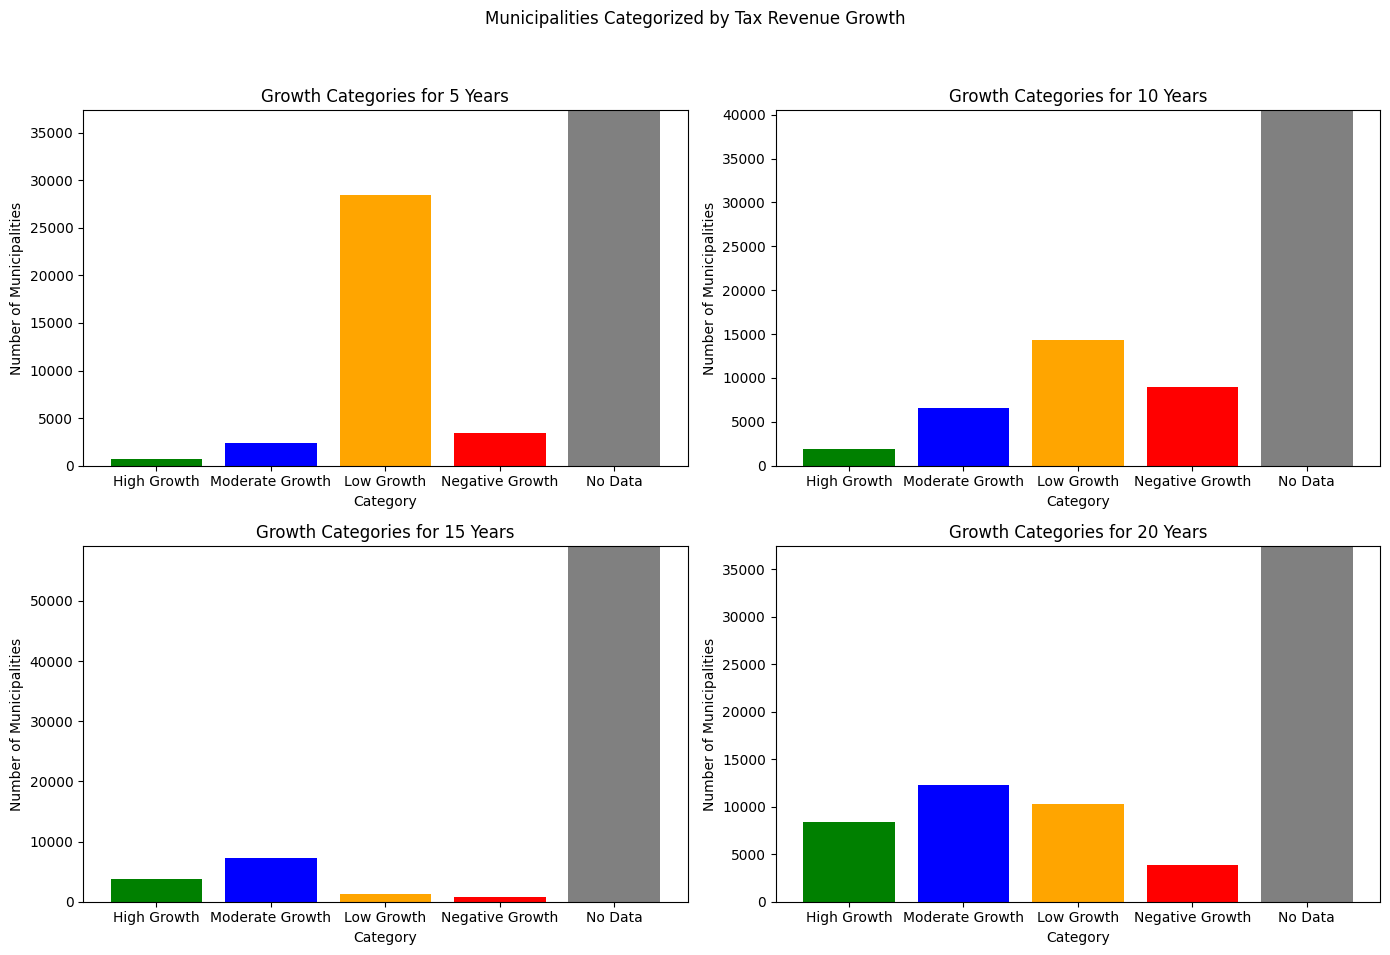

In [ ]:
import numpy as np
def calculate_growth_rate(df_pivot, years):
    growth_rates = {}
    current_year = df_pivot.index.max()
    for municipality in df_pivot.columns:
        if current_year - years in df_pivot.index:
            start_value = df_pivot.loc[df_pivot.index == current_year - years, municipality].values[0]
            end_value = df_pivot.loc[df_pivot.index == current_year, municipality].values[0]
            if start_value != 0:
                growth_rate = ((end_value - start_value) / start_value) * 100
            else:
                growth_rate = np.nan

            growth_rates[municipality] = growth_rate
    return growth_rates

# Categorize municipalities based on growth rates
def categorize_growth(growth_rate):
    if pd.isna(growth_rate):
        return 'No Data'
    elif growth_rate > 50:
        return 'High Growth'
    elif 20 < growth_rate <= 50:
        return 'Moderate Growth'
    elif 0 < growth_rate <= 20:
        return 'Low Growth'
    else:
        return 'Negative Growth'

# -------------------------------------------------------------------------------------------------------------------

df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')

revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
    # 'IFER TOTALE / COMMUNE',
    # 'Part de CVAE au profit de la commune'
]


df['Total_Tax_Revenue'] = (df['FB - COMMUNE / MONTANT REEL'] +
                             df['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             df['FNB - COMMUNE / MONTANT REEL'] +
                             df['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             df["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             df['CFE - COMMUNE / PRODUIT REEL NET'])

# ===================================================================================================================
# Pivot the table to get a multi-index DataFrame with Municipality and Year
df_pivot = df.pivot_table(index='ANNEE', columns='code_insee', values='Total_Tax_Revenue', aggfunc='sum')

# Calculate growth rates for 5, 10, 15, and 20 years
growth_5_years = calculate_growth_rate(df_pivot, 5)
growth_10_years = calculate_growth_rate(df_pivot, 10)
growth_15_years = calculate_growth_rate(df_pivot, 15)
growth_20_years = calculate_growth_rate(df_pivot, 20)

# Create a DataFrame to store growth rates
growth_df = pd.DataFrame({
    'Municipality': growth_5_years.keys(),
    'Growth_5_Years': growth_5_years.values(),
    'Growth_10_Years': growth_10_years.values(),
    'Growth_15_Years': growth_15_years.values(),
    'Growth_20_Years': growth_20_years.values()
})

growth_df['Category_5_Years'] = growth_df['Growth_5_Years'].apply(categorize_growth)
growth_df['Category_10_Years'] = growth_df['Growth_10_Years'].apply(categorize_growth)
growth_df['Category_15_Years'] = growth_df['Growth_15_Years'].apply(categorize_growth)
growth_df['Category_20_Years'] = growth_df['Growth_20_Years'].apply(categorize_growth)

# Plotting the categorized data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Municipalities Categorized by Tax Revenue Growth')

time_periods = ['5_Years', '10_Years', '15_Years', '20_Years']
categories = ['High Growth', 'Moderate Growth', 'Low Growth', 'Negative Growth', 'No Data']
colors = ['green', 'blue', 'orange', 'red', 'gray']

for ax, period in zip(axes.flatten(), time_periods):
    category_counts = growth_df[f'Category_{period}'].value_counts().reindex(categories, fill_value=0)
    ax.bar(category_counts.index, category_counts.values, color=[colors[categories.index(cat)] for cat in category_counts.index])
    ax.set_title(f'Growth Categories for {period.replace("_", " ")}')
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Municipalities')
    ax.set_ylim(0, max(category_counts.values) + 5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### APPROACH 2

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)
temp =pd.DataFrame()
# Load your Dask DataFrame

revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
    # 'IFER TOTALE / COMMUNE',
    # 'Part de CVAE au profit de la commune'
]
pdf = pqdf[revenue_columns].compute()
pdf = pdf.reset_index(drop=True)
pdf[revenue_columns] = pdf[revenue_columns].fillna('0')
pdf[revenue_columns]  = pdf[revenue_columns].replace('.', '0')
pdf[revenue_columns]  = pdf[revenue_columns].replace(',', '0')
temp =df
temp = temp.reset_index(drop=True)
temp[revenue_columns] = pdf[revenue_columns]
for col in revenue_columns:
    temp[col] = temp[col].astype(float)
temp[revenue_columns] = scaler.fit_transform(temp[revenue_columns])


temp['Total_Tax_Revenue'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             temp["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             temp['CFE - COMMUNE / PRODUIT REEL NET'])


<ipython-input-17-737a65e63df0>:8: DtypeWarning: Columns (2,3,4,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')


2022


In [ ]:
# Categorize municipalities based on their tax revenue growth over the past 5, 10, 15, and 20 years.
current_year = (temp['ANNEE']).max()
# Convert the 'year' column to datetime format
temp['ANNEE'] = pd.to_datetime(temp['ANNEE'])

# Group the data by city_id and sort by year
grouped_df = temp.groupby('code_insee').apply(lambda x: x.sort_values('ANNEE'))
grouped_df.drop(columns=['code_insee'], inplace=True)
# Calculate the tax revenue growth
grouped_df['5_year_growth'] = grouped_df.groupby('code_insee')['Total_Tax_Revenue'].pct_change(periods=5)
grouped_df['10_year_growth'] = grouped_df.groupby('code_insee')['Total_Tax_Revenue'].pct_change(periods=10)
grouped_df['15_year_growth'] = grouped_df.groupby('code_insee')['Total_Tax_Revenue'].pct_change(periods=15)
grouped_df['20_year_growth'] = grouped_df.groupby('code_insee')['Total_Tax_Revenue'].pct_change(periods=20)

# Categorize the cities
bins = [-1, 0, 0.2, 0.5, 1]
labels = ['Declining', 'Low Growth', 'Moderate Growth', 'High Growth']

grouped_df['5_year_category'] = pd.cut(grouped_df['5_year_growth'], bins=bins, labels=labels)
grouped_df['10_year_category'] = pd.cut(grouped_df['10_year_growth'], bins=bins, labels=labels)
grouped_df['15_year_category'] = pd.cut(grouped_df['15_year_growth'], bins=bins, labels=labels)
grouped_df['20_year_category'] = pd.cut(grouped_df['20_year_growth'], bins=bins, labels=labels)

# Reset the index and return the result
result = grouped_df.reset_index()

In [ ]:
import pandas as pd


# Convert the 'year' column to datetime format
df['ANNEE'] = pd.to_datetime(df['ANNEE'])

# Group the data by city_id and sort by year
grouped_df = df.groupby('code_insee').apply(lambda x: x.sort_values('ANNEE'))
grouped_df = grouped_df.reset_index()
# Calculate the tax revenue growth
current_year = df['ANNEE'].max()
grouped_df['5_year_growth'] = grouped_df.groupby('code_insee')['Total_Tax_Revenue'].pct_change(periods=4)
grouped_df['10_year_growth'] = grouped_df.groupby('code_insee')['Total_Tax_Revenue'].pct_change(periods=9)
grouped_df['15_year_growth'] = grouped_df.groupby('code_insee')['Total_Tax_Revenue'].pct_change(periods=14)
grouped_df['20_year_growth'] = grouped_df.groupby('code_insee')['Total_Tax_Revenue'].pct_change(periods=19)

# Filter out cities with insufficient data
min_years = 5
mask = (grouped_df.groupby('code_insee')['ANNEE'].count() >= min_years)
filtered_df = grouped_df[mask]

# Categorize the cities
filtered_df['5_year_category'] = pd.cut(filtered_df['5_year_growth'], bins=[-1, 0.2, 0.5, 1], labels=['Declining', 'Low Growth', 'Moderate Growth', 'High Growth'])
filtered_df['10_year_category'] = pd.cut(filtered_df['10_year_growth'], bins=[-1, 0.2, 0.5, 1], labels=['Declining', 'Low Growth', 'Moderate Growth', 'High Growth'])
filtered_df['15_year_category'] = pd.cut(filtered_df['15_year_growth'], bins=[-1, 0.2, 0.5, 1], labels=['Declining', 'Low Growth', 'Moderate Growth', 'High Growth'])
filtered_df['20_year_category'] = pd.cut(filtered_df['20_year_growth'], bins=[-1, 0.2, 0.5, 1], labels=['Declining', 'Low Growth', 'Moderate Growth', 'High Growth'])

# Reset the index and return the result
result = filtered_df.reset_index()

ValueError: cannot insert code_insee, already exists

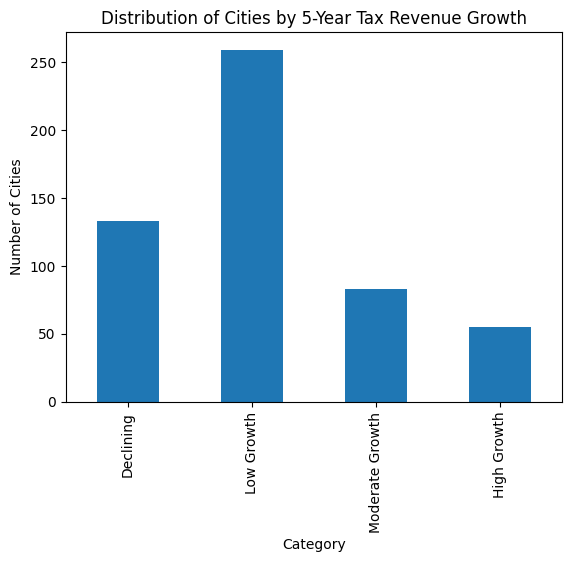

In [ ]:
import matplotlib.pyplot as plt
result.groupby(['5_year_category']).size().plot(kind='bar')
plt.title('Distribution of Municipalities by 5-Year Tax Revenue Growth')
plt.xlabel('Category')
plt.ylabel('Number of Municipalities')
plt.show()

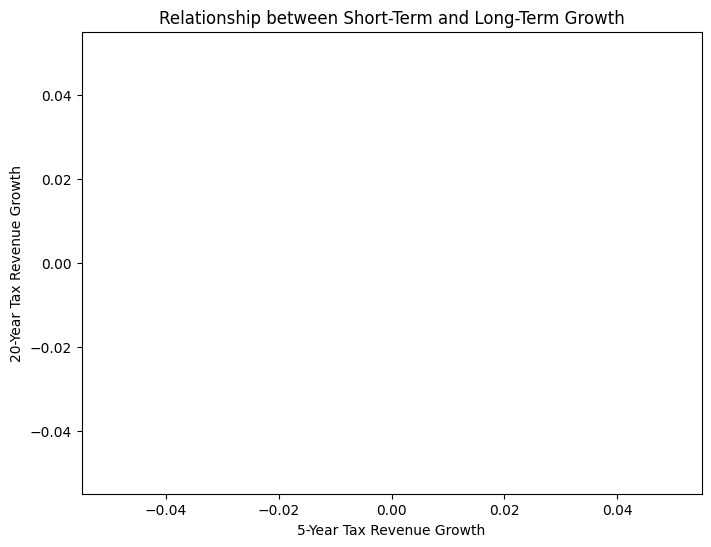

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(result['5_year_growth'], result['20_year_growth'])
plt.xlabel('5-Year Tax Revenue Growth')
plt.ylabel('20-Year Tax Revenue Growth')
plt.title('Relationship between Short-Term and Long-Term Growth')
plt.show()

In [ ]:
result.to_csv('growth_categories.csv')

In [ ]:
import pandas as pd
result = pd.read_csv('growth_categories.csv')

<ipython-input-6-a249bd6cb0e4>:2: DtypeWarning: Columns (1,3,8,10,22) have mixed types. Specify dtype option on import or set low_memory=False.
  result = pd.read_csv('growth_categories.csv')


KeyError: ('5_year_category', '10_year_category', '15_year_category', '20_year_category')

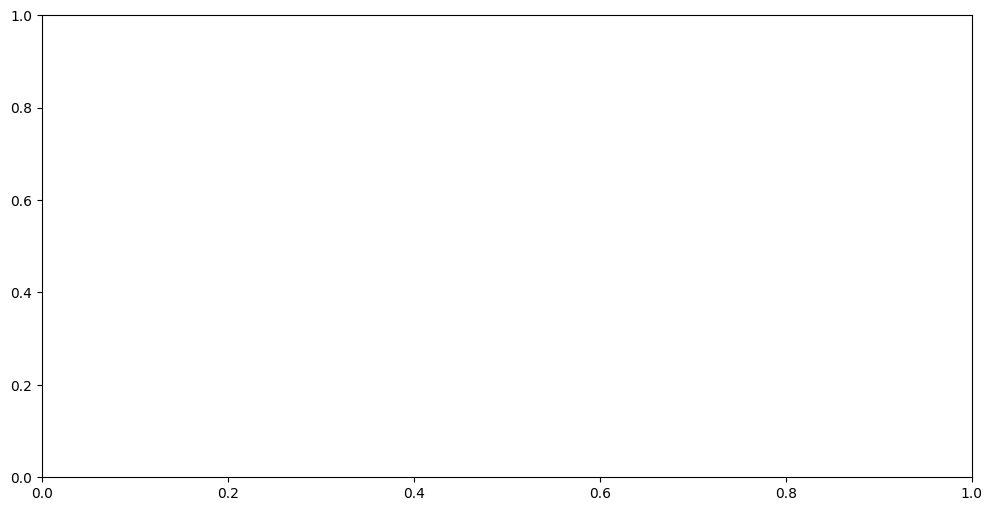

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a bar plot with the city categories on the x-axis and the count of cities in each category on the y-axis
fig, ax = plt.subplots(figsize=(12, 6))

# Get the unique categories across all time periods
all_categories = result[['5_year_category', '10_year_category', '15_year_category', '20_year_category']].unique()

# Create a bar for each category, with a different color
for i, category in enumerate(all_categories):
    counts = [result[result['5_year_category'] == category[0]].shape[0],
              result[result['10_year_category'] == category[1]].shape[0],
              result[result['15_year_category'] == category[2]].shape[0],
              result[result['20_year_category'] == category[3]].shape[0]]
    ax.bar(range(len(counts)), counts, width=0.8, label=', '.join(category), color=f'C{i}')

# Set the x-axis ticks and labels
ax.set_xticks(range(len(all_categories)))
ax.set_xticklabels(['5-Year', '10-Year', '15-Year', '20-Year'], rotation=45)

# Add labels and title
ax.set_xlabel('Time Period')
ax.set_ylabel('Number of Cities')
ax.set_title('City Categories by Tax Revenue Growth')
ax.legend()

plt.show()

In [ ]:
result['5_year_category'].value_counts()

5_year_category
Low Growth         259
Declining          133
Moderate Growth     83
High Growth         55
Name: count, dtype: int64

In [ ]:
result['10_year_category']


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1528917   NaN
1528918   NaN
1528919   NaN
1528920   NaN
1528921   NaN
Name: 10_year_category, Length: 1528922, dtype: float64

In [ ]:
result['10_year_category'].value_counts()


Series([], Name: count, dtype: int64)

In [ ]:
result['20_year_category'].value_counts()


Series([], Name: count, dtype: int64)

## Correlations
Analyze the correlation between population size and tax revenue in municipalities (the variable for number of inhabitants in the dataset is Z08).

In [ ]:
import pandas as pd
df=pd.DataFrame()
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')

from sklearn.preprocessing import StandardScaler
df['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'] = pqdf['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].compute().fillna(pqdf['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].mean())
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max normalization
normalized_data = scaler.fit_transform(df)
dff = pd.DataFrame(normalized_data, columns=df.columns)

dff['ANNEE']=pqdf['ANNEE']

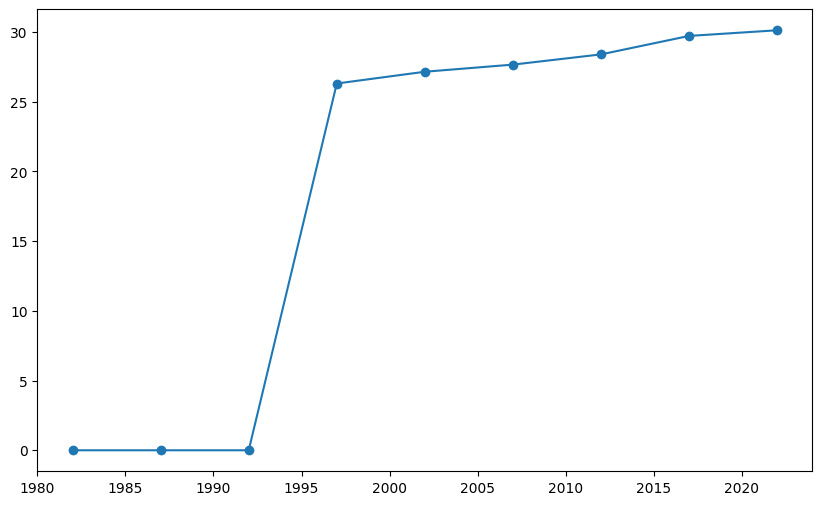

In [ ]:
import matplotlib.pyplot as plt
# pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
pqdf['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL']
yearly_data = dff.groupby('ANNEE')['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].sum().reset_index()
plt.figure(figsize=(10, 6))
yearly_data = yearly_data.iloc[::5]
plt.plot(yearly_data['ANNEE'], yearly_data['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'], marker='o')


### based on commune

Correlation between population size and tax revenue: 0.9660495794081811


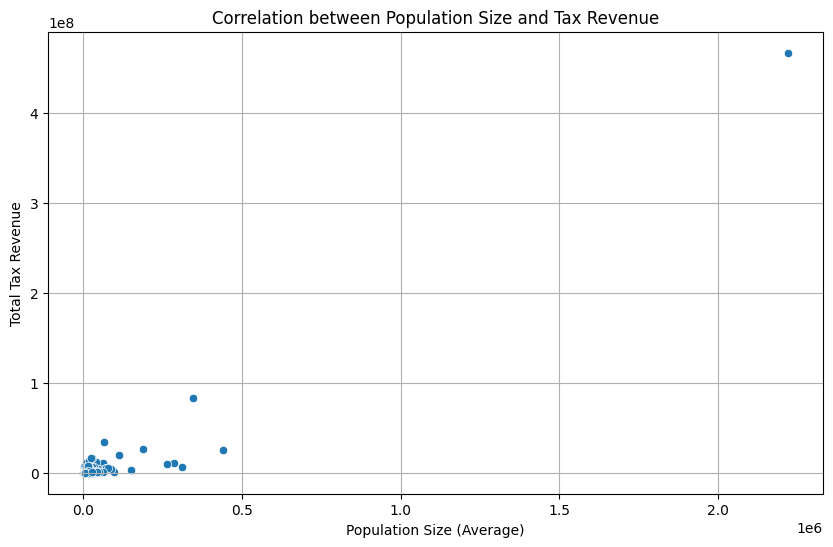

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

# Load your Dask DataFrame
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')

temp = pd.DataFrame()
# Fill NaN values with 0 for revenue columns
revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    'CFE - COMMUNE / PRODUIT REEL NET',
    'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'
]
pqdf[revenue_columns] = pqdf[revenue_columns].fillna('0')
temp[revenue_columns] = pqdf[revenue_columns].compute()

temp['COMMUNE'] = pqdf['COMMUNE']
temp['ANNEE'] = pqdf['ANNEE']
temp = temp.replace('.', '0', regex=True)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# Convert revenue columns to float
for col in revenue_columns:
    temp[col] = temp[col].astype(float)

# Calculate total tax revenue for each municipality
temp['Total_Tax_Revenue'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             temp['CFE - COMMUNE / PRODUIT REEL NET'])
temp = temp[temp['Total_Tax_Revenue'] != 0]

# Compute the Dask DataFrame to get the sum of tax revenue and average population size per municipality
agg_df = temp.groupby('COMMUNE').agg({'Total_Tax_Revenue': 'sum', 'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL': 'mean'})

# Calculate the correlation
correlation = agg_df['Total_Tax_Revenue'].corr(agg_df['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'])
print(f'Correlation between population size and tax revenue: {correlation}')

# Plotting the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL', y='Total_Tax_Revenue', data=agg_df)
plt.title('Correlation between Population Size and Tax Revenue')
plt.xlabel('Population Size (Average)')
plt.ylabel('Total Tax Revenue')
plt.grid(True)
plt.show()

In [ ]:
print(len(temp['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].unique()))
print(len(temp['COMMUNE'].unique()))
print( temp[temp['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].notnull() & temp['Total_Tax_Revenue'].notnull()].shape[0])
print( agg_df[agg_df['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].notnull() & agg_df['Total_Tax_Revenue'].notnull()].shape[0])


1560
186
1846
186


Correlation between population size and tax revenue: 0.0086192293520843


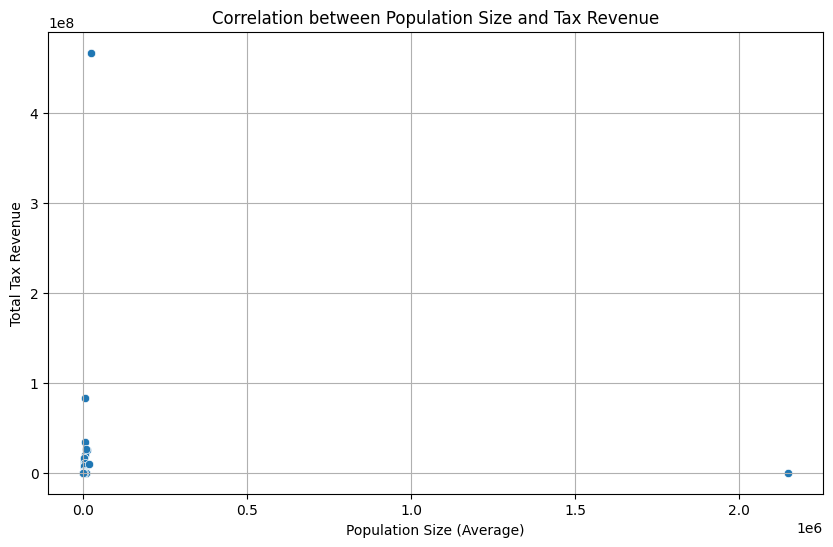

In [ ]:
correlation = agg_df['Total_Tax_Revenue'].corr(agg_df['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'])
print(f'Correlation between population size and tax revenue: {correlation}')

# Plotting the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL', y='Total_Tax_Revenue', data=agg_df)
plt.title('Correlation between Population Size and Tax Revenue')
plt.xlabel('Population Size (Average)')
plt.ylabel('Total Tax Revenue')
plt.grid(True)
plt.show()

### based on code insee without normalization

Correlation between population size and tax revenue: 0.6270019649649261


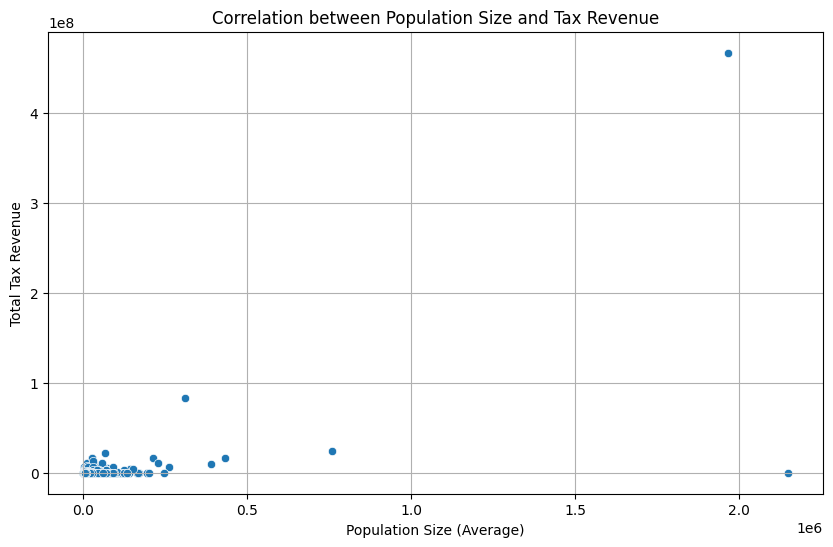

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Load your Dask DataFrame
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')

temp = pd.DataFrame()
# Fill NaN values with 0 for revenue columns
revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    'CFE - COMMUNE / PRODUIT REEL NET',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"
]
pqdf[revenue_columns] = pqdf[revenue_columns].fillna('0')
pqdf[revenue_columns]  = pqdf[revenue_columns].replace('.', '0', regex=True)

# Convert revenue columns to float
for col in revenue_columns:
    pqdf[col] = pqdf[col].astype(float)

# Calculate total tax revenue for each municipality


# Convert revenue columns to float
# for col in revenue_columns:
#     temp[col] = temp[col].astype(float)

# Calculate total tax revenue for each municipality
pqdf['Total_Tax_Revenue'] = (pqdf['FB - COMMUNE / MONTANT REEL'] +
                             pqdf['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             pqdf['FNB - COMMUNE / MONTANT REEL'] +
                             pqdf['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             pqdf['CFE - COMMUNE / PRODUIT REEL NET']+
                             pqdf['TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT'])
# temp = temp[temp['Total_Tax_Revenue'] != 0]
temp =df
temp[['Total_Tax_Revenue', 'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL']] = pqdf[[ 'Total_Tax_Revenue', 'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL' ]]
# Compute the Dask DataFrame to get the sum of tax revenue and average population size per municipality
agg_df = temp.groupby('code_insee').agg({'Total_Tax_Revenue': 'sum', 'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL': 'mean'})

# Calculate the correlation
correlation = agg_df['Total_Tax_Revenue'].corr(agg_df['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'])
print(f'Correlation between population size and tax revenue: {correlation}')

# Plotting the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL', y='Total_Tax_Revenue', data=agg_df)
plt.title('Correlation between Population Size and Tax Revenue')
plt.xlabel('Population Size (Average)')
plt.ylabel('Total Tax Revenue')
plt.grid(True)
plt.show()

### after normalization

<ipython-input-50-5e3578cd87bc>:6: DtypeWarning: Columns (2,3,4,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')


Correlation between population size and tax revenue: 0.5510293601975933


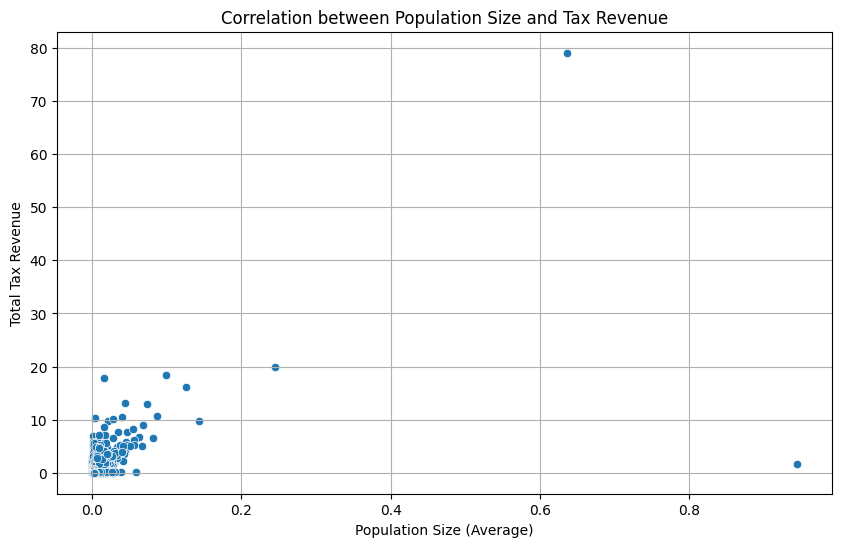

In [ ]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)
temp =pd.DataFrame()
# Load your Dask DataFrame

revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
    'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'
    # 'IFER TOTALE / COMMUNE',
    # 'Part de CVAE au profit de la commune'
]
pdf = pqdf[revenue_columns].compute()
pdf = pdf.reset_index(drop=True)
pdf[revenue_columns] = pdf[revenue_columns].fillna('0')
pdf[revenue_columns]  = pdf[revenue_columns].replace('.', '0')
pdf[revenue_columns]  = pdf[revenue_columns].replace(',', '0')
temp =df
temp = temp.reset_index(drop=True)
temp[revenue_columns] = pdf[revenue_columns]
for col in revenue_columns:
    temp[col] = temp[col].astype(float)
temp[revenue_columns] = scaler.fit_transform(temp[revenue_columns])


temp['Total_Tax_Revenue'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             temp["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             temp['CFE - COMMUNE / PRODUIT REEL NET'])


agg_df = temp.groupby('code_insee').agg({'Total_Tax_Revenue': 'sum', 'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL': 'mean'})

correlation = agg_df['Total_Tax_Revenue'].corr(agg_df['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'])
print(f'Correlation between population size and tax revenue: {correlation}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL', y='Total_Tax_Revenue', data=agg_df)
plt.title('Correlation between Population Size and Tax Revenue')
plt.xlabel('Population Size (Average)')
plt.ylabel('Total Tax Revenue')
plt.grid(True)
plt.show()

### conversion rate- new tax revenue columns

<ipython-input-53-5faaa60c0d58>:9: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')


Correlation between population size and tax revenue: 0.3594174738503212
Correlation between population size and tax revenue 2 : 0.4734640665679115


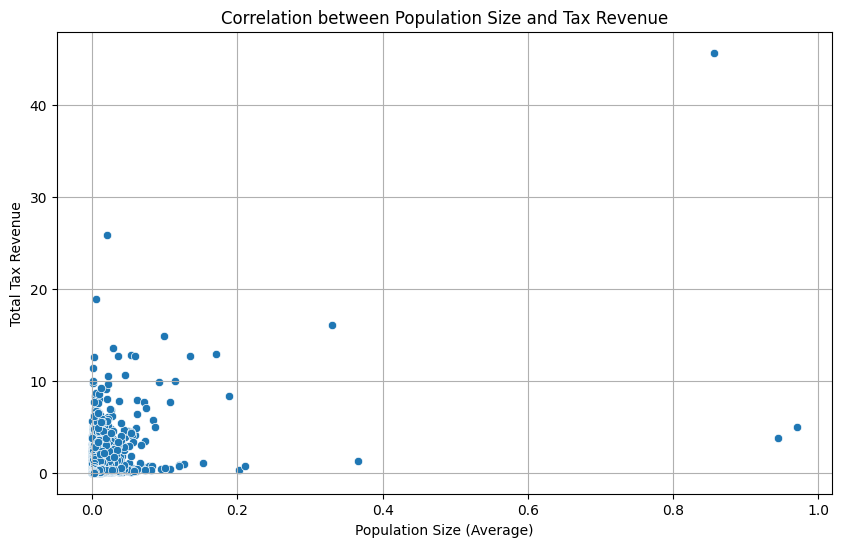

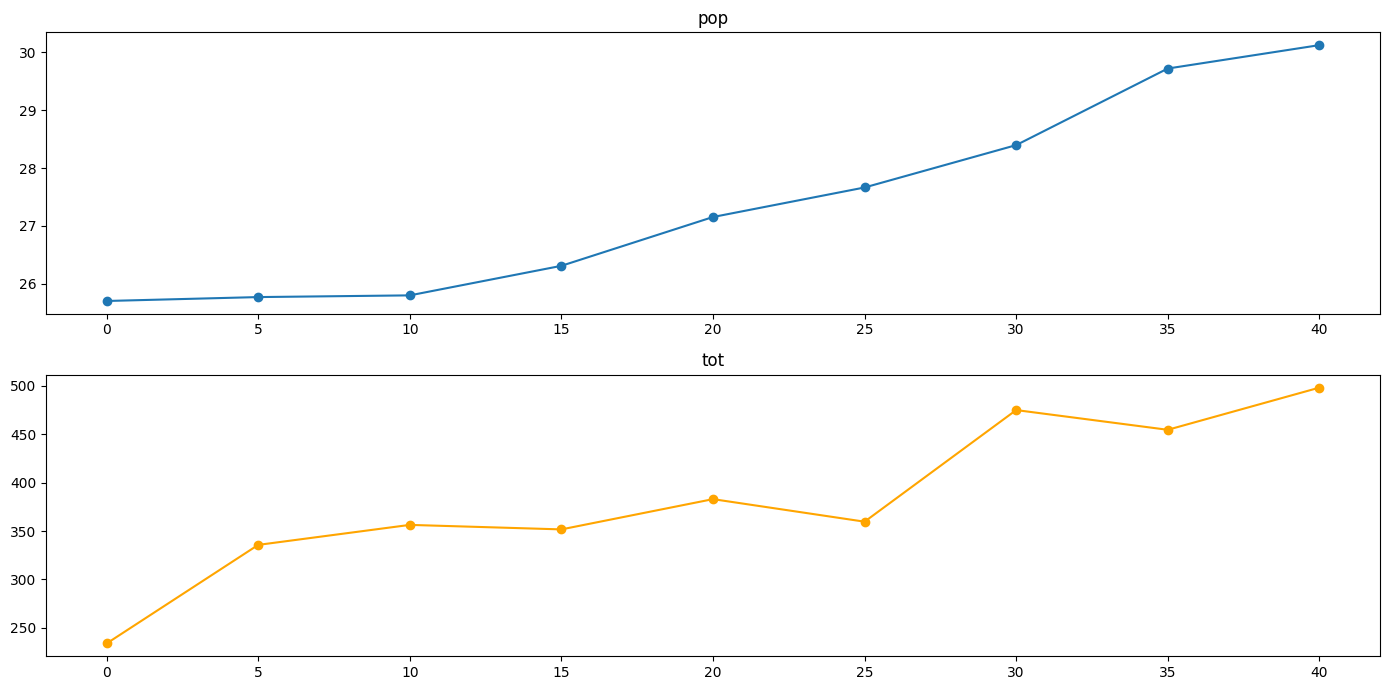

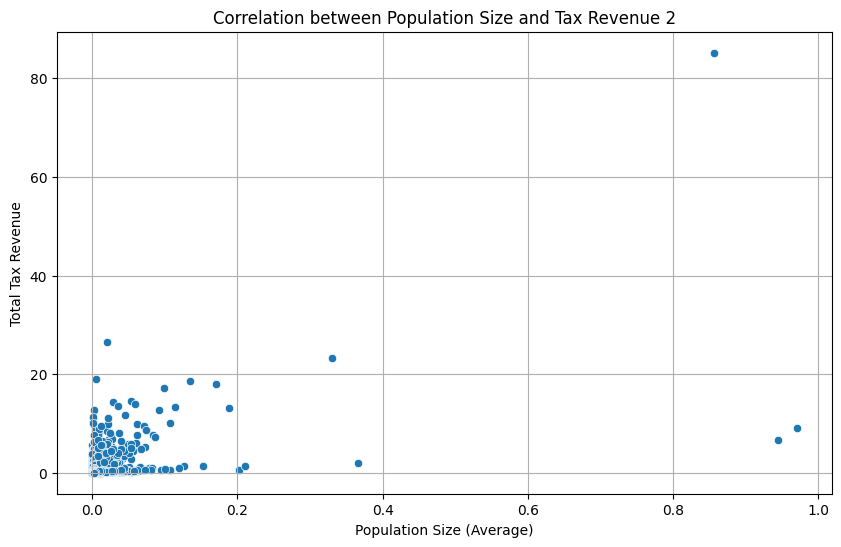

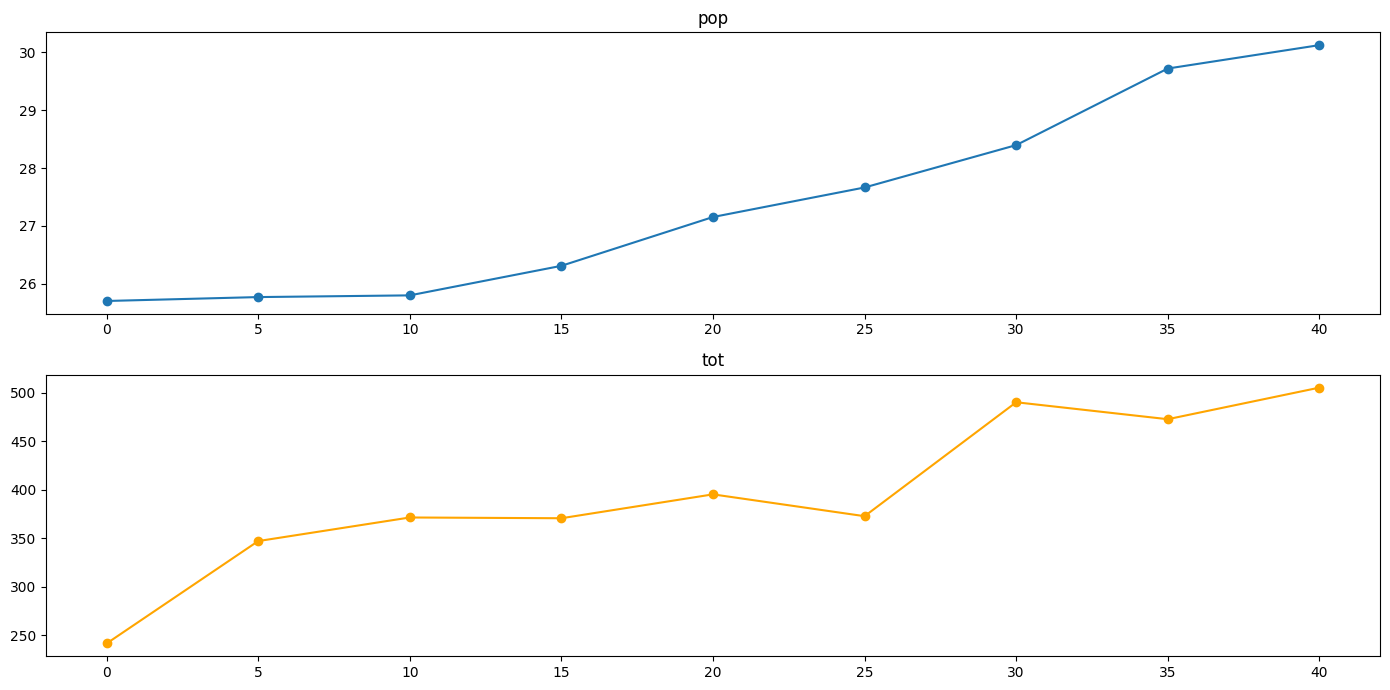

In [ ]:
import pandas as pd
df=pd.DataFrame()
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')

from sklearn.preprocessing import StandardScaler
df['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'] = pqdf['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].compute().fillna(pqdf['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].mean())
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Apply Min-Max normalization
normalized_data = scaler.fit_transform(df)
dff = pd.DataFrame(normalized_data, columns=df.columns)

dff['ANNEE']=pqdf['ANNEE']
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

scaler = MinMaxScaler()

df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')

revenue_columns1 = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - COMMUNE / MONTANT REEL',
    'CFE - COMMUNE / MONTANT REEL',
]
revenue_columns2 = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
]


df['Total_Tax_Revenue'] = ( df['FB - COMMUNE / MONTANT REEL'] +
                             df['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             df['FNB - COMMUNE / MONTANT REEL'] +
                             df['TH - COMMUNE / MONTANT REEL'] +
                             df[ 'CFE - COMMUNE / MONTANT REEL'])


df['Total_Tax_Revenue2'] = (df['FB - COMMUNE / MONTANT REEL'] +
                             df['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             df['FNB - COMMUNE / MONTANT REEL'] +
                             df['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             df["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             df['CFE - COMMUNE / PRODUIT REEL NET'])

agg_df = df.groupby('code_insee').agg({'Total_Tax_Revenue': 'sum', 'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL': 'mean'})
agg_df2 = df.groupby('code_insee').agg({'Total_Tax_Revenue2': 'sum', 'POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL': 'mean'})

correlation = agg_df['Total_Tax_Revenue'].corr(agg_df['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'])
correlation2 = agg_df2['Total_Tax_Revenue2'].corr(agg_df2['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'])
print(f'Correlation between population size and tax revenue: {correlation}')
print(f'Correlation between population size and tax revenue 2 : {correlation2}')

# =================================================================================================
plt.figure(figsize=(10, 6))
sns.scatterplot(x='POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL', y='Total_Tax_Revenue', data=agg_df)
plt.title('Correlation between Population Size and Tax Revenue')
plt.xlabel('Population Size (Average)')
plt.ylabel('Total Tax Revenue')
plt.grid(True)
plt.show()
yearly_data = []
fig, axes = plt.subplots(2, 1, figsize=(14, 7))
yearly_data = dff.groupby('ANNEE')['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].sum().reset_index()
yearly_data = yearly_data.iloc[::5]
yearly_data['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].plot( ax=axes[0], title='pop', marker='o')
yearly_data = []

yearly_data = df.groupby('ANNEE')['Total_Tax_Revenue'].sum().reset_index()
yearly_data = yearly_data.iloc[::5]
yearly_data['Total_Tax_Revenue'].plot( ax=axes[1], title='tot', marker='o', color='orange')

plt.tight_layout()
plt.show()

# # =================================================================================================

plt.figure(figsize=(10, 6))
sns.scatterplot(x='POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL', y='Total_Tax_Revenue2', data=agg_df2)
plt.title('Correlation between Population Size and Tax Revenue 2')
plt.xlabel('Population Size (Average)')
plt.ylabel('Total Tax Revenue')
plt.grid(True)
plt.show()


yearly_data = []
fig, axes = plt.subplots(2, 1, figsize=(14, 7))
yearly_data = dff.groupby('ANNEE')['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].sum().reset_index()
yearly_data = yearly_data.iloc[::5]
yearly_data['POPULATION TOTALE (MUNICIPALE ET COMPTEE A PART)  - Source saisies application FDL'].plot( ax=axes[0], title='pop', marker='o')
yearly_data = []

yearly_data = df.groupby('ANNEE')['Total_Tax_Revenue2'].sum().reset_index()
yearly_data = yearly_data.iloc[::5]
yearly_data['Total_Tax_Revenue2'].plot( ax=axes[1], title='tot', marker='o', color='orange')

plt.tight_layout()
plt.show()



## Significant Taxes
Identify the most significant tax for municipalities and for labor unions and examine whether the same tax is predominant across all municipalities and labor unions.

In [ ]:
union_columns = [column for column in pqdf.columns if ( ('MONTANT' in column) and ('SYNDICAT' in column or 'SYNDICATS' in column)) ]
union_columns

['FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL',
 'FB - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
 'FB - SYNDICATS ET ORG. ASSIMILES /  MONTANT LISSAGE',
 'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT',
 'TH - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
 'TH - SYNDICATS ET ORG. ASSIMILES /  MONTANT LISSAGE',
 'CFE - LISSAGE / SYNDICATS / MONTANT']

### based on commune


In [ ]:
import pandas as pd
import dask.dataframe as dd

# Load your Dask DataFrame
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
temp = pd.DataFrame()
# Fill NaN values with 0 for revenue columns
revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET'
]
labor_union = [
    'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT',
    'CFE - SYNDICATS ET ORG. ASSIMILES /  PRODUIT REEL NET',
    'TH - SYNDICATS ET ORG. ASSIMILES / NOMBRE LISSAGE',
    'CFE - EXONERATION DES ZONES DE REVITALISATION DES CENTRES-VILLES (art. 1464 F CGI) - (Exo 80) / BASES EXONEREES / SYNDICAT',
    'CFE - EXONERATION DES ZONES DE REVITALISATION DES COMMERCES EN MILIEU RURAL COMPENSABLE (art. 1464 G CGI) - (Exo 81) / BASES EXONEREES / SYNDICAT',
    'CFE - EXONERATION DES CREATIONS-EXTENSIONS (art. 1478 bis CGI) (Exo 82) / BASES EXONEREES / SYNDICAT',
    'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT',
    'TH - SYNDICATS ET ORG. ASSIMILES / NOMBRE LISSAGE',
    'CFE - EXONERATION DES ZONES DE REVITALISATION DES CENTRES-VILLES (art. 1464 F CGI) - (Exo 80) / BASES EXONEREES / SYNDICAT',
    'CFE - EXONERATION DES ZONES DE REVITALISATION DES COMMERCES EN MILIEU RURAL COMPENSABLE (art. 1464 G CGI) - (Exo 81) / BASES EXONEREES / SYNDICAT',
    'CFE - EXONERATION DES CREATIONS-EXTENSIONS (art. 1478 bis CGI) (Exo 82) / BASES EXONEREES / SYNDICAT'
]
pqdf[revenue_columns] = pqdf[revenue_columns].fillna('0')
pqdf[labor_union] = pqdf[labor_union].fillna('0')
pqdf = pqdf.replace('.', '0', regex=True)

# Convert revenue columns to float
for col in revenue_columns:
    pqdf[col] = pqdf[col].astype(float)
for col in labor_union:
    pqdf[col] = pqdf[col].astype(float)
# Calculate total tax revenue for labor unions
pqdf['TOTAL_SYNDICAT'] =   (
                            pqdf['TH - SYNDICATS ET ORG. ASSIMILES / NOMBRE LISSAGE'] +
                            pqdf['FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT'] +
                            pqdf['CFE - EXONERATION DES ZONES DE REVITALISATION DES CENTRES-VILLES (art. 1464 F CGI) - (Exo 80) / BASES EXONEREES / SYNDICAT'] +
                            pqdf['CFE - EXONERATION DES ZONES DE REVITALISATION DES COMMERCES EN MILIEU RURAL COMPENSABLE (art. 1464 G CGI) - (Exo 81) / BASES EXONEREES / SYNDICAT'] +
                            pqdf['CFE - EXONERATION DES CREATIONS-EXTENSIONS (art. 1478 bis CGI) (Exo 82) / BASES EXONEREES / SYNDICAT'])

pqdf['Total_Tax_Revenue'] = (pqdf['FB - COMMUNE / MONTANT REEL'] +
                             pqdf['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             pqdf['FNB - COMMUNE / MONTANT REEL'] +
                             pqdf['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             pqdf["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             pqdf['CFE - COMMUNE / PRODUIT REEL NET'])

temp[revenue_columns] = pqdf[revenue_columns].compute()
temp[labor_union] = pqdf[labor_union].compute()
temp['Total_Tax_Revenue'] = pqdf['Total_Tax_Revenue']
temp['TOTAL_SYNDICAT'] = pqdf['TOTAL_SYNDICAT']
temp['COMMUNE'] = pqdf['COMMUNE']


# Calculate total revenue for each tax for municipalities
municipality_revenues = temp.groupby('COMMUNE')[revenue_columns].sum()

# Calculate total revenue for each tax for labor unions (assuming labor unions are identified in a specific column, e.g., 'UNION')
# Replace 'UNION' with the actual column name identifying labor unions if different
union_revenues = temp.groupby('TOTAL_SYNDICAT')[labor_union].sum()

# Identify the most significant tax for municipalities
most_significant_tax_municipality = municipality_revenues.sum().idxmax()
most_significant_tax_municipality_revenue = municipality_revenues.sum().max()

# Identify the most significant tax for labor unions
most_significant_tax_union = union_revenues.sum().idxmax()
most_significant_tax_union_revenue = union_revenues.sum().max()

print(f'Most significant tax for municipalities: {most_significant_tax_municipality} with total revenue of {most_significant_tax_municipality_revenue}')
print(f'Most significant tax for labor unions: {most_significant_tax_union} with total revenue of {most_significant_tax_union_revenue}')

# Examine if the same tax is predominant across all municipalities and labor unions
is_same_tax_predominant = most_significant_tax_municipality == most_significant_tax_union
print(f'Is the same tax predominant across all municipalities and labor unions? {is_same_tax_predominant}')

Most significant tax for municipalities: TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES with total revenue of 1028894543.0
Most significant tax for labor unions: TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES with total revenue of 1028894543.0
Is the same tax predominant across all municipalities and labor unions? True


### based on code insee

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')
df.drop(columns=['Unnamed: 0', 'index'], inplace=True)

df['code_insee'] = df['code_insee'].astype(str)

df.to_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv', index=False)


<ipython-input-32-7a658fd1dd47>:1: DtypeWarning: Columns (2,3,4,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

scaler = MinMaxScaler()
df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')


municipality_revenue_columns2 = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - COMMUNE / MONTANT REEL',
    'CFE - COMMUNE / MONTANT REEL',

]
municipality_revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    'CFE - COMMUNE / PRODUIT REEL NET',
]

union_revenue_columns = [
    'FB - TAXE INCITATIVE ENLEVEMENT DES ORDURES MENAGERES / MONTANT REEL / SYNDICAT',
    'CFE - SYNDICATS ET ORG. ASSIMILES /  PRODUIT REEL NET',
    'TH - SYNDICATS ET ORG. ASSIMILES / NOMBRE LISSAGE',
    'FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL',
    'FB - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
    'TH - SYNDICATS ET ORG. ASSIMILES /  MONTANT REEL',
]


municipality_revenues = df.groupby('code_insee')[municipality_revenue_columns].sum()

municipality_revenues2 = df.groupby('code_insee')[municipality_revenue_columns2].sum()

union_revenues = df.groupby('code_insee')[union_revenue_columns].sum()


most_significant_tax_municipality2 = municipality_revenues2.sum().idxmax()
most_significant_tax_municipality_revenue2 = municipality_revenues2.sum().max()

most_significant_tax_municipality = municipality_revenues.sum().idxmax()
most_significant_tax_municipality_revenue = municipality_revenues.sum().max()

most_significant_tax_union = union_revenues.sum().idxmax()
most_significant_tax_union_revenue = union_revenues.sum().max()

print(f'Most significant tax for municipalities: {most_significant_tax_municipality} with total revenue of {most_significant_tax_municipality_revenue}')
print(f'Most significant tax for municipalities: {most_significant_tax_municipality2} with total revenue of {most_significant_tax_municipality_revenue2}')
print(f'Most significant tax for labor unions: {most_significant_tax_union} with total revenue of {most_significant_tax_union_revenue}')

# Examine if the same tax is predominant across all municipalities and labor unions
is_same_tax_predominant = most_significant_tax_municipality == most_significant_tax_union
print(f'Is the same tax predominant across all municipalities and labor unions? {is_same_tax_predominant}')

<ipython-input-3-cc1bb1f210b0>:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')


Most significant tax for municipalities: FNB - COMMUNE / MONTANT REEL with total revenue of 15312.568376029394
Most significant tax for municipalities: FNB - COMMUNE / MONTANT REEL with total revenue of 15312.568376029487
Most significant tax for labor unions: FNB - SYNDICATS ET ORG.ASSIMILES /  MONTANT REEL with total revenue of 1930.4936400871525
Is the same tax predominant across all municipalities and labor unions? False


<ipython-input-64-4faed90337c8>:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


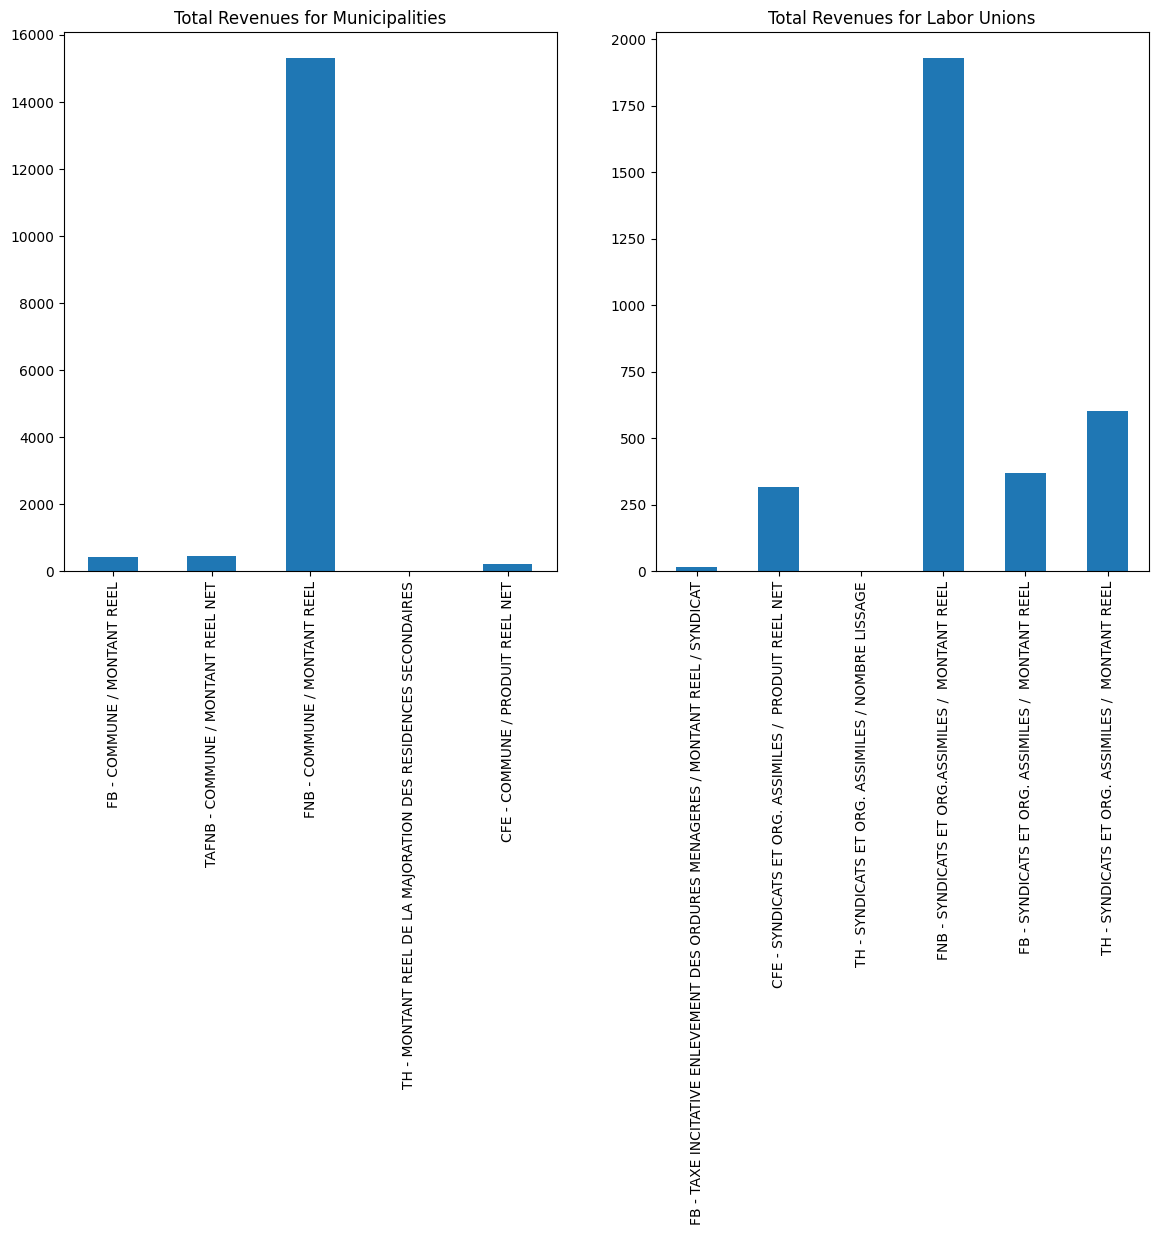

In [ ]:
# Bar Plot for Total Revenues
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
municipality_revenues.sum().plot(kind='bar', ax=axes[0], title='Total Revenues for Municipalities')
union_revenues.sum().plot(kind='bar', ax=axes[1], title='Total Revenues for Labor Unions')
plt.tight_layout()
plt.show()

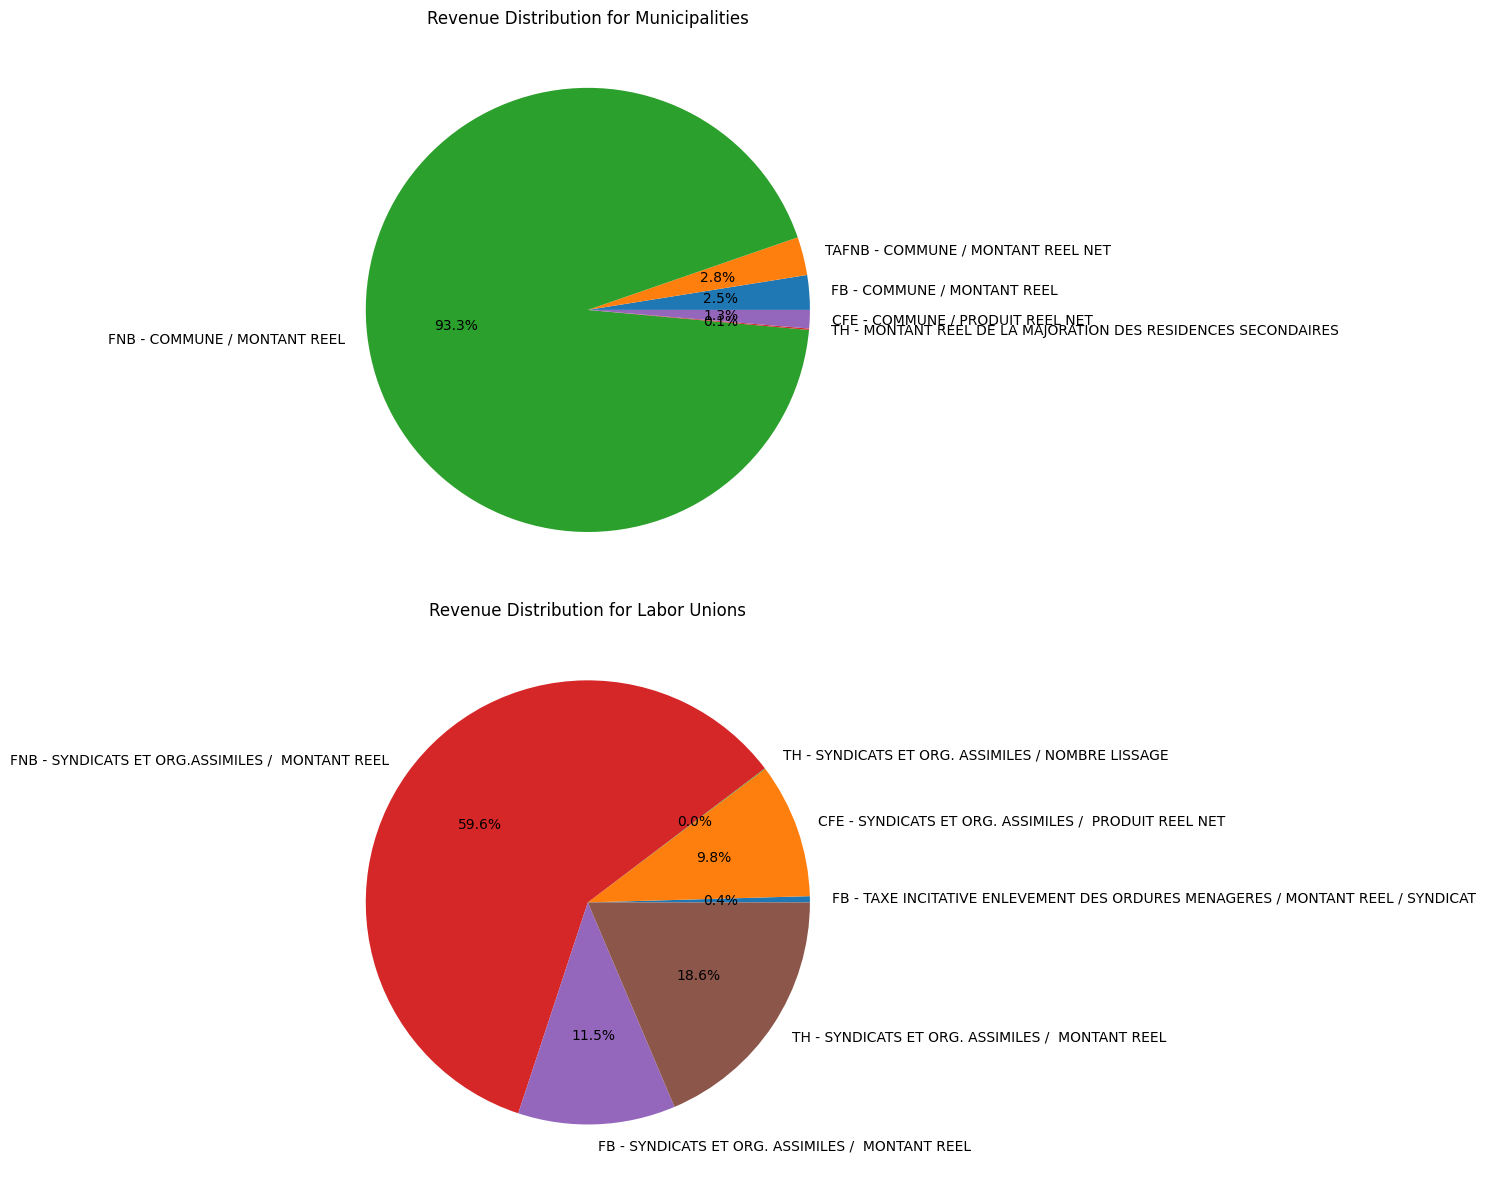

In [ ]:

# Pie Chart for Revenue Distribution
fig, axes = plt.subplots(2,1, figsize=(14,12))
municipality_revenues.sum().plot(kind='pie', ax=axes[0], title='Revenue Distribution for Municipalities', autopct='%1.1f%%')
union_revenues.sum().plot(kind='pie', ax=axes[1], title='Revenue Distribution for Labor Unions', autopct='%1.1f%%')
plt.tight_layout()
plt.show()


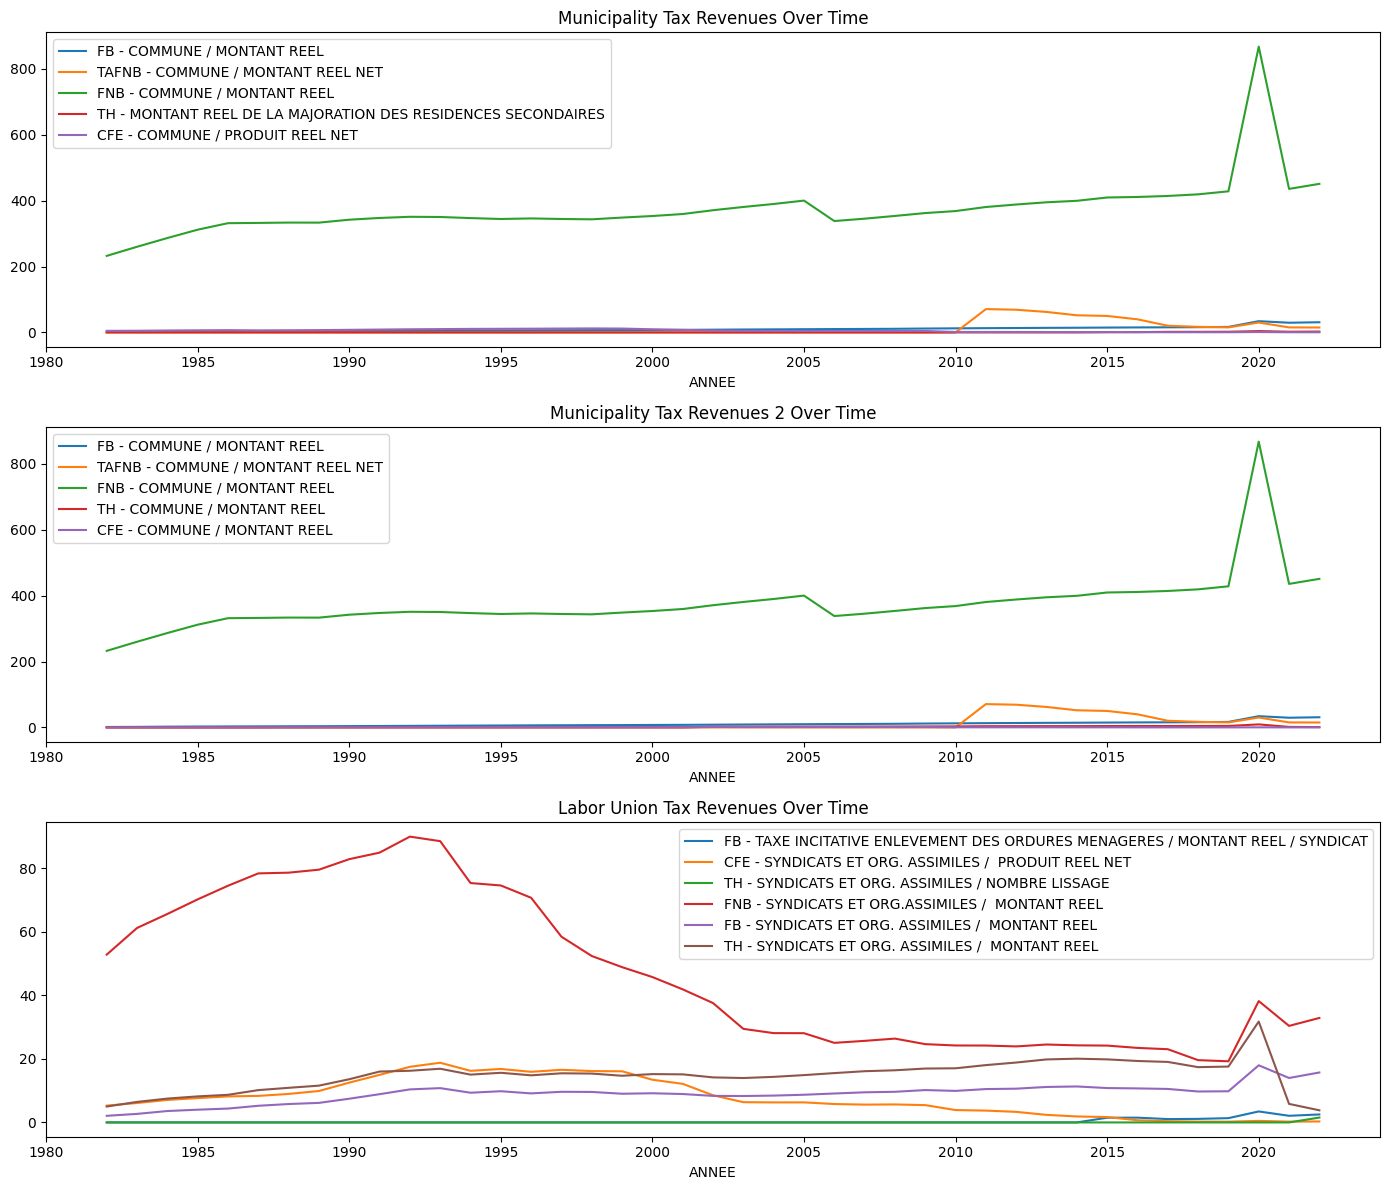

In [ ]:

municipality_revenues_over_time = df.groupby('ANNEE')[municipality_revenue_columns].sum()
municipality_revenues_over_time2 = df.groupby('ANNEE')[municipality_revenue_columns2].sum()
union_revenues_over_time = df.groupby('ANNEE')[union_revenue_columns].sum()

fig, axes = plt.subplots(3, 1, figsize=(14, 12))
municipality_revenues_over_time.plot(ax=axes[0], title='Municipality Tax Revenues Over Time')
municipality_revenues_over_time2.plot(ax=axes[1], title='Municipality Tax Revenues 2 Over Time')
union_revenues_over_time.plot(ax=axes[2], title='Labor Union Tax Revenues Over Time')
plt.tight_layout()
plt.show()

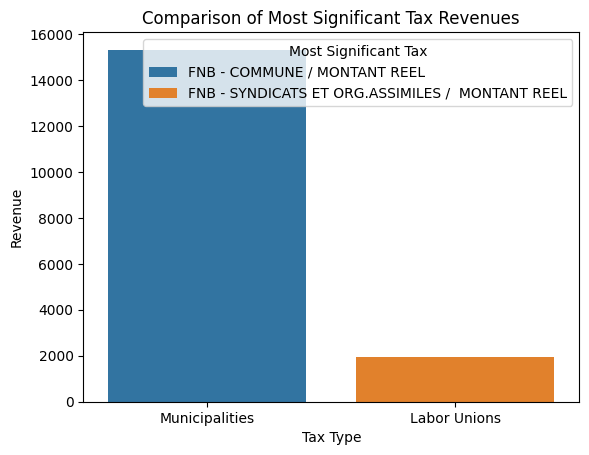

In [ ]:

# Combined Bar Plot
combined_revenue_df = pd.DataFrame({
    'Tax Type': ['Municipalities', 'Labor Unions'],
    'Most Significant Tax': [most_significant_tax_municipality, most_significant_tax_union],
    'Revenue': [most_significant_tax_municipality_revenue, most_significant_tax_union_revenue]
})

sns.barplot(data=combined_revenue_df, x='Tax Type', y='Revenue', hue='Most Significant Tax')
plt.title('Comparison of Most Significant Tax Revenues')
plt.show()

## Professional Tax Reform
Assess the impact of eliminating the "Professional Tax," which was collected prior to 2010, on municipal tax revenues. How did this change affect different municipalities?

This 2009/2010 reform refers to the removal of the "Taxe professionnelle" (TP), an important local business tax. See a short description at: https://en.wikipedia.org/wiki/Professional_tax_(France)


### commune

         Mean_Revenue_Before_2010  Mean_Revenue_After_2010  Revenue_Change
COMMUNE                                                                   
1                             0.0                 0.000000        0.000000
2                             0.0               195.017081      195.017081
3                             0.0               402.845209      402.845209
4                             0.0             26608.254702    26608.254702
5                             0.0                66.660856       66.660856
...                           ...                      ...             ...
905                           0.0                 0.000000        0.000000
906                           0.0                 0.000000        0.000000
907                           0.0                 0.000000        0.000000
908                           0.0                 0.000000        0.000000
909                           0.0                 0.000000        0.000000

[908 rows x 3 columns]


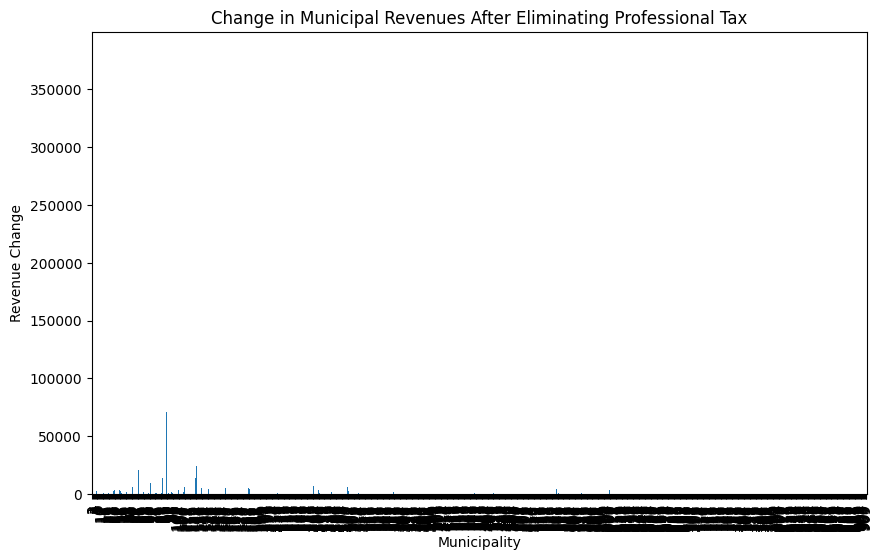

In [ ]:
import pandas as pd
import dask.dataframe as dd

# Load your Dask DataFrame
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
temp = pd.DataFrame()
# Fill NaN values with 0 for revenue columns
revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET'
]

pqdf[revenue_columns] = pqdf[revenue_columns].fillna('0')
pqdf = pqdf.replace('.', '0', regex=True)

# Convert revenue columns to float
for col in revenue_columns:
    pqdf[col] = pqdf[col].astype(float)



# Filter data for years before and after 2010
data_before_2010 = pqdf[pqdf['ANNEE'] < 2010]
data_after_2010 = pqdf[pqdf['ANNEE'] >= 2010]
# Define the relevant revenue columns (example columns, adjust based on actual dataset)

# Calculate total revenues before and after 2010
data_before_2010['Total_Revenue'] = data_before_2010[revenue_columns].sum(axis=1)
data_after_2010['Total_Revenue'] = data_after_2010[revenue_columns].sum(axis=1)
# Group by municipality and calculate mean revenue before and after 2010
mean_revenue_before_2010 = data_before_2010.groupby('COMMUNE')['Total_Revenue'].mean()
mean_revenue_after_2010 = data_after_2010.groupby('COMMUNE')['Total_Revenue'].mean()
# mean_revenue_before_2010 = mean_revenue_before_2010.reindex(mean_revenue_after_2010.index, fill_value=0)

# Merge the results for comparison
revenue_comparison = pd.DataFrame({
    'Mean_Revenue_Before_2010': mean_revenue_before_2010.compute().iloc[:-1],
    'Mean_Revenue_After_2010': mean_revenue_after_2010.compute()
})

# Calculate the change in revenue
revenue_comparison['Revenue_Change'] = revenue_comparison['Mean_Revenue_After_2010'] - revenue_comparison['Mean_Revenue_Before_2010']

print(revenue_comparison)
import matplotlib.pyplot as plt

# Plot the revenue change
revenue_comparison['Revenue_Change'].plot(kind='bar', figsize=(10, 6))
plt.title('Change in Municipal Revenues After Eliminating Professional Tax')
plt.xlabel('Municipality')
plt.ylabel('Revenue Change')
plt.show()


### based on code insee

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')

revenue_columns1 = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - COMMUNE / MONTANT REEL',
    'CFE - COMMUNE / MONTANT REEL',
]
revenue_columns2 = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
]


temp['Total_Tax_Revenue1'] = ( temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - COMMUNE / MONTANT REEL'] +
                             temp[ 'CFE - COMMUNE / MONTANT REEL'])


temp['Total_Tax_Revenue2'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             temp["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             temp['CFE - COMMUNE / PRODUIT REEL NET'])

data_before_2016 = df[df['ANNEE'] < 2010]
data_after_2016 = df[df['ANNEE'] >= 2010]

data_before_2016['Total_Revenue'] = data_before_2016[revenue_columns].sum(axis=1)
data_after_2016['Total_Revenue'] = data_after_2016[revenue_columns].sum(axis=1)
mean_revenue_before_2016 = data_before_2016.groupby('code_insee')['Total_Revenue'].mean()
mean_revenue_after_2016 = data_after_2016.groupby('code_insee')['Total_Revenue'].mean()

revenue_comparison = pd.DataFrame({
    'Mean_Revenue_Before_2016': mean_revenue_before_2016.iloc[:-1],
    'Mean_Revenue_After_2016': mean_revenue_after_2016
})
revenue_comparison = revenue_comparison.fillna(mean)




<ipython-input-67-9dd8592a0920>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')
<ipython-input-67-9dd8592a0920>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_before_2016['Total_Revenue'] = data_before_2016[revenue_columns].sum(axis=1)
<ipython-input-67-9dd8592a0920>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_after_2016['T

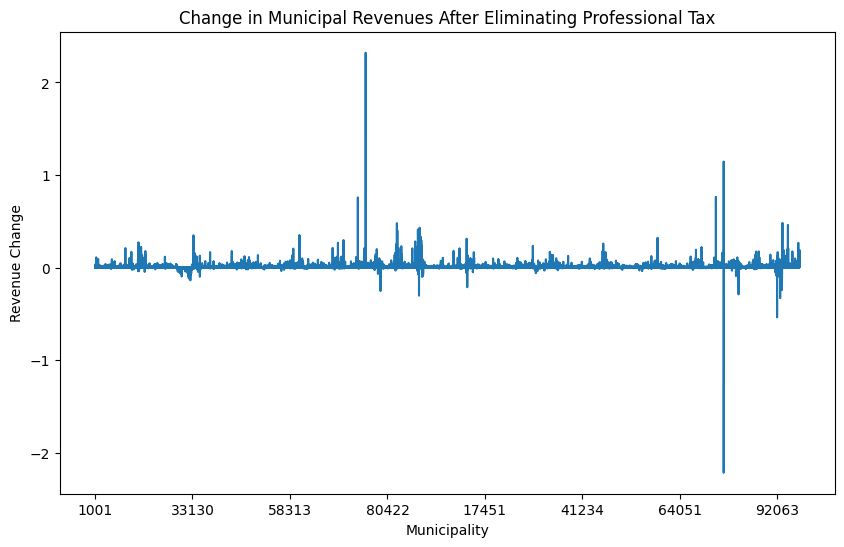

In [ ]:
revenue_comparison['Revenue_Change'] = revenue_comparison['Mean_Revenue_After_2016'] - revenue_comparison['Mean_Revenue_Before_2016']

import matplotlib.pyplot as plt

# Plot the revenue change
revenue_comparison['Revenue_Change'].plot(figsize=(10, 6))
plt.title('Change in Municipal Revenues After Eliminating Professional Tax')
plt.xlabel('Municipality')
plt.ylabel('Revenue Change')
plt.show()

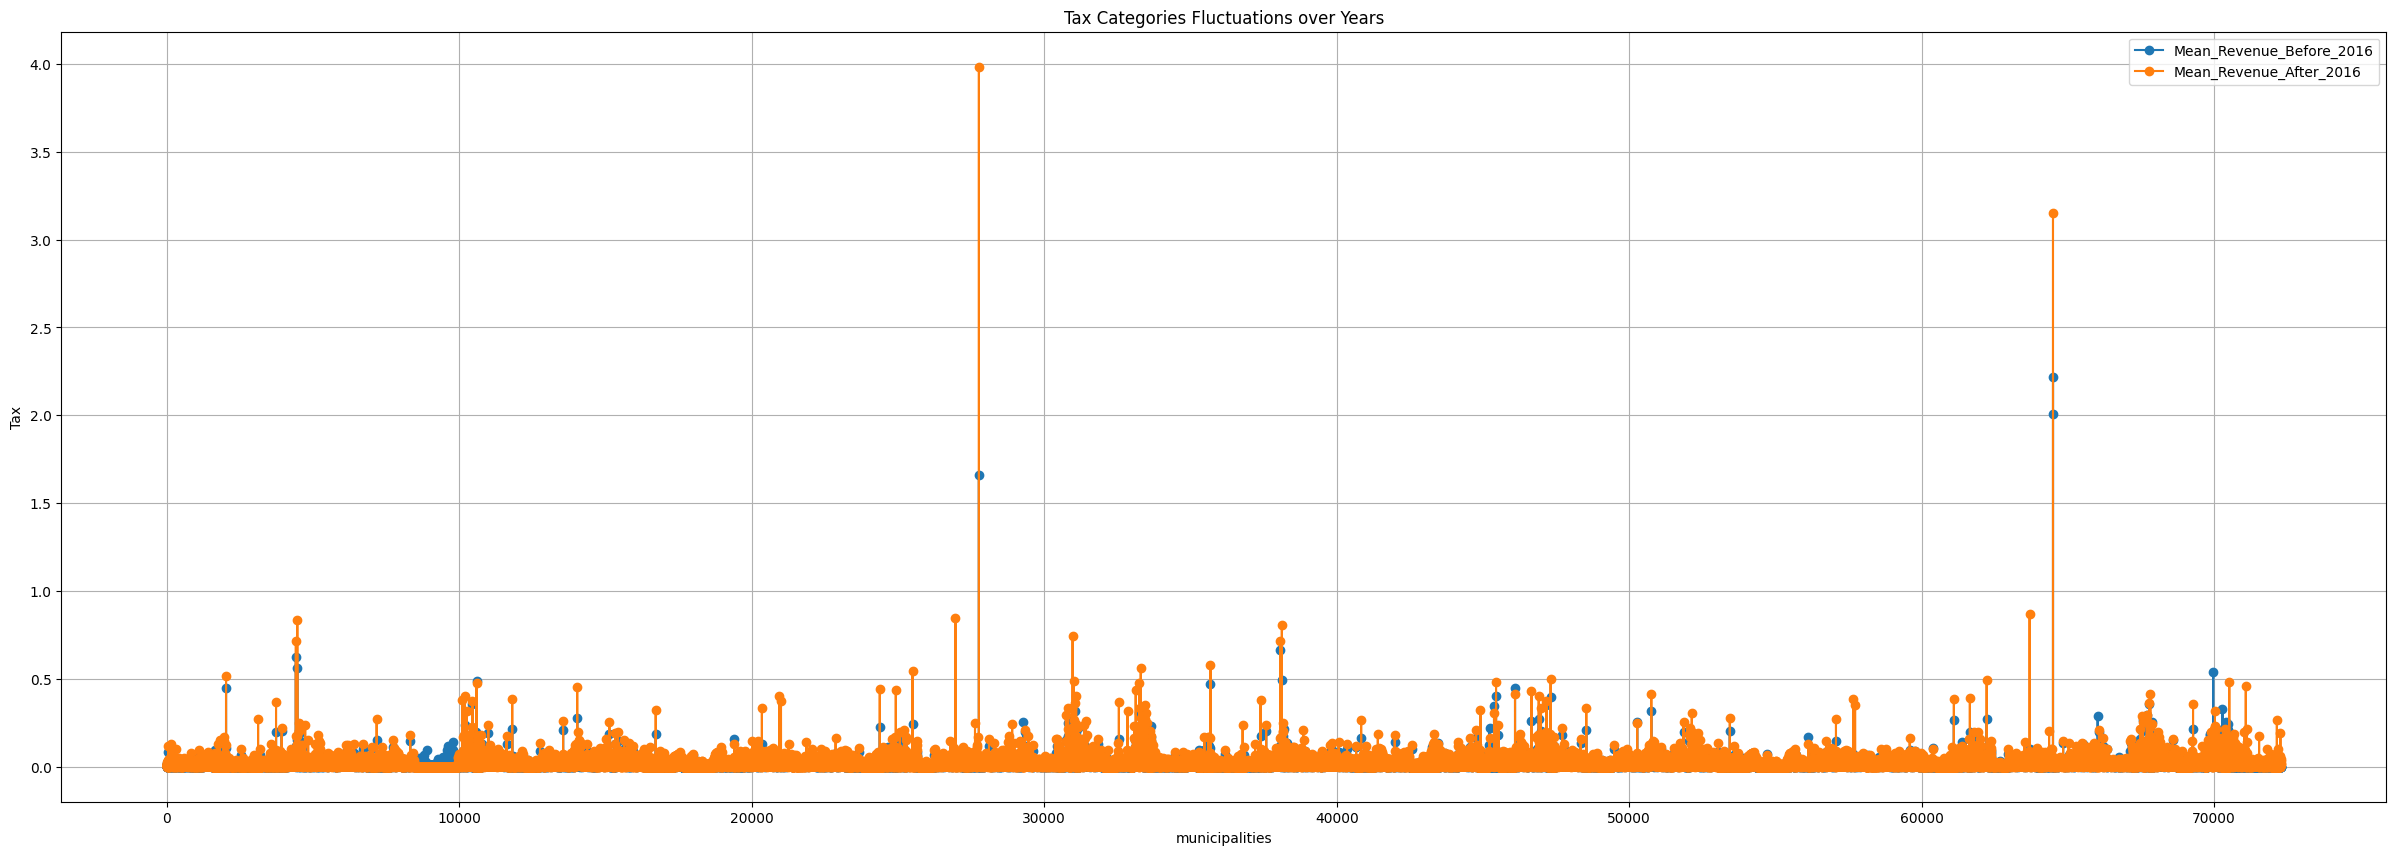

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
for col in revenue_comparison.columns:
    if(col == 'Mean_Revenue_Before_2016' or col == 'Mean_Revenue_After_2016' ):
        plt.plot(revenue_comparison['index'], revenue_comparison[col], marker='o', label=col)
plt.title('Tax Categories Fluctuations over Years')
plt.xlabel('municipalities')
plt.ylabel('Tax')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/all_required_columns_conversionrate_normalized.csv')

revenue_columns1 = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - COMMUNE / MONTANT REEL',
    'CFE - COMMUNE / MONTANT REEL'
]
revenue_columns2 = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET'
]

df['Total_Tax_Revenue1'] = (df['FB - COMMUNE / MONTANT REEL'] +
                            df['TAFNB - COMMUNE / MONTANT REEL NET'] +
                            df['FNB - COMMUNE / MONTANT REEL'] +
                            df['TH - COMMUNE / MONTANT REEL'] +
                            df['CFE - COMMUNE / MONTANT REEL'])

df['Total_Tax_Revenue2'] = (df['FB - COMMUNE / MONTANT REEL'] +
                            df['TAFNB - COMMUNE / MONTANT REEL NET'] +
                            df['FNB - COMMUNE / MONTANT REEL'] +
                            df['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                            df["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"] +
                            df['CFE - COMMUNE / PRODUIT REEL NET'])

data_before_2010 = df[df['ANNEE'] < 2010]
data_after_2010 = df[df['ANNEE'] >= 2010]

mean_revenue_before_2010 = data_before_2010.groupby('code_insee')['Total_Tax_Revenue1'].mean()
mean_revenue_after_2010 = data_after_2010.groupby('code_insee')['Total_Tax_Revenue2'].mean()

revenue_comparison = pd.DataFrame({
    'Mean_Revenue_Before_2010': mean_revenue_before_2010,
    'Mean_Revenue_After_2010': mean_revenue_after_2010
}).fillna(0)

revenue_comparison['Percentage_Change'] = ((revenue_comparison['Mean_Revenue_After_2010'] - revenue_comparison['Mean_Revenue_Before_2010']) / revenue_comparison['Mean_Revenue_Before_2010']) * 100



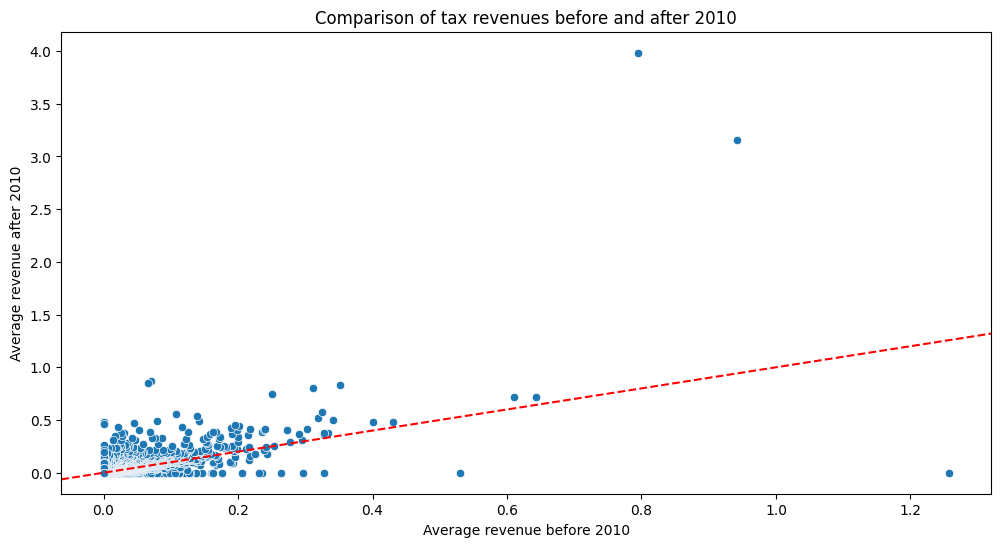

In [ ]:
# Scatter Plot of revenues before and after 2010
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Mean_Revenue_Before_2010', y='Mean_Revenue_After_2010', data=revenue_comparison)
plt.title('Comparison of tax revenues before and after 2010')
plt.xlabel('Average revenue before 2010')
plt.ylabel('Average revenue after 2010')
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.show()

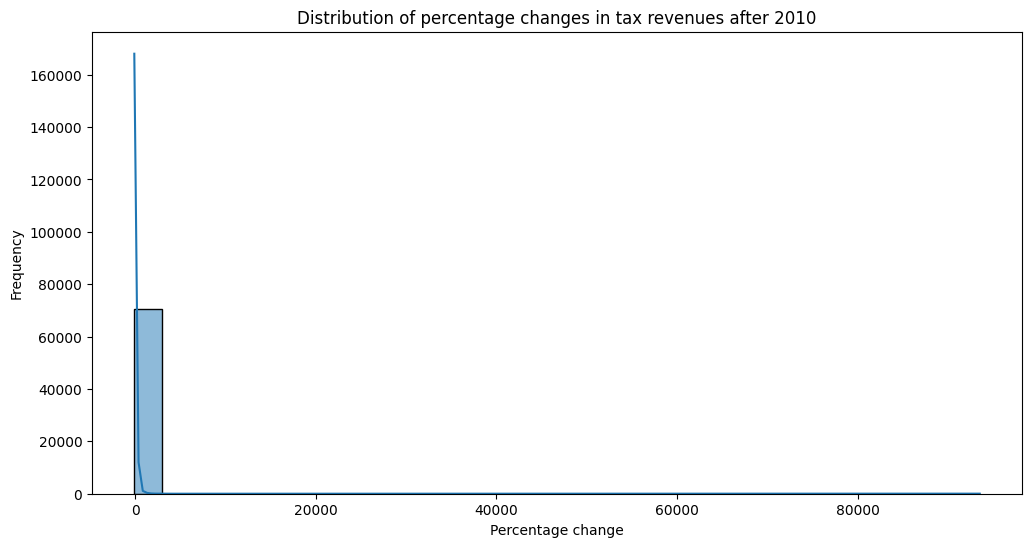

In [ ]:
# Histogram of percentage changes
plt.figure(figsize=(12, 6))
sns.histplot(revenue_comparison['Percentage_Change'], bins=30, kde=True)
plt.title('Distribution of percentage changes in tax revenues after 2010')
plt.xlabel('Percentage change')
plt.ylabel('Frequency')
plt.show()

In [ ]:
revenue_comparison = revenue_comparison.sort_values('Percentage_Change', ascending=True)
top_20_municipalities = revenue_comparison.head(10)
top_20_municipalities

Mean_Revenue_Before_2010  \
code_insee                                                   
99424-CILAOS                                      0.011868   
80342-FRAMERVILLE RAINECOURT                      0.012291   
38454-SAINT SAUVEUR                               0.006243   
38384-SAINT ETIENNE DE SAINT GEO                  0.015790   
38457-SAINT SIMEON DE BRESSIEUX                   0.019396   
80330-FORCEVILLE EN VIMEU                         0.002845   
80331-FOREST L'ABBAYE                             0.005713   
80331-FOREST-L ABBAYE                             0.005251   
38538-VERSOUD (LE)                                0.005265   
38567-SCA L ISLE D ABEAU                          0.069908   

                                  Mean_Revenue_After_2010  Percentage_Change  
code_insee                                                                    
99424-CILAOS                                          0.0             -100.0  
80342-FRAMERVILLE RAINECOURT                          0.0             -100.0  
38454-SAINT SAUVEUR                                   0.0             -100.0  
38384-SAINT ETIENNE DE SAINT GEO                      0.0             -100.0  
38457-SAINT SIMEON DE BRESSIEUX                       0.0             -100.0  
80330-FORCEVILLE EN VIMEU                             0.0             -100.0  
80331-FOREST L'ABBAYE                                 0.0             -100.0  
80331-FOREST-L ABBAYE                                 0.0             -100.0  
38538-VERSOUD (LE)                                    0.0             -100.0  
38567-SCA L ISLE D ABEAU                              0.0             -100.0

In [ ]:
revenue_comparison = revenue_comparison.sort_values('Percentage_Change', ascending=False)
top_20_municipalities = revenue_comparison.head(10)
top_20_municipalities



Mean_Revenue_Before_2010  \
code_insee                                                    
80373-RUMIGNY                                           0.0   
79280-SAINT MAURICE ETUSSON                             0.0   
40192-SAINT-MICHEL-L'OBSERVATOIRE                       0.0   
70312-SECHERAS                                          0.0   
80296-MONTCHEUTIN                                       0.0   
49011-ARTANNES SUR THOUET                               0.0   
80295-MONDIGNY                                          0.0   
70007-ALBOUSSIERE                                       0.0   
80200-GRIVY-LOISY                                       0.0   
80199-LA GRANDVILLE                                     0.0   

                                   Mean_Revenue_After_2010  Percentage_Change  
code_insee                                                                     
80373-RUMIGNY                                     0.004400                inf  
79280-SAINT MAURICE ETUSSON                       0.045843                inf  
40192-SAINT-MICHEL-L'OBSERVATOIRE                 0.018052                inf  
70312-SECHERAS                                    0.010198                inf  
80296-MONTCHEUTIN                                 0.003327                inf  
49011-ARTANNES SUR THOUET                         0.007111                inf  
80295-MONDIGNY                                    0.002458                inf  
70007-ALBOUSSIERE                                 0.009168                inf  
80200-GRIVY-LOISY                                 0.005571                inf  
80199-LA GRANDVILLE                               0.002614                inf

In [ ]:
filtered_df = revenue_comparison.query('Mean_Revenue_Before_2010 != 0 and Mean_Revenue_After_2010 != 0')

filtered_df = filtered_df.sort_values('Percentage_Change', ascending=False)
largetax_20_municipalities = filtered_df.head(10)
largetax_20_municipalities

Mean_Revenue_Before_2010  \
code_insee                                                 
04148-PEYROULES                                 0.000002   
04210-SOLEILHAS                                 0.000001   
82165-SAINT LOUP                                0.000007   
04069-DEMANDOLX                                 0.000001   
24219-LA BOUQUERIE                              0.000034   
55505-THIERVILLE-SUR-MEUSE                      0.000019   
82160-SAINT CLAIR                               0.000020   
38253-MONT DE LANS                              0.000312   
39424-LES PLANCHES EN MONTAGNE                  0.000217   
97357-GRAND-SANTI                               0.000003   

                                Mean_Revenue_After_2010  Percentage_Change  
code_insee                                                                  
04148-PEYROULES                                0.001080       62041.065861  
04210-SOLEILHAS                                0.000482       39643.329751  
82165-SAINT LOUP                               0.002483       33065.180565  
04069-DEMANDOLX                                0.000314       27037.864768  
24219-LA BOUQUERIE                             0.005815       17203.652883  
55505-THIERVILLE-SUR-MEUSE                     0.001917       10143.773748  
82160-SAINT CLAIR                              0.001306        6566.789201  
38253-MONT DE LANS                             0.011927        3720.051861  
39424-LES PLANCHES EN MONTAGNE                 0.006918        3084.220811  
97357-GRAND-SANTI                              0.000104        3076.938319

In [ ]:
filtered_df = filtered_df.sort_values('Percentage_Change', ascending=True)
largetax_20_municipalities = filtered_df.head(10)
largetax_20_municipalities

Mean_Revenue_Before_2010  \
code_insee                                               
55038-BEAULIEU EN ARGONNE                     0.007322   
55164-DOUAUMONT                               0.000553   
41034-CHAMBORD                                0.005822   
57623-SAINT-QUIRIN                            0.058685   
55482-SENONCOURT-LES-MAUJOUY                  0.000543   
67165-GRANDFONTAINE                           0.015569   
55482-SENONCOURT LES MAUJOUY                  0.000531   
95611-THEUVILLE                               0.001074   
2B153-MANSO                                   0.001755   
67122-WANGENBOURG ENGENTHAL                   0.027522   

                              Mean_Revenue_After_2010  Percentage_Change  
code_insee                                                                
55038-BEAULIEU EN ARGONNE                    0.000012         -99.836607  
55164-DOUAUMONT                              0.000001         -99.791592  
41034-CHAMBORD                               0.000014         -99.754134  
57623-SAINT-QUIRIN                           0.000191         -99.674817  
55482-SENONCOURT-LES-MAUJOUY                 0.000002         -99.565476  
67165-GRANDFONTAINE                          0.000068         -99.560809  
55482-SENONCOURT LES MAUJOUY                 0.000005         -99.127208  
95611-THEUVILLE                              0.000011         -98.985942  
2B153-MANSO                                  0.000018         -98.953850  
67122-WANGENBOURG ENGENTHAL                  0.000337         -98.775189

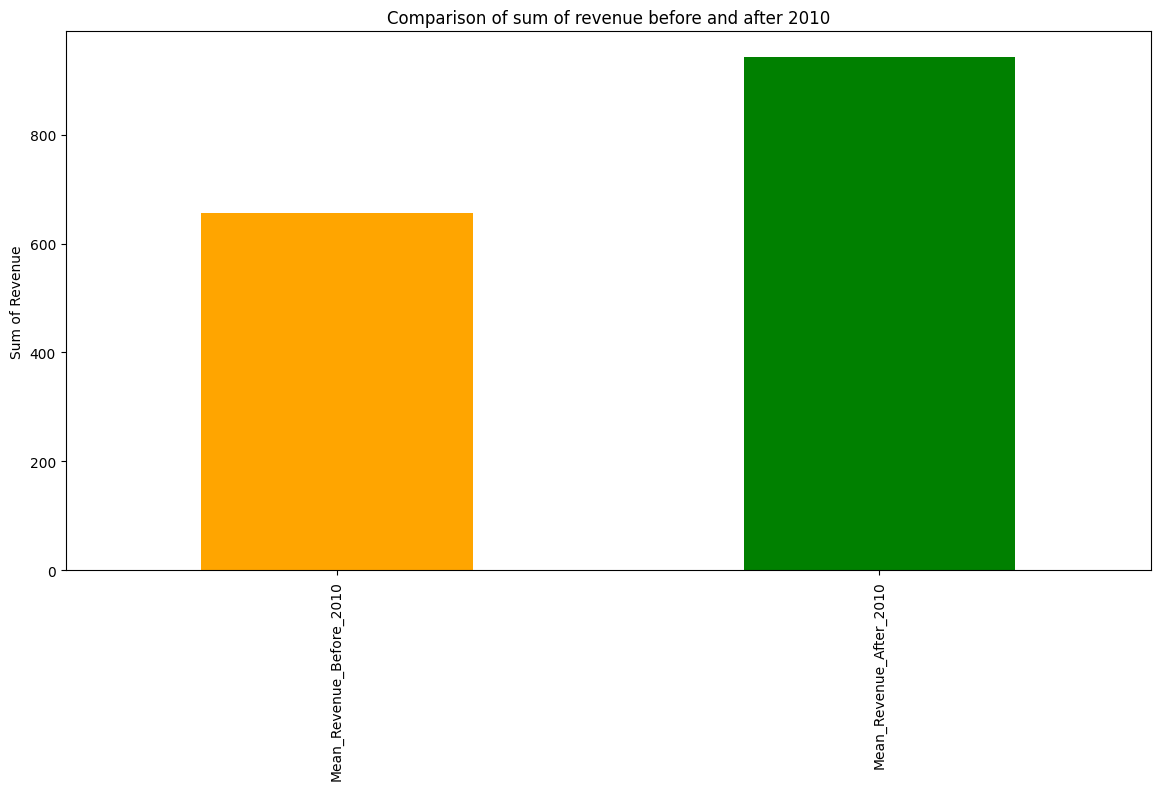

In [ ]:
plt.figure(figsize=(8, 4))
revenue_comparison[['Mean_Revenue_Before_2010', 'Mean_Revenue_After_2010']].sum(axis=0).plot(kind='bar', figsize=(14, 7),color=['orange', 'green'])
plt.title('Comparison of sum of revenue before and after 2010')
plt.ylabel('Sum of Revenue')
plt.show()

## Prediction Model
Develop and train a machine learning model capable of forecasting the yearly municipal tax revenues. Explain why you chose your specific model (linear regression, decision trees, neural networks, etc.) and discuss/compare their performance.

### statics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/datasharing-dir'
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import pandas as pd
import cudf
import dask
import dask.dataframe as dd
dask.config.set(DASK_DATAFRAME__BACKEND=cudf)
# dask.config.set({"dataframe.backend": "cudf"})
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')


### column selections


In [ ]:
TAX_CATEGORY_CODES = [
    'TFPNB',  # Taxe Foncière sur les Propriétés Non Bâties - Property Tax on Unbuilt Land
    'TFPB',   # Taxe Foncière sur les Propriétés Bâties - Property Tax on Built Land
    'TAFNB',  # Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties - Additional Tax on Property Tax for Unbuilt Land
    'TAFB',   # Taxe Additionnelle à la Taxe Foncière sur les Propriétés Bâties - Additional Tax on Property Tax for Built Land
    'FNB',    # Foncier Non Bâti - Property Tax on Undeveloped Land
    'FB',     # Foncier Bâti - Property Tax on Built Land
    'TP',     # Taxe Professionnelle - Professional Tax
    'TF',     # Taxe Foncière - Property Tax
    'TH',     # Taxe d'Habitation - Residence Tax
    'CFE',    # Cotisation Foncière des Entreprises - Business Property Tax
    'CVAE',   # Cotisation sur la Valeur Ajoutée des Entreprises - Corporate Value Added Contribution
    'TSE',    # Taxe sur les Salaires - Payroll Tax
    'TEOM',   # Taxe d'Enlèvement des Ordures Ménagères - Household Waste Collection Tax
    'IFER',   # Imposition Forfaitaire sur les Entreprises de Réseaux - Flat-Rate Tax on Network Companies
    'Tascom', # Taxe sur les Surfaces Commerciales - Tax on Commercial Surfaces
    'Gemapi', # Gestion des Milieux Aquatiques et Prévention des Inondations - Management of Aquatic Environments and Flood Prevention
    'Tasarif', # Taxe Additionnelle à la Taxe Foncière sur les Propriétés Non Bâties - Additional Tax on Property Tax for Unbuilt Land
    'BASE NETTE IMPOSEE', # Taxable or relieved net base for secondary residences
    'FONDS DE COMPENSATION IFER CENTRALES NUCLEAIRES OU THERMIQUES A FLAMME', # IFER compensation fund for nuclear or flame thermal power plants
]
tax_category_cols = {}
# pqdf = pqdf.drop(columns=['EPCI ayant instauré le dispositif de la CFE éolienne - date'])

for tax_type in TAX_CATEGORY_CODES:

  tp_columns = [column for column in pqdf.columns if ((( column.startswith(f"{tax_type} ") ) or  (f" {tax_type} " in column) )and ('CODE' not in column) and ('MONTANT' in column)) ]
  tax_category_cols.update({tax_type:tp_columns})

In [ ]:
import pandas as pd
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
df = pd.DataFrame()
df['ANNEE'] = pqdf['ANNEE']
for key, value in tax_category_cols.items():
    print(key )
    columns=pd.DataFrame()
    cols = [col for col, dtype in pqdf[tax_category_cols[key]].dtypes.items() if (dtype == 'float64' or dtype == 'int64' )]
    columns[cols] = pqdf[cols].compute()
    columns[cols] = columns[cols].fillna(int(0))
    columns[cols] = columns[cols].replace('.', int(0))
    string_cols = [col for col, dtype in pqdf[tax_category_cols[key]].dtypes.items() if ((dtype == 'string' and pqdf[col].compute().apply(lambda x: str(x).isdigit()).any()))]
    print(string_cols)
    columns[string_cols] = pqdf[string_cols].compute()
    columns[string_cols] = columns[string_cols].fillna('0')
    columns[string_cols] = columns[string_cols].replace(',', '.')
    columns[string_cols] = columns[string_cols].replace('.', '0')
    values_with_comma  = list(set([str(x) for row in columns[string_cols].to_numpy() for x in row if ',' in str(x)]))
    if len(values_with_comma):
      values_with_period = [value.replace(',', '.') for value in values_with_comma]
      print(len(values_with_comma), len(values_with_period))
      columns[string_cols] = columns[string_cols].replace(values_with_comma, values_with_period)
    columns[string_cols] = columns[string_cols].astype(float)
    columns = columns.reset_index(drop=True)
    df[cols+string_cols] = columns[cols+string_cols]

df.shape
df.to_csv('column_model.csv')


### data preperation


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# -------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
pqdf = dd.read_parquet('/content/drive/MyDrive/datasharing-dir/francetax.parquet')
df = pd.read_csv('/content/drive/MyDrive/datasharing-dir/column_model.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
pdf = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')
pdf.drop(columns=['Unnamed: 0', 'index'], inplace=True)
temp =pd.DataFrame()
# Load your Dask DataFrame

revenue_columns = [
    'FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",
    'CFE - COMMUNE / PRODUIT REEL NET',
    # 'IFER TOTALE / COMMUNE',
    # 'Part de CVAE au profit de la commune'
]


pdf[revenue_columns] = pqdf[revenue_columns].compute().reset_index(drop=True)
pdf[revenue_columns] = pdf[revenue_columns].fillna('0')
pdf[revenue_columns]  = pdf[revenue_columns].replace('.', '0')
pdf[revenue_columns]  = pdf[revenue_columns].replace(',', '0')
temp =pdf
temp = temp.reset_index(drop=True)
for col in revenue_columns:
    temp[col] = temp[col].astype(float)
temp[revenue_columns] = scaler.fit_transform(temp[revenue_columns])


temp['Total_Tax_Revenue'] = (temp['FB - COMMUNE / MONTANT REEL'] +
                             temp['TAFNB - COMMUNE / MONTANT REEL NET'] +
                             temp['FNB - COMMUNE / MONTANT REEL'] +
                             temp['TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES'] +
                             temp["TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT"]+
                             temp['CFE - COMMUNE / PRODUIT REEL NET'])

df['Total_Tax_Revenue'] = temp['Total_Tax_Revenue']



<ipython-input-3-b703bea79969>:10: DtypeWarning: Columns (2,3,4,7,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  pdf = pd.read_csv('/content/drive/MyDrive/datasharing-dir/insee_code_all_df.csv')


### Feature Selection

Correlation Analysis

In [ ]:
temp =df
df.drop(columns=['FB - COMMUNE / MONTANT REEL',
    'TAFNB - COMMUNE / MONTANT REEL NET',
    'FNB - COMMUNE / MONTANT REEL',
    'TH - MONTANT REEL DE LA MAJORATION DES RESIDENCES SECONDAIRES',
    "TH - COMMUNE / MONTANT REEL DONT THP/E AU PROFIT DE L ETAT",], inplace=True)
corr_matrix = df.corr()
cor = corr_matrix['Total_Tax_Revenue'].sort_values(ascending=False).head(50)
cor

Total_Tax_Revenue                                                                                1.000000
CFE - CHAMBRE DES METIERS / DROIT FIXE / MONTANT                                                 0.758815
FNB - CHAMBRE D'AGRICULTURE / MONTANT REEL                                                       0.739283
FB - TAXE D'ENLEVEMENT O.M. /  TAUX PLEIN - MONTANT NET LISSE                                    0.721541
TF - BASES EXONEREES ECF (ANCIENS DO) - MONTANT                                                  0.652923
TH - BASES NETTES COMMUNALES EXONEREES (ANCIENS DO TOTAUX) - MONTANT                             0.641048
TH - BASES BRUTES EXONEREES (ANCIENS DO TOTAUX) - MONTANT                                        0.639905
CFE - APPLICATION DES BASES MINIMUM / BASES APRES / MONTANT                                      0.616798
CFE - APPLICATION DES BASES MINIMUM / BASES AVANT / MONTANT                                      0.615387
CFE - BASES BRUTES REDUITES / MONTANT         

In [ ]:
cor = corr_matrix['Total_Tax_Revenue'].sort_values(ascending=False).head(50)
cor.index

Index(['Total_Tax_Revenue', 'CFE - CHAMBRE DES METIERS / DROIT FIXE / MONTANT',
       'FNB - CHAMBRE D'AGRICULTURE / MONTANT REEL',
       'FB - TAXE D'ENLEVEMENT O.M. /  TAUX PLEIN - MONTANT NET LISSE',
       'TF - BASES EXONEREES ECF (ANCIENS DO) - MONTANT',
       'TH - BASES NETTES COMMUNALES EXONEREES (ANCIENS DO TOTAUX) - MONTANT',
       'TH - BASES BRUTES EXONEREES (ANCIENS DO TOTAUX) - MONTANT',
       'CFE - APPLICATION DES BASES MINIMUM / BASES APRES / MONTANT',
       'CFE - APPLICATION DES BASES MINIMUM / BASES AVANT / MONTANT',
       'CFE - BASES BRUTES REDUITES / MONTANT',
       'CFE - BASES BRUTES TOTALES (= T10+T15+T22) / MONTANT',
       'CFE - BASES BRUTES  / REDUCTION POUR CREATION ETABLISSEMENT / MONTANT',
       'TF - DEGREVEMENT D'OFFICE  /  COTISATIONS < 12 EUROS - MONTANT',
       'TH - COTISATIONS < 12 EUROS (HORS REFORME TH)- MONTANT',
       'FB - TSE / MONTANT REEL', 'TH - TSE / MONTANT REEL',
       'FNB - TSE / MONTANT REEL',
       'TH - DEGREVEMENTS

Recursive Feature Elimination (RFE)



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create the linear regression model
model = LinearRegression()

# Apply RFE to rank the features
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(df[cor.index], df['Total_Tax_Revenue'])

# Print the ranking of the features
feature_ranks = dict(zip(cor.index, rfe.ranking_))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create the linear regression model
model = LinearRegression()
features = df.drop(columns=['Total_Tax_Revenue'])
# Apply RFE to rank the features
rfe = RFE(model, n_features_to_select=7)

rfe = rfe.fit(features, df['Total_Tax_Revenue'])

# Print the ranking of the features
feature_ranks = dict(zip(features, rfe.ranking_))
feature_ranks

{"TF - DEGREVEMENT D'OFFICE  /  COTISATIONS < 12 EUROS - MONTANT": 1,
 'TH - DEGREVEMENTS GESTIONNAIRES DE FOYERS - MONTANT': 1,
 'IFER STATIONS RADIOELECTRIQUES ART 1519 H DU CGI / COMMUNE / MONTANT': 1,
 'IFER STATIONS RADIOELECTRIQUES ART 1519 H DU CGI / EPCI A FISCALITE UNIQUE OU ZAE / MONTANT': 4,
 'FNB - GFP / MONTANT REEL': 3,
 'TH - NON-VALEURS HORS REFORME TH - MONTANT': 1,
 'CFE - LISSAGE / COMMUNE / MONTANT': 2,
 'TH - COTISATIONS < 12 EUROS (TOTAL DONT REFORME TH) - MONTANT': 1,
 'FB - TSE AUTRES / MONTANT LISSAGE': 6,
 'IFER REPARTITEURS PRINCIPAUX ART 1599 QUATER B DU CGI / REGION / MONTANT': 7,
 'TH - EXONERATION REFORME TH AVEC LISSAGE - MONTANT': 8,
 'CFE - CHAMBRE DES METIERS / DROIT FIXE / MONTANT': 1,
 "FNB - CHAMBRE D'AGRICULTURE / MONTANT REEL": 1,
 "FB - TAXE D'ENLEVEMENT O.M. /  TAUX PLEIN - MONTANT NET LISSE": 9,
 'TF - BASES EXONEREES ECF (ANCIENS DO) - MONTANT': 5,
 'TH - BASES NETTES COMMUNALES EXONEREES (ANCIENS DO TOTAUX) - MONTANT': 13,
 'TH - BASES BRUTE

In [ ]:
feature_ranks = dict(zip(features, rfe.ranking_))
top_features = []
for feature, rank in feature_ranks.items():
    if rank == 1 :
        top_features.append(feature)
top_features

["TF - DEGREVEMENT D'OFFICE  /  COTISATIONS < 12 EUROS - MONTANT",
 'TH - DEGREVEMENTS GESTIONNAIRES DE FOYERS - MONTANT',
 'IFER STATIONS RADIOELECTRIQUES ART 1519 H DU CGI / COMMUNE / MONTANT',
 'TH - NON-VALEURS HORS REFORME TH - MONTANT',
 'TH - COTISATIONS < 12 EUROS (TOTAL DONT REFORME TH) - MONTANT',
 'CFE - CHAMBRE DES METIERS / DROIT FIXE / MONTANT',
 "FNB - CHAMBRE D'AGRICULTURE / MONTANT REEL"]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Create the linear regression model
model = LinearRegression()

# Define the parameter grid
param_grid = {
    'n_features_to_select': [3, 5, 7, 10, 15, 19]
}

# Create the RFE object
rfe = RFE(model)

# Create the grid search object
grid_search = GridSearchCV(rfe, param_grid, cv=5, scoring='r2')

# Fit the grid search
grid_search.fit(X, y)

# Get the best number of features
best_n_features = grid_search.best_params_['n_features_to_select']
print(f"Best number of features: {best_n_features}")

Best number of features: 7


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Create the linear regression model
model = LinearRegression()

# Define the parameter grid
param_grid = {
    'n_features_to_select': [3, 5, 7, 10, 15, 19]
}

# Create the RFE object
rfe = RFE(model)

# Create the grid search object
grid_search = GridSearchCV(rfe, param_grid, cv=5, scoring='r2')

# Fit the grid search
grid_search.fit(X, y)

# Get the best number of features
best_n_features = grid_search.best_params_['n_features_to_select']
print(f"Best number of features: {best_n_features}")

# Get the feature ranking
feature_ranking = grid_search.best_estimator_.ranking_

# Get the feature names
feature_names = X.columns

# Print the best features
best_features = [name for rank, name in sorted(zip(feature_ranking, feature_names)) if rank == 1]
print(f"Best features: {best_features}")

Best number of features: 7
Best features: ['CFE - CHAMBRE DES METIERS / DROIT FIXE / MONTANT', "FNB - CHAMBRE D'AGRICULTURE / MONTANT REEL", 'IFER STATIONS RADIOELECTRIQUES ART 1519 H DU CGI / COMMUNE / MONTANT', "TF - DEGREVEMENT D'OFFICE  /  COTISATIONS < 12 EUROS - MONTANT", 'TH - COTISATIONS < 12 EUROS (TOTAL DONT REFORME TH) - MONTANT', 'TH - DEGREVEMENTS GESTIONNAIRES DE FOYERS - MONTANT', 'TH - NON-VALEURS HORS REFORME TH - MONTANT']


In [ ]:
selected_features = [
    'Total_Tax_Revenue',
    "TF - DEGREVEMENT D'OFFICE  /  COTISATIONS < 12 EUROS - MONTANT",
    'TH - DEGREVEMENTS GESTIONNAIRES DE FOYERS - MONTANT',
    'IFER STATIONS RADIOELECTRIQUES ART 1519 H DU CGI / COMMUNE / MONTANT',
    'IFER STATIONS RADIOELECTRIQUES ART 1519 H DU CGI / EPCI A FISCALITE UNIQUE OU ZAE / MONTANT',
    'FNB - GFP / MONTANT REEL',
    'TH - NON-VALEURS HORS REFORME TH - MONTANT',
    'CFE - LISSAGE / COMMUNE / MONTANT',
    'TH - COTISATIONS < 12 EUROS (TOTAL DONT REFORME TH) - MONTANT',
    'FB - TSE AUTRES / MONTANT LISSAGE',
    'IFER REPARTITEURS PRINCIPAUX ART 1599 QUATER B DU CGI / REGION / MONTANT',
    'TH - EXONERATION REFORME TH AVEC LISSAGE - MONTANT',
    'CFE - CHAMBRE DES METIERS / DROIT FIXE / MONTANT',
    "FNB - CHAMBRE D'AGRICULTURE / MONTANT REEL",
    "FB - TAXE D'ENLEVEMENT O.M. /  TAUX PLEIN - MONTANT NET LISSE",
    'TF - BASES EXONEREES ECF (ANCIENS DO) - MONTANT',
    'TH - BASES NETTES COMMUNALES EXONEREES (ANCIENS DO TOTAUX) - MONTANT',
    'TH - BASES BRUTES EXONEREES (ANCIENS DO TOTAUX) - MONTANT',
    'CFE - APPLICATION DES BASES MINIMUM / BASES APRES / MONTANT',
    'CFE - BASES BRUTES REDUITES / MONTANT'
]
df[selected_features].to_csv('/content/drive/MyDrive/datasharing-dir/selected_features.csv')

### model

In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/datasharing-dir/selected_features.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
# print(df.columns)

df = df[['Total_Tax_Revenue',
         'CFE - CHAMBRE DES METIERS / DROIT FIXE / MONTANT',
         "FNB - CHAMBRE D'AGRICULTURE / MONTANT REEL",
         'IFER STATIONS RADIOELECTRIQUES ART 1519 H DU CGI / COMMUNE / MONTANT',
         "TF - DEGREVEMENT D'OFFICE  /  COTISATIONS < 12 EUROS - MONTANT",
         'TH - COTISATIONS < 12 EUROS (TOTAL DONT REFORME TH) - MONTANT',
         'TH - DEGREVEMENTS GESTIONNAIRES DE FOYERS - MONTANT',
         'TH - NON-VALEURS HORS REFORME TH - MONTANT']]
# Select the relevant columns
X = df.drop(columns=['Total_Tax_Revenue'])
y = df['Total_Tax_Revenue']
df

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528922 entries, 0 to 1528921
Data columns (total 20 columns):
 #   Column                                                                                       Non-Null Count    Dtype  
---  ------                                                                                       --------------    -----  
 0   Total_Tax_Revenue                                                                            1528922 non-null  float64
 1   TF - DEGREVEMENT D'OFFICE  /  COTISATIONS < 12 EUROS - MONTANT                               1528922 non-null  float64
 2   TH - DEGREVEMENTS GESTIONNAIRES DE FOYERS - MONTANT                                          1528922 non-null  float64
 3   IFER STATIONS RADIOELECTRIQUES ART 1519 H DU CGI / COMMUNE / MONTANT                         1528922 non-null  float64
 4   IFER STATIONS RADIOELECTRIQUES ART 1519 H DU CGI / EPCI A FISCALITE UNIQUE OU ZAE / MONTANT  1528922 non-null  float64
 5   FNB - GFP / MO

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

MSE: 0.00
R-squared: 0.90


#### rf greed

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create the Random Forest model
rf = RandomForestRegressor()

# Create the RFE object
rfe = RFE(rf)

# Perform grid search
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

#### nn grid

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01و 0.1]
}

# Create the Neural Network model
nn = MLPRegressor()

# Perform grid search
grid_search = GridSearchCV(nn, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

#### XG boost grid

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'min_child_weight': [1, 3, 5]
}

# Create the XGBoost model
xgb = XGBRegressor()

# Perform grid search
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")